In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [2]:
from config import config
import pandas
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import papermill as pm
import scrapbook as sb
from stacked_data import stacked_data
from tqdm import tqdm
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics

from evaluate import calculate_confusion_matrix_stats, plot_roc_curve, plot_precision_recall, plot_confusion_matrix_ensemble

# Ensemble models

In [48]:
MODELS = [
    "82dc825c-9b8a-4e07-aa87-eca1a7ef2a59", # features
    "d8563137-6958-41e4-9d35-d9a9be745887", #"f683af1e-e68c-4180-beef-c9c040c4d63f", # t2 
    "69d65638-156f-4a73-bf6c-b6658294af4a", # t1
]

In [49]:
models = MODELS
print("models: {}".format(models))

models: ['82dc825c-9b8a-4e07-aa87-eca1a7ef2a59', 'd8563137-6958-41e4-9d35-d9a9be745887', '69d65638-156f-4a73-bf6c-b6658294af4a']


In [50]:
sd = stacked_data(uuids=models)

 50%|█████     | 351/697 [00:00<00:00, 3506.59it/s]

                outcome_pos  outcome_neg  outcome_3   age  sex  \
patientID                                                        
bone-brown-1              0            0          0  52.0    1   
bone-brown-10             0            0          0  52.0    0   
bone-brown-100            1            1          2  22.0    1   
bone-brown-101            0            0          0  88.0    0   
bone-brown-102            0            0          0  56.0    1   
...                     ...          ...        ...   ...  ...   
bone-penn-650             1            1          2  20.0    1   
bone-penn-651             0            0          0  16.0    1   
bone-penn-652             1            1          2   8.0    0   
bone-penn-653             1            1          2  16.0    1   
bone-penn-654             1            1          2   3.0    1   

                                                         location        sort  
patientID                                                    

100%|██████████| 97/97 [00:00<00:00, 3467.43it/s]

bone-penn-362
bone-penn-363
bone-penn-364
bone-penn-367
bone-penn-368
bone-penn-369
bone-penn-370
bone-penn-372
bone-penn-374
bone-penn-375
bone-penn-379
bone-penn-380
bone-penn-382
bone-penn-384
bone-penn-385
bone-penn-386
bone-penn-387
bone-penn-388
bone-penn-389
bone-penn-391
bone-penn-392
bone-penn-396
bone-penn-397
bone-penn-405
bone-penn-413
bone-penn-425
bone-penn-429
bone-penn-446
bone-penn-453
bone-penn-454
bone-penn-457
bone-penn-458
bone-penn-459
bone-penn-460
bone-penn-461
bone-penn-463
bone-penn-465
bone-penn-467
bone-penn-471
bone-penn-473
bone-penn-476
bone-penn-478
bone-penn-480
bone-penn-482
bone-penn-484
bone-penn-487
bone-penn-489
bone-penn-490
bone-penn-494
bone-penn-495
bone-penn-496
bone-penn-497
bone-penn-503
bone-penn-505
bone-penn-506
bone-penn-509
bone-penn-512
bone-penn-514
bone-penn-515
bone-penn-516
bone-penn-517
bone-penn-518
bone-penn-519
bone-penn-521
bone-penn-522
bone-penn-524
bone-penn-527
bone-penn-528
bone-penn-529
bone-penn-530
bone-penn-535
bone-p


 50%|████▉     | 348/697 [00:00<00:00, 3476.87it/s]

Training points = 697
Benign: 377, Malignant: 320

Validation points = 196
Benign: 108, Malignant: 88

Testing points = 93
Benign: 51, Malignant: 42
External points = 97
Benign: 58, Malignant: 39
bone-brown-1
bone-brown-100
bone-brown-101
bone-brown-103
bone-brown-106
bone-brown-107
bone-brown-11
bone-brown-110
bone-brown-112
bone-brown-113
bone-brown-114
bone-brown-115
bone-brown-116
bone-brown-117
bone-brown-120
bone-brown-121
bone-brown-123
bone-brown-124
bone-brown-125
bone-brown-13
bone-brown-14
bone-brown-15
bone-brown-17
bone-brown-19
bone-brown-2
bone-brown-20
bone-brown-21
bone-brown-22
bone-brown-23
bone-brown-24
bone-brown-25
bone-brown-27
bone-brown-29
bone-brown-3
bone-brown-31
bone-brown-32
bone-brown-34
bone-brown-35
bone-brown-37
bone-brown-38
bone-brown-39
bone-brown-41
bone-brown-42
bone-brown-44
bone-brown-46
bone-brown-50
bone-brown-51
bone-brown-52
bone-brown-53
bone-brown-54
bone-brown-56
bone-brown-58
bone-brown-59
bone-brown-6
bone-brown-63
bone-brown-64
bone-br

  0%|          | 0/697 [00:00<?, ?it/s]

bone-penn-597
bone-penn-598
bone-penn-599
bone-penn-600
bone-penn-601
bone-penn-602
bone-penn-603
bone-penn-605
bone-penn-606
bone-penn-609
bone-penn-610
bone-penn-611
bone-penn-613
bone-penn-614
bone-penn-615
bone-penn-616
bone-penn-617
bone-penn-619
bone-penn-620
bone-penn-621
bone-penn-622
bone-penn-623
bone-penn-624
bone-penn-625
bone-penn-626
bone-penn-627
bone-penn-629
bone-penn-630
bone-penn-631
bone-penn-632
bone-penn-633
bone-penn-634
bone-penn-635
bone-penn-635
bone-penn-636
bone-penn-637
bone-penn-639
bone-penn-640
bone-penn-641
bone-penn-643
bone-penn-648
bone-penn-650
bone-penn-651
bone-penn-652
bone-penn-653
bone-penn-654
bone-brown-10
bone-brown-102
bone-brown-105
bone-brown-108
bone-brown-109
bone-brown-111
bone-brown-12
bone-brown-122
bone-brown-28
bone-brown-33
bone-brown-36
bone-brown-4
bone-brown-40
bone-brown-47
bone-brown-48
bone-brown-49
bone-brown-5
bone-brown-57
bone-brown-61
bone-brown-66
bone-brown-67
bone-brown-69
bone-brown-7
bone-brown-71
bone-brown-79
bon

bone-brown-100
I'm doing the thing.


  0%|          | 2/697 [00:00<01:45,  6.58it/s]

bone-brown-101
I'm doing the thing.


  0%|          | 3/697 [00:00<02:13,  5.18it/s]

bone-brown-103
I'm doing the thing.


  1%|          | 4/697 [00:00<02:31,  4.58it/s]

bone-brown-106
I'm doing the thing.


  1%|          | 6/697 [00:02<05:10,  2.22it/s]

bone-brown-107
I'm doing the thing.
bone-brown-11
I'm doing the thing.


  1%|          | 7/697 [00:02<04:16,  2.69it/s]

bone-brown-110
I'm doing the thing.
bone-brown-112
I'm doing the thing.


  1%|▏         | 9/697 [00:02<03:02,  3.77it/s]

bone-brown-113
I'm doing the thing.


  1%|▏         | 10/697 [00:03<03:00,  3.80it/s]

bone-brown-114
I'm doing the thing.


  2%|▏         | 11/697 [00:03<02:54,  3.92it/s]

bone-brown-115
I'm doing the thing.


  2%|▏         | 12/697 [00:03<03:05,  3.69it/s]

bone-brown-116
I'm doing the thing.


  2%|▏         | 13/697 [00:03<03:00,  3.79it/s]

bone-brown-117
I'm doing the thing.


  2%|▏         | 15/697 [00:04<03:12,  3.55it/s]

bone-brown-120
I'm doing the thing.
bone-brown-121
I'm doing the thing.


  2%|▏         | 17/697 [00:04<02:13,  5.08it/s]

bone-brown-123
I'm doing the thing.
bone-brown-124
I'm doing the thing.


  3%|▎         | 18/697 [00:05<02:41,  4.19it/s]

bone-brown-125
I'm doing the thing.


  3%|▎         | 20/697 [00:05<02:27,  4.60it/s]

bone-brown-13
I'm doing the thing.
bone-brown-14
I'm doing the thing.
bone-brown-15
I'm doing the thing.


  3%|▎         | 22/697 [00:05<02:07,  5.27it/s]

bone-brown-17
I'm doing the thing.


  3%|▎         | 23/697 [00:06<02:32,  4.41it/s]

bone-brown-19
I'm doing the thing.


  3%|▎         | 24/697 [00:06<02:37,  4.27it/s]

bone-brown-2
I'm doing the thing.


  4%|▎         | 25/697 [00:06<02:41,  4.16it/s]

bone-brown-20
I'm doing the thing.


  4%|▎         | 26/697 [00:06<02:52,  3.88it/s]

bone-brown-21
I'm doing the thing.


  4%|▍         | 27/697 [00:07<03:21,  3.33it/s]

bone-brown-22
I'm doing the thing.
bone-brown-23
I'm doing the thing.


  4%|▍         | 29/697 [00:07<02:34,  4.33it/s]

bone-brown-24
I'm doing the thing.
bone-brown-25
I'm doing the thing.


  5%|▍         | 33/697 [00:08<01:53,  5.85it/s]

bone-brown-27
I'm doing the thing.
bone-brown-29
I'm doing the thing.
bone-brown-3
I'm doing the thing.


  5%|▌         | 35/697 [00:08<02:07,  5.21it/s]

bone-brown-31
I'm doing the thing.
bone-brown-32
I'm doing the thing.


  5%|▌         | 36/697 [00:08<02:07,  5.18it/s]

bone-brown-34
I'm doing the thing.


  5%|▌         | 37/697 [00:09<02:34,  4.27it/s]

bone-brown-35
I'm doing the thing.


  5%|▌         | 38/697 [00:09<02:42,  4.06it/s]

bone-brown-37
I'm doing the thing.


  6%|▌         | 40/697 [00:09<02:22,  4.61it/s]

bone-brown-38
I'm doing the thing.
bone-brown-39
I'm doing the thing.


  6%|▌         | 41/697 [00:10<02:31,  4.33it/s]

bone-brown-41
I'm doing the thing.


  6%|▌         | 42/697 [00:10<02:52,  3.79it/s]

bone-brown-42
I'm doing the thing.


  6%|▌         | 43/697 [00:11<04:58,  2.19it/s]

bone-brown-44
I'm doing the thing.


  6%|▋         | 44/697 [00:12<06:06,  1.78it/s]

bone-brown-46
I'm doing the thing.
bone-brown-50
I'm doing the thing.


  7%|▋         | 46/697 [00:12<04:33,  2.38it/s]

bone-brown-51
I'm doing the thing.


  7%|▋         | 47/697 [00:13<04:11,  2.59it/s]

bone-brown-52
I'm doing the thing.


  7%|▋         | 48/697 [00:13<03:43,  2.91it/s]

bone-brown-53
I'm doing the thing.
bone-brown-54
I'm doing the thing.


  7%|▋         | 50/697 [00:13<02:56,  3.66it/s]

bone-brown-56
I'm doing the thing.


  7%|▋         | 52/697 [00:14<02:30,  4.28it/s]

bone-brown-58
I'm doing the thing.
bone-brown-59
I'm doing the thing.


  8%|▊         | 53/697 [00:14<03:16,  3.28it/s]

bone-brown-6
I'm doing the thing.


  8%|▊         | 54/697 [00:15<04:57,  2.16it/s]

bone-brown-63
I'm doing the thing.


  8%|▊         | 56/697 [00:15<03:43,  2.87it/s]

bone-brown-64
I'm doing the thing.
bone-brown-65
I'm doing the thing.


  8%|▊         | 59/697 [00:16<02:19,  4.59it/s]

bone-brown-68
I'm doing the thing.
bone-brown-70
I'm doing the thing.
bone-brown-72
I'm doing the thing.


  9%|▊         | 60/697 [00:16<02:30,  4.23it/s]

bone-brown-73
I'm doing the thing.


  9%|▉         | 62/697 [00:17<02:13,  4.76it/s]

bone-brown-74
I'm doing the thing.
bone-brown-75
I'm doing the thing.


  9%|▉         | 64/697 [00:17<02:11,  4.81it/s]

bone-brown-76
I'm doing the thing.
bone-brown-77
I'm doing the thing.


  9%|▉         | 66/697 [00:17<02:05,  5.02it/s]

bone-brown-78
I'm doing the thing.
bone-brown-8
I'm doing the thing.


 10%|▉         | 67/697 [00:18<02:11,  4.80it/s]

bone-brown-81
I'm doing the thing.
bone-brown-83
I'm doing the thing.


 10%|▉         | 69/697 [00:18<01:58,  5.29it/s]

bone-brown-84
I'm doing the thing.


 10%|█         | 70/697 [00:20<05:36,  1.87it/s]

bone-brown-85
I'm doing the thing.


 10%|█         | 71/697 [00:20<05:18,  1.97it/s]

bone-brown-86
I'm doing the thing.


 10%|█         | 72/697 [00:20<04:32,  2.29it/s]

bone-brown-88
I'm doing the thing.


 11%|█         | 74/697 [00:21<03:19,  3.12it/s]

bone-brown-89
I'm doing the thing.
bone-brown-91
I'm doing the thing.


 11%|█         | 75/697 [00:21<02:44,  3.78it/s]

bone-brown-92
I'm doing the thing.


 11%|█         | 77/697 [00:21<02:39,  3.88it/s]

bone-brown-94
I'm doing the thing.
bone-brown-95
I'm doing the thing.


 11%|█         | 78/697 [00:21<02:36,  3.96it/s]

bone-brown-96
I'm doing the thing.
bone-brown-97
I'm doing the thing.


 11%|█▏        | 80/697 [00:22<01:59,  5.18it/s]

bone-brown-99
I'm doing the thing.


 12%|█▏        | 82/697 [00:22<02:19,  4.41it/s]

bone-china-002
I'm doing the thing.
bone-china-004
I'm doing the thing.
bone-china-005
I'm doing the thing.


 12%|█▏        | 86/697 [00:23<01:19,  7.73it/s]

bone-china-006
I'm doing the thing.
bone-china-008
I'm doing the thing.
bone-china-008
I'm doing the thing.


 13%|█▎        | 88/697 [00:23<01:12,  8.45it/s]

bone-china-009
I'm doing the thing.
bone-china-010
I'm doing the thing.
bone-china-014
I'm doing the thing.


 13%|█▎        | 92/697 [00:23<00:59, 10.25it/s]

bone-china-015
I'm doing the thing.
bone-china-019
I'm doing the thing.
bone-china-020
I'm doing the thing.


 14%|█▎        | 95/697 [00:23<00:47, 12.61it/s]

bone-china-021
I'm doing the thing.
bone-china-022
I'm doing the thing.
bone-china-023
I'm doing the thing.
bone-china-023
I'm doing the thing.


 14%|█▍        | 99/697 [00:24<00:45, 13.08it/s]

bone-china-027
I'm doing the thing.
bone-china-028
I'm doing the thing.
bone-china-029
I'm doing the thing.
bone-china-031
I'm doing the thing.


 15%|█▍        | 103/697 [00:24<00:43, 13.52it/s]

bone-china-033
I'm doing the thing.
bone-china-035
I'm doing the thing.
bone-china-037
I'm doing the thing.


 15%|█▌        | 105/697 [00:24<00:46, 12.69it/s]

bone-china-038
I'm doing the thing.
bone-china-039
I'm doing the thing.
bone-china-041
I'm doing the thing.


 16%|█▌        | 109/697 [00:24<00:48, 12.22it/s]

bone-china-044
I'm doing the thing.
bone-china-045
I'm doing the thing.
bone-china-046
I'm doing the thing.


 16%|█▌        | 113/697 [00:25<00:45, 12.83it/s]

bone-china-047
I'm doing the thing.
bone-china-050
I'm doing the thing.
bone-china-051
I'm doing the thing.
bone-china-052
I'm doing the thing.


 17%|█▋        | 116/697 [00:25<00:38, 14.92it/s]

bone-china-053
I'm doing the thing.
bone-china-055
I'm doing the thing.
bone-china-056
I'm doing the thing.
bone-china-058
I'm doing the thing.


 17%|█▋        | 120/697 [00:25<00:48, 11.78it/s]

bone-china-059
I'm doing the thing.
bone-china-060
I'm doing the thing.
bone-china-061
I'm doing the thing.
bone-china-062
I'm doing the thing.


 18%|█▊        | 124/697 [00:26<00:47, 12.16it/s]

bone-china-065
I'm doing the thing.
bone-china-066
I'm doing the thing.
bone-china-067
I'm doing the thing.


 18%|█▊        | 126/697 [00:26<00:45, 12.51it/s]

bone-china-068
I'm doing the thing.
bone-china-069
I'm doing the thing.
bone-china-070
I'm doing the thing.


 19%|█▊        | 130/697 [00:26<00:42, 13.46it/s]

bone-china-071
I'm doing the thing.
bone-china-072
I'm doing the thing.
bone-china-074
I'm doing the thing.


 19%|█▉        | 132/697 [00:26<00:44, 12.58it/s]

bone-china-075
I'm doing the thing.
bone-china-076
I'm doing the thing.


 19%|█▉        | 134/697 [00:27<00:57,  9.85it/s]

bone-china-079
I'm doing the thing.
bone-china-080
I'm doing the thing.
bone-china-081
I'm doing the thing.


 20%|█▉        | 136/697 [00:27<00:54, 10.22it/s]

bone-china-083
I'm doing the thing.
bone-china-084
I'm doing the thing.


 20%|██        | 140/697 [00:27<00:55, 10.05it/s]

bone-china-085
I'm doing the thing.
bone-china-086
I'm doing the thing.
bone-china-087
I'm doing the thing.


 20%|██        | 142/697 [00:27<00:58,  9.44it/s]

bone-china-088
I'm doing the thing.
bone-china-089
I'm doing the thing.


 21%|██        | 144/697 [00:28<00:52, 10.60it/s]

bone-china-090
I'm doing the thing.
bone-china-092
I'm doing the thing.
bone-china-093
I'm doing the thing.


 21%|██        | 148/697 [00:28<00:45, 11.98it/s]

bone-china-099
I'm doing the thing.
bone-china-100
I'm doing the thing.
bone-china-101
I'm doing the thing.


 22%|██▏       | 150/697 [00:28<00:44, 12.42it/s]

bone-china-103
I'm doing the thing.
bone-china-104
I'm doing the thing.


 22%|██▏       | 152/697 [00:28<00:50, 10.69it/s]

bone-china-105
I'm doing the thing.
bone-china-107
I'm doing the thing.


 22%|██▏       | 154/697 [00:28<00:47, 11.48it/s]

bone-china-109
I'm doing the thing.
bone-china-110
I'm doing the thing.
bone-china-113
I'm doing the thing.


 23%|██▎       | 158/697 [00:29<00:46, 11.68it/s]

bone-china-114
I'm doing the thing.
bone-china-117
I'm doing the thing.
bone-china-118
I'm doing the thing.


 23%|██▎       | 160/697 [00:29<00:50, 10.60it/s]

bone-china-121
I'm doing the thing.
bone-china-122
I'm doing the thing.


 23%|██▎       | 162/697 [00:29<00:52, 10.17it/s]

bone-china-123
I'm doing the thing.
bone-china-124
I'm doing the thing.


 24%|██▎       | 164/697 [00:29<00:49, 10.67it/s]

bone-china-125
I'm doing the thing.
bone-china-126
I'm doing the thing.
bone-china-127
I'm doing the thing.


 24%|██▍       | 168/697 [00:30<00:50, 10.50it/s]

bone-china-131
I'm doing the thing.
bone-china-132
I'm doing the thing.
bone-china-133
I'm doing the thing.


 24%|██▍       | 170/697 [00:30<00:53,  9.85it/s]

bone-china-134
I'm doing the thing.
bone-china-135
I'm doing the thing.


 25%|██▍       | 172/697 [00:30<00:46, 11.26it/s]

bone-china-136
I'm doing the thing.
bone-china-138
I'm doing the thing.
bone-china-140
I'm doing the thing.


 25%|██▍       | 174/697 [00:30<00:49, 10.59it/s]

bone-china-143
I'm doing the thing.
bone-china-145
I'm doing the thing.


 25%|██▌       | 176/697 [00:31<00:54,  9.48it/s]

bone-china-146
I'm doing the thing.
bone-china-148
I'm doing the thing.


 26%|██▌       | 179/697 [00:31<00:55,  9.25it/s]

bone-china-149
I'm doing the thing.
bone-china-152
I'm doing the thing.
bone-china-153
I'm doing the thing.


 26%|██▋       | 183/697 [00:31<00:44, 11.60it/s]

bone-china-154
I'm doing the thing.
bone-china-158
I'm doing the thing.
bone-china-159
I'm doing the thing.


 27%|██▋       | 185/697 [00:31<00:48, 10.61it/s]

bone-china-160
I'm doing the thing.
bone-china-161
I'm doing the thing.
bone-china-164
I'm doing the thing.


 27%|██▋       | 189/697 [00:32<00:41, 12.38it/s]

bone-china-166
I'm doing the thing.
bone-china-167
I'm doing the thing.
bone-china-169
I'm doing the thing.


 27%|██▋       | 191/697 [00:32<00:40, 12.40it/s]

bone-china-170
I'm doing the thing.
bone-china-174
I'm doing the thing.


 28%|██▊       | 193/697 [00:32<00:46, 10.91it/s]

bone-china-175
I'm doing the thing.
bone-china-176
I'm doing the thing.


 28%|██▊       | 195/697 [00:32<00:46, 10.88it/s]

bone-china-177
I'm doing the thing.
bone-china-180
I'm doing the thing.
bone-china-184
I'm doing the thing.


 29%|██▊       | 199/697 [00:33<00:39, 12.64it/s]

bone-china-186
I'm doing the thing.
bone-china-187
I'm doing the thing.
bone-china-189
I'm doing the thing.
bone-china-190
I'm doing the thing.


 29%|██▉       | 203/697 [00:33<00:36, 13.39it/s]

bone-china-192
I'm doing the thing.
bone-china-193
I'm doing the thing.
bone-china-194
I'm doing the thing.


 29%|██▉       | 205/697 [00:33<00:40, 12.27it/s]

bone-china-196
I'm doing the thing.
bone-china-198
I'm doing the thing.
bone-china-199
I'm doing the thing.


 30%|██▉       | 209/697 [00:33<00:40, 12.11it/s]

bone-china-203
I'm doing the thing.
bone-china-209
I'm doing the thing.
bone-china-212
I'm doing the thing.


 30%|███       | 211/697 [00:33<00:39, 12.37it/s]

bone-china-213
I'm doing the thing.
bone-china-215
I'm doing the thing.
bone-china-216
I'm doing the thing.


 31%|███       | 215/697 [00:34<00:39, 12.32it/s]

bone-china-217
I'm doing the thing.
bone-china-221
I'm doing the thing.
bone-china-222
I'm doing the thing.


 31%|███       | 217/697 [00:34<00:40, 11.79it/s]

bone-china-223
I'm doing the thing.
bone-china-225
I'm doing the thing.


 31%|███▏      | 219/697 [00:34<00:45, 10.52it/s]

bone-china-228
I'm doing the thing.
bone-china-231
I'm doing the thing.
bone-china-234
I'm doing the thing.


 32%|███▏      | 221/697 [00:34<00:48,  9.81it/s]

bone-china-242
I'm doing the thing.
bone-china-243
I'm doing the thing.


 32%|███▏      | 223/697 [00:35<00:58,  8.15it/s]

bone-hup-101
I'm doing the thing.


 32%|███▏      | 225/697 [00:35<01:06,  7.14it/s]

bone-hup-102
I'm doing the thing.
bone-hup-103
I'm doing the thing.
bone-hup-104
I'm doing the thing.


 33%|███▎      | 227/697 [00:35<00:59,  7.93it/s]

bone-hup-108
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 33%|███▎      | 229/697 [00:36<01:08,  6.83it/s]

bone-hup-111
I'm doing the thing.


 33%|███▎      | 230/697 [00:36<01:23,  5.62it/s]

bone-hup-112
I'm doing the thing.


 33%|███▎      | 231/697 [00:36<01:27,  5.34it/s]

bone-hup-114
I'm doing the thing.


 33%|███▎      | 232/697 [00:37<01:43,  4.50it/s]

bone-hup-116
I'm doing the thing.


 33%|███▎      | 233/697 [00:37<01:53,  4.10it/s]

bone-hup-118
I'm doing the thing.


 34%|███▎      | 235/697 [00:37<01:38,  4.70it/s]

bone-hup-119
I'm doing the thing.
bone-hup-120
I'm doing the thing.


 34%|███▍      | 236/697 [00:37<01:30,  5.12it/s]

bone-hup-122
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 34%|███▍      | 238/697 [00:38<01:21,  5.65it/s]

bone-hup-124
I'm doing the thing.
bone-hup-126
I'm doing the thing.


 34%|███▍      | 240/697 [00:38<01:20,  5.70it/s]

bone-hup-128
I'm doing the thing.


 35%|███▍      | 243/697 [00:39<01:17,  5.89it/s]

bone-hup-130
I'm doing the thing.
bone-hup-131
I'm doing the thing.
bone-hup-132
I'm doing the thing.


 35%|███▌      | 244/697 [00:39<01:18,  5.80it/s]

bone-hup-133
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 35%|███▌      | 247/697 [00:39<01:13,  6.13it/s]

bone-hup-136
I'm doing the thing.
bone-hup-137
I'm doing the thing.
bone-hup-138
I'm doing the thing.


 36%|███▌      | 250/697 [00:40<01:07,  6.62it/s]

bone-hup-139
I'm doing the thing.
bone-hup-141
I'm doing the thing.


 36%|███▋      | 253/697 [00:40<01:03,  7.01it/s]

bone-hup-142
I'm doing the thing.
bone-hup-143
I'm doing the thing.
bone-hup-146
I'm doing the thing.
bone-hup-148
I'm doing the thing.


 37%|███▋      | 256/697 [00:41<01:06,  6.66it/s]

bone-hup-150
I'm doing the thing.
bone-hup-151
I'm doing the thing.


 37%|███▋      | 258/697 [00:41<01:04,  6.83it/s]

bone-hup-152
I'm doing the thing.
bone-hup-154
I'm doing the thing.


 37%|███▋      | 260/697 [00:41<01:01,  7.07it/s]

bone-hup-155
I'm doing the thing.
bone-hup-156
I'm doing the thing.


 37%|███▋      | 261/697 [00:42<01:23,  5.22it/s]

bone-hup-158
I'm doing the thing.


 38%|███▊      | 262/697 [00:42<01:30,  4.81it/s]

bone-hup-160
I'm doing the thing.


 38%|███▊      | 265/697 [00:42<01:21,  5.28it/s]

bone-hup-161
I'm doing the thing.
bone-hup-168
I'm doing the thing.
bone-hup-169
I'm doing the thing.


 38%|███▊      | 266/697 [00:43<01:33,  4.61it/s]

bone-hup-173
I'm doing the thing.


 39%|███▊      | 269/697 [00:43<01:24,  5.08it/s]

bone-hup-177
I'm doing the thing.
bone-hup-179
I'm doing the thing.
bone-hup-180
I'm doing the thing.


 39%|███▊      | 270/697 [00:44<01:19,  5.37it/s]

bone-hup-188
I'm doing the thing.


 39%|███▉      | 271/697 [00:44<01:31,  4.66it/s]

bone-hup-193
I'm doing the thing.
bone-hup-201
I'm doing the thing.


 39%|███▉      | 275/697 [00:44<00:56,  7.47it/s]

bone-hup-203
I'm doing the thing.
bone-hup-207
I'm doing the thing.
bone-hup-211
I'm doing the thing.


 40%|███▉      | 276/697 [00:45<01:11,  5.86it/s]

bone-hup-213
I'm doing the thing.
bone-hup-214
I'm doing the thing.


 40%|████      | 280/697 [00:45<00:49,  8.43it/s]

bone-hup-219
I'm doing the thing.
bone-hup-225
I'm doing the thing.
bone-hup-228
I'm doing the thing.
bone-hup-229
I'm doing the thing.


 40%|████      | 282/697 [00:45<00:41, 10.10it/s]

bone-hup-23
I'm doing the thing.


 41%|████      | 284/697 [00:46<01:05,  6.32it/s]

bone-hup-231
I'm doing the thing.
bone-hup-232
I'm doing the thing.


 41%|████      | 286/697 [00:46<01:11,  5.79it/s]

bone-hup-234
I'm doing the thing.
bone-hup-237
I'm doing the thing.


 41%|████▏     | 288/697 [00:46<01:04,  6.31it/s]

bone-hup-244
I'm doing the thing.
bone-hup-248
I'm doing the thing.
bone-hup-257
I'm doing the thing.


 42%|████▏     | 290/697 [00:46<00:46,  8.70it/s]

bone-hup-261
I'm doing the thing.


 42%|████▏     | 294/697 [00:47<00:57,  6.96it/s]

bone-hup-262
I'm doing the thing.
bone-hup-263
I'm doing the thing.
bone-hup-265
I'm doing the thing.
bone-hup-266
I'm doing the thing.


 42%|████▏     | 295/697 [00:47<01:11,  5.66it/s]

bone-hup-271
I'm doing the thing.


 42%|████▏     | 296/697 [00:48<01:18,  5.11it/s]

bone-hup-272
I'm doing the thing.


 43%|████▎     | 297/697 [00:48<01:31,  4.35it/s]

bone-hup-275
I'm doing the thing.


 43%|████▎     | 298/697 [00:49<02:19,  2.86it/s]

bone-hup-276
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 43%|████▎     | 300/697 [00:49<01:37,  4.07it/s]

bone-hup-279
I'm doing the thing.
bone-hup-281
I'm doing the thing.


 43%|████▎     | 303/697 [00:49<01:09,  5.65it/s]

bone-hup-287
I'm doing the thing.
bone-hup-290
I'm doing the thing.


 44%|████▍     | 305/697 [00:50<01:11,  5.51it/s]

bone-hup-291
I'm doing the thing.
bone-hup-293
I'm doing the thing.


 44%|████▍     | 307/697 [00:50<01:05,  5.92it/s]

bone-hup-296
I'm doing the thing.
bone-hup-297
I'm doing the thing.


 44%|████▍     | 310/697 [00:51<01:12,  5.37it/s]

bone-hup-298
I'm doing the thing.
bone-hup-299
I'm doing the thing.
bone-hup-3
I'm doing the thing.


 45%|████▍     | 311/697 [00:51<01:16,  5.04it/s]

bone-hup-302
I'm doing the thing.


 45%|████▍     | 312/697 [00:51<01:24,  4.55it/s]

bone-hup-305
I'm doing the thing.


 45%|████▌     | 314/697 [00:52<01:23,  4.59it/s]

bone-hup-306
I'm doing the thing.
bone-hup-308
I'm doing the thing.


 45%|████▌     | 316/697 [00:52<01:08,  5.53it/s]

bone-hup-310
I'm doing the thing.
bone-hup-312
I'm doing the thing.


 45%|████▌     | 317/697 [00:52<01:06,  5.73it/s]

bone-hup-314
I'm doing the thing.
bone-hup-316
I'm doing the thing.


 46%|████▌     | 320/697 [00:53<00:57,  6.54it/s]

bone-hup-317
I'm doing the thing.
bone-hup-321
I'm doing the thing.


 46%|████▌     | 321/697 [00:53<01:12,  5.21it/s]

bone-hup-325
I'm doing the thing.


 46%|████▌     | 322/697 [00:53<01:16,  4.89it/s]

bone-hup-326
I'm doing the thing.


 46%|████▋     | 323/697 [00:53<01:39,  3.77it/s]

bone-hup-328
I'm doing the thing.


 46%|████▋     | 324/697 [00:54<01:59,  3.12it/s]

bone-hup-330
I'm doing the thing.
bone-hup-50
I'm doing the thing.


 47%|████▋     | 327/697 [00:57<03:55,  1.57it/s]

bone-hup-51
I'm doing the thing.
bone-hup-52
I'm doing the thing.


 47%|████▋     | 330/697 [00:57<02:09,  2.83it/s]

bone-hup-55
I'm doing the thing.
bone-hup-56
I'm doing the thing.
bone-hup-59
I'm doing the thing.


 48%|████▊     | 333/697 [00:58<01:21,  4.47it/s]

bone-hup-60
I'm doing the thing.
bone-hup-61
I'm doing the thing.
bone-hup-62
I'm doing the thing.


 48%|████▊     | 335/697 [00:58<01:09,  5.21it/s]

bone-hup-65
I'm doing the thing.
bone-hup-67
I'm doing the thing.


 48%|████▊     | 337/697 [00:58<01:03,  5.67it/s]

bone-hup-69
I'm doing the thing.
bone-hup-70
I'm doing the thing.


 48%|████▊     | 338/697 [00:58<01:00,  5.92it/s]

bone-hup-76
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 49%|████▉     | 340/697 [00:59<00:53,  6.64it/s]

bone-hup-79
I'm doing the thing.
bone-hup-80
I'm doing the thing.


 49%|████▉     | 342/697 [00:59<00:51,  6.95it/s]

bone-hup-81
I'm doing the thing.
bone-hup-85
I'm doing the thing.


 49%|████▉     | 344/697 [00:59<00:59,  5.90it/s]

bone-hup-90
I'm doing the thing.


 49%|████▉     | 345/697 [01:00<01:21,  4.32it/s]

bone-hup-93
I'm doing the thing.


 50%|████▉     | 347/697 [01:00<01:18,  4.46it/s]

bone-hup-95
I'm doing the thing.
bone-penn-001
I'm doing the thing.


 50%|████▉     | 348/697 [01:00<01:13,  4.78it/s]

bone-penn-005
I'm doing the thing.


 50%|█████     | 349/697 [01:01<01:26,  4.04it/s]

bone-penn-007
I'm doing the thing.


 50%|█████     | 350/697 [01:01<01:22,  4.20it/s]

bone-penn-011
I'm doing the thing.


 51%|█████     | 352/697 [01:01<01:11,  4.81it/s]

bone-penn-014
I'm doing the thing.
bone-penn-018
I'm doing the thing.


 51%|█████     | 356/697 [01:02<00:53,  6.42it/s]

bone-penn-019
I'm doing the thing.
bone-penn-020
I'm doing the thing.
bone-penn-021
I'm doing the thing.
bone-penn-022
I'm doing the thing.
bone-penn-024
I'm doing the thing.


 52%|█████▏    | 359/697 [01:02<00:39,  8.49it/s]

bone-penn-027
I'm doing the thing.
bone-penn-029
I'm doing the thing.
bone-penn-030
I'm doing the thing.


 52%|█████▏    | 361/697 [01:03<00:57,  5.83it/s]

bone-penn-034
I'm doing the thing.


 52%|█████▏    | 364/697 [01:04<01:26,  3.83it/s]

bone-penn-036
I'm doing the thing.
bone-penn-037
I'm doing the thing.
bone-penn-038
I'm doing the thing.


 53%|█████▎    | 366/697 [01:04<01:12,  4.58it/s]

bone-penn-039
I'm doing the thing.
bone-penn-040
I'm doing the thing.


 53%|█████▎    | 368/697 [01:05<01:05,  5.00it/s]

bone-penn-042
I'm doing the thing.
bone-penn-045
I'm doing the thing.


 53%|█████▎    | 369/697 [01:05<01:08,  4.77it/s]

bone-penn-047
I'm doing the thing.


 53%|█████▎    | 370/697 [01:06<01:31,  3.58it/s]

bone-penn-048
I'm doing the thing.


 53%|█████▎    | 372/697 [01:06<01:40,  3.24it/s]

bone-penn-051
I'm doing the thing.
bone-penn-052
I'm doing the thing.


 54%|█████▎    | 374/697 [01:07<01:20,  4.00it/s]

bone-penn-053
I'm doing the thing.
bone-penn-054
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 54%|█████▍    | 377/697 [01:07<01:01,  5.21it/s]

bone-penn-057
I'm doing the thing.
bone-penn-058
I'm doing the thing.


 54%|█████▍    | 378/697 [01:07<01:02,  5.14it/s]

bone-penn-062
I'm doing the thing.


 54%|█████▍    | 379/697 [01:08<01:37,  3.28it/s]

bone-penn-064
I'm doing the thing.


 55%|█████▍    | 382/697 [01:08<01:00,  5.24it/s]

bone-penn-068
I'm doing the thing.
bone-penn-069
I'm doing the thing.
bone-penn-070
I'm doing the thing.


 55%|█████▍    | 383/697 [01:09<01:31,  3.42it/s]

bone-penn-072
I'm doing the thing.


 55%|█████▌    | 386/697 [01:10<01:08,  4.54it/s]

bone-penn-073
I'm doing the thing.
bone-penn-074
I'm doing the thing.
bone-penn-078
I'm doing the thing.


 56%|█████▌    | 389/697 [01:10<00:46,  6.65it/s]

bone-penn-079
I'm doing the thing.
bone-penn-081
I'm doing the thing.
bone-penn-082
I'm doing the thing.


 56%|█████▌    | 391/697 [01:10<00:47,  6.39it/s]

bone-penn-083
I'm doing the thing.
bone-penn-084
I'm doing the thing.


 57%|█████▋    | 394/697 [01:11<00:38,  7.81it/s]

bone-penn-085
I'm doing the thing.
bone-penn-091
I'm doing the thing.
bone-penn-092
I'm doing the thing.
bone-penn-093
I'm doing the thing.


 57%|█████▋    | 398/697 [01:11<00:29, 10.29it/s]

bone-penn-094
I'm doing the thing.
bone-penn-095
I'm doing the thing.
bone-penn-097
I'm doing the thing.
bone-penn-099
I'm doing the thing.


 57%|█████▋    | 400/697 [01:12<00:50,  5.88it/s]

bone-penn-102
I'm doing the thing.


 58%|█████▊    | 401/697 [01:12<00:56,  5.25it/s]

bone-penn-105
I'm doing the thing.


 58%|█████▊    | 402/697 [01:12<00:57,  5.11it/s]

bone-penn-106
I'm doing the thing.


 58%|█████▊    | 403/697 [01:12<00:57,  5.07it/s]

bone-penn-107
I'm doing the thing.


 58%|█████▊    | 404/697 [01:12<01:03,  4.60it/s]

bone-penn-109
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 58%|█████▊    | 406/697 [01:13<00:58,  5.00it/s]

bone-penn-111
I'm doing the thing.


 58%|█████▊    | 407/697 [01:13<01:01,  4.70it/s]

bone-penn-112
I'm doing the thing.


 59%|█████▉    | 410/697 [01:14<01:14,  3.84it/s]

bone-penn-113
I'm doing the thing.
bone-penn-116
I'm doing the thing.
bone-penn-118
I'm doing the thing.


 59%|█████▉    | 411/697 [01:15<02:18,  2.06it/s]

bone-penn-119
I'm doing the thing.
bone-penn-120
I'm doing the thing.


 59%|█████▉    | 414/697 [01:16<01:23,  3.41it/s]

bone-penn-122
I'm doing the thing.
bone-penn-126
I'm doing the thing.


 60%|█████▉    | 415/697 [01:16<01:23,  3.37it/s]

bone-penn-134
I'm doing the thing.


 60%|█████▉    | 416/697 [01:16<01:22,  3.40it/s]

bone-penn-135
I'm doing the thing.
bone-penn-137
I'm doing the thing.


 60%|██████    | 419/697 [01:17<01:04,  4.28it/s]

bone-penn-139
I'm doing the thing.
bone-penn-140
I'm doing the thing.


 61%|██████    | 422/697 [01:17<00:43,  6.28it/s]

bone-penn-141
I'm doing the thing.
bone-penn-142
I'm doing the thing.
bone-penn-147
I'm doing the thing.


 61%|██████    | 423/697 [01:18<00:52,  5.22it/s]

bone-penn-148
I'm doing the thing.


 61%|██████    | 425/697 [01:18<00:51,  5.26it/s]

bone-penn-149
I'm doing the thing.
bone-penn-150
I'm doing the thing.


 61%|██████    | 426/697 [01:18<00:55,  4.84it/s]

bone-penn-152
I'm doing the thing.


 61%|██████▏   | 427/697 [01:18<01:02,  4.31it/s]

bone-penn-154
I'm doing the thing.
bone-penn-155
I'm doing the thing.


 62%|██████▏   | 430/697 [01:19<00:45,  5.92it/s]

bone-penn-156
I'm doing the thing.
bone-penn-157
I'm doing the thing.


 62%|██████▏   | 431/697 [01:19<00:45,  5.79it/s]

bone-penn-160
I'm doing the thing.
bone-penn-161
I'm doing the thing.


 62%|██████▏   | 434/697 [01:19<00:38,  6.87it/s]

bone-penn-162
I'm doing the thing.
bone-penn-162
I'm doing the thing.


 63%|██████▎   | 436/697 [01:20<00:39,  6.58it/s]

bone-penn-163
I'm doing the thing.
bone-penn-167
I'm doing the thing.


 63%|██████▎   | 437/697 [01:20<00:47,  5.46it/s]

bone-penn-168
I'm doing the thing.
bone-penn-170
I'm doing the thing.


 63%|██████▎   | 439/697 [01:20<00:45,  5.68it/s]

bone-penn-170
I'm doing the thing.


 63%|██████▎   | 441/697 [01:21<00:43,  5.86it/s]

bone-penn-171
I'm doing the thing.
bone-penn-172
I'm doing the thing.


 63%|██████▎   | 442/697 [01:21<00:39,  6.44it/s]

bone-penn-173
I'm doing the thing.
bone-penn-174
I'm doing the thing.


 64%|██████▎   | 444/697 [01:21<00:34,  7.38it/s]

bone-penn-178
I'm doing the thing.


 64%|██████▍   | 445/697 [01:21<00:38,  6.51it/s]

bone-penn-179
I'm doing the thing.


 64%|██████▍   | 447/697 [01:22<00:44,  5.64it/s]

bone-penn-180
I'm doing the thing.
bone-penn-183
I'm doing the thing.


 64%|██████▍   | 449/697 [01:22<00:36,  6.71it/s]

bone-penn-187
I'm doing the thing.
bone-penn-188
I'm doing the thing.


 65%|██████▍   | 450/697 [01:22<00:33,  7.27it/s]

bone-penn-189
I'm doing the thing.


 65%|██████▍   | 451/697 [01:22<00:59,  4.11it/s]

bone-penn-191
I'm doing the thing.


 65%|██████▍   | 453/697 [01:23<00:49,  4.96it/s]

bone-penn-192
I'm doing the thing.
bone-penn-193
I'm doing the thing.


 65%|██████▌   | 454/697 [01:23<00:47,  5.13it/s]

bone-penn-194
I'm doing the thing.


 65%|██████▌   | 456/697 [01:24<01:09,  3.45it/s]

bone-penn-197
I'm doing the thing.
bone-penn-198
I'm doing the thing.


 66%|██████▌   | 457/697 [01:24<00:57,  4.15it/s]

bone-penn-200
I'm doing the thing.
bone-penn-205
I'm doing the thing.


 66%|██████▌   | 459/697 [01:26<01:58,  2.01it/s]

bone-penn-206
I'm doing the thing.
bone-penn-207
I'm doing the thing.


 66%|██████▌   | 461/697 [01:26<01:27,  2.69it/s]

bone-penn-209
I'm doing the thing.


 66%|██████▋   | 462/697 [01:26<01:27,  2.70it/s]

bone-penn-209
I'm doing the thing.


 67%|██████▋   | 464/697 [01:27<01:13,  3.17it/s]

bone-penn-210
I'm doing the thing.
bone-penn-214
I'm doing the thing.


 67%|██████▋   | 465/697 [01:27<01:13,  3.17it/s]

bone-penn-217
I'm doing the thing.


 67%|██████▋   | 466/697 [01:27<01:08,  3.35it/s]

bone-penn-218
I'm doing the thing.


 67%|██████▋   | 467/697 [01:28<01:14,  3.08it/s]

bone-penn-219
I'm doing the thing.
bone-penn-220
I'm doing the thing.


 67%|██████▋   | 470/697 [01:28<00:47,  4.82it/s]

bone-penn-222
I'm doing the thing.
bone-penn-223
I'm doing the thing.


 68%|██████▊   | 471/697 [01:29<01:08,  3.28it/s]

bone-penn-224
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 68%|██████▊   | 473/697 [01:29<00:54,  4.07it/s]

bone-penn-231
I'm doing the thing.


 68%|██████▊   | 474/697 [01:30<01:17,  2.88it/s]

bone-penn-236
I'm doing the thing.


 68%|██████▊   | 475/697 [01:30<01:15,  2.93it/s]

bone-penn-238
I'm doing the thing.


 68%|██████▊   | 476/697 [01:30<01:07,  3.27it/s]

bone-penn-239
I'm doing the thing.


 68%|██████▊   | 477/697 [01:30<01:01,  3.59it/s]

bone-penn-241
I'm doing the thing.


 69%|██████▊   | 479/697 [01:31<01:01,  3.57it/s]

bone-penn-245
I'm doing the thing.
bone-penn-246
I'm doing the thing.


 69%|██████▉   | 481/697 [01:31<00:41,  5.23it/s]

bone-penn-247
I'm doing the thing.
bone-penn-250
I'm doing the thing.


 69%|██████▉   | 482/697 [01:31<00:43,  4.94it/s]

bone-penn-250
I'm doing the thing.


 70%|██████▉   | 485/697 [01:32<00:30,  6.99it/s]

bone-penn-252
I'm doing the thing.
bone-penn-252
I'm doing the thing.
bone-penn-253
I'm doing the thing.


 70%|██████▉   | 487/697 [01:32<00:32,  6.47it/s]

bone-penn-254
I'm doing the thing.
bone-penn-255
I'm doing the thing.


 70%|███████   | 490/697 [01:33<00:25,  8.02it/s]

bone-penn-257
I'm doing the thing.
bone-penn-257
I'm doing the thing.
bone-penn-260
I'm doing the thing.


 70%|███████   | 491/697 [01:33<00:33,  6.13it/s]

bone-penn-261
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 71%|███████   | 493/697 [01:33<00:31,  6.54it/s]

bone-penn-262
I'm doing the thing.


 71%|███████   | 495/697 [01:33<00:31,  6.39it/s]

bone-penn-266
I'm doing the thing.
bone-penn-268
I'm doing the thing.
bone-penn-269
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 71%|███████▏  | 498/697 [01:34<00:32,  6.11it/s]

bone-penn-278
I'm doing the thing.


 72%|███████▏  | 499/697 [01:34<00:35,  5.51it/s]

bone-penn-279
I'm doing the thing.


 72%|███████▏  | 502/697 [01:35<00:34,  5.59it/s]

bone-penn-280
I'm doing the thing.
bone-penn-282
I'm doing the thing.
bone-penn-283
I'm doing the thing.


 72%|███████▏  | 503/697 [01:35<00:39,  4.87it/s]

bone-penn-285
I'm doing the thing.


 72%|███████▏  | 504/697 [01:36<00:52,  3.64it/s]

bone-penn-286
I'm doing the thing.
bone-penn-289
I'm doing the thing.


 73%|███████▎  | 506/697 [01:36<00:42,  4.44it/s]

bone-penn-290
I'm doing the thing.
bone-penn-292
I'm doing the thing.


 73%|███████▎  | 508/697 [01:36<00:34,  5.41it/s]

bone-penn-293
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 73%|███████▎  | 511/697 [01:37<00:31,  5.88it/s]

bone-penn-298
I'm doing the thing.
bone-penn-299
I'm doing the thing.


 74%|███████▎  | 514/697 [01:37<00:25,  7.21it/s]

bone-penn-300
I'm doing the thing.
bone-penn-304
I'm doing the thing.
bone-penn-305
I'm doing the thing.


 74%|███████▍  | 515/697 [01:37<00:24,  7.38it/s]

bone-penn-307
I'm doing the thing.


 74%|███████▍  | 516/697 [01:37<00:32,  5.63it/s]

bone-penn-311
I'm doing the thing.


 74%|███████▍  | 517/697 [01:38<00:40,  4.40it/s]

bone-penn-312
I'm doing the thing.


 74%|███████▍  | 518/697 [01:38<00:49,  3.59it/s]

bone-penn-313
I'm doing the thing.


 74%|███████▍  | 519/697 [01:39<00:52,  3.40it/s]

bone-penn-314
I'm doing the thing.


 75%|███████▍  | 521/697 [01:39<00:44,  3.95it/s]

bone-penn-316
I'm doing the thing.
bone-penn-317
I'm doing the thing.
bone-penn-319
I'm doing the thing.


 75%|███████▌  | 525/697 [01:39<00:23,  7.39it/s]

bone-penn-320
I'm doing the thing.
bone-penn-322
I'm doing the thing.
bone-penn-326
I'm doing the thing.


 76%|███████▌  | 527/697 [01:39<00:19,  8.93it/s]

bone-penn-328
I'm doing the thing.
bone-penn-330
I'm doing the thing.
bone-penn-332
I'm doing the thing.


 76%|███████▌  | 529/697 [01:40<00:28,  5.80it/s]

bone-penn-335
I'm doing the thing.


 76%|███████▌  | 530/697 [01:40<00:35,  4.65it/s]

bone-penn-335
I'm doing the thing.


 76%|███████▋  | 533/697 [01:41<00:29,  5.50it/s]

bone-penn-337
I'm doing the thing.
bone-penn-337
I'm doing the thing.
bone-penn-338
I'm doing the thing.
bone-penn-338
I'm doing the thing.


 77%|███████▋  | 535/697 [01:41<00:23,  6.96it/s]

bone-penn-339
I'm doing the thing.
bone-penn-339
I'm doing the thing.


 77%|███████▋  | 538/697 [01:42<00:28,  5.58it/s]

bone-penn-340
I'm doing the thing.
bone-penn-340
I'm doing the thing.


 77%|███████▋  | 539/697 [01:42<00:26,  6.05it/s]

bone-penn-341
I'm doing the thing.


 77%|███████▋  | 540/697 [01:42<00:31,  4.99it/s]

bone-penn-341
I'm doing the thing.


 78%|███████▊  | 542/697 [01:43<00:32,  4.74it/s]

bone-penn-342
I'm doing the thing.
bone-penn-342
I'm doing the thing.


 78%|███████▊  | 545/697 [01:43<00:21,  7.14it/s]

bone-penn-343
I'm doing the thing.
bone-penn-343
I'm doing the thing.
bone-penn-345
I'm doing the thing.


 78%|███████▊  | 547/697 [01:43<00:17,  8.69it/s]

bone-penn-345
I'm doing the thing.
bone-penn-346
I'm doing the thing.
bone-penn-347
I'm doing the thing.


 79%|███████▉  | 551/697 [01:43<00:13, 10.66it/s]

bone-penn-348
I'm doing the thing.
bone-penn-349
I'm doing the thing.
bone-penn-356
I'm doing the thing.
bone-penn-362
I'm doing the thing.


 79%|███████▉  | 553/697 [01:44<00:29,  4.91it/s]

bone-penn-363
I'm doing the thing.


 79%|███████▉  | 554/697 [01:45<00:35,  4.02it/s]

bone-penn-364
I'm doing the thing.


 80%|███████▉  | 557/697 [01:45<00:26,  5.24it/s]

bone-penn-367
I'm doing the thing.
bone-penn-368
I'm doing the thing.
bone-penn-369
I'm doing the thing.
bone-penn-370
I'm doing the thing.


 80%|████████  | 559/697 [01:45<00:21,  6.31it/s]

bone-penn-372
I'm doing the thing.


 80%|████████  | 561/697 [01:46<00:23,  5.68it/s]

bone-penn-374
I'm doing the thing.
bone-penn-375
I'm doing the thing.


 81%|████████  | 563/697 [01:46<00:20,  6.63it/s]

bone-penn-379
I'm doing the thing.
bone-penn-380
I'm doing the thing.


 81%|████████  | 565/697 [01:46<00:21,  6.22it/s]

bone-penn-382
I'm doing the thing.
bone-penn-384
I'm doing the thing.
bone-penn-385
I'm doing the thing.


 81%|████████▏ | 567/697 [01:47<00:24,  5.38it/s]

bone-penn-386
I'm doing the thing.


 81%|████████▏ | 568/697 [01:47<00:29,  4.42it/s]

bone-penn-387
I'm doing the thing.


 82%|████████▏ | 569/697 [01:48<00:38,  3.34it/s]

bone-penn-388
I'm doing the thing.
bone-penn-389
I'm doing the thing.


 82%|████████▏ | 572/697 [01:49<00:34,  3.57it/s]

bone-penn-391
I'm doing the thing.
bone-penn-392
I'm doing the thing.


 82%|████████▏ | 573/697 [01:49<00:37,  3.29it/s]

bone-penn-396
I'm doing the thing.


 82%|████████▏ | 574/697 [01:49<00:43,  2.81it/s]

bone-penn-397
I'm doing the thing.


 83%|████████▎ | 576/697 [01:50<00:40,  2.96it/s]

bone-penn-405
I'm doing the thing.
bone-penn-413
I'm doing the thing.


 83%|████████▎ | 577/697 [01:50<00:33,  3.57it/s]

bone-penn-425
I'm doing the thing.


 83%|████████▎ | 578/697 [01:51<00:38,  3.10it/s]

bone-penn-429
I'm doing the thing.


 83%|████████▎ | 579/697 [01:51<00:36,  3.26it/s]

bone-penn-446
I'm doing the thing.


 83%|████████▎ | 580/697 [01:51<00:32,  3.56it/s]

bone-penn-453
I'm doing the thing.


 84%|████████▎ | 583/697 [01:52<00:20,  5.55it/s]

bone-penn-454
I'm doing the thing.
bone-penn-457
I'm doing the thing.
bone-penn-458
I'm doing the thing.


 84%|████████▍ | 584/697 [01:52<00:25,  4.44it/s]

bone-penn-459
I'm doing the thing.
bone-penn-460
I'm doing the thing.


 84%|████████▍ | 586/697 [01:52<00:19,  5.67it/s]

bone-penn-461
I'm doing the thing.


 84%|████████▍ | 588/697 [01:53<00:20,  5.21it/s]

bone-penn-463
I'm doing the thing.
bone-penn-465
I'm doing the thing.


 85%|████████▍ | 590/697 [01:53<00:25,  4.23it/s]

bone-penn-467
I'm doing the thing.
bone-penn-471
I'm doing the thing.


 85%|████████▌ | 593/697 [01:54<00:14,  7.05it/s]

bone-penn-473
I'm doing the thing.
bone-penn-476
I'm doing the thing.
bone-penn-478
I'm doing the thing.


 85%|████████▌ | 594/697 [01:54<00:16,  6.39it/s]

bone-penn-480
I'm doing the thing.


 85%|████████▌ | 595/697 [01:54<00:17,  5.67it/s]

bone-penn-482
I'm doing the thing.


 86%|████████▌ | 597/697 [01:55<00:27,  3.61it/s]

bone-penn-484
I'm doing the thing.
bone-penn-487
I'm doing the thing.


 86%|████████▌ | 598/697 [01:55<00:32,  3.01it/s]

bone-penn-489
I'm doing the thing.


 86%|████████▌ | 599/697 [01:56<00:31,  3.11it/s]

bone-penn-490
I'm doing the thing.


 86%|████████▌ | 600/697 [01:56<00:32,  2.97it/s]

bone-penn-494
I'm doing the thing.


 86%|████████▋ | 602/697 [01:57<00:28,  3.38it/s]

bone-penn-495
I'm doing the thing.
bone-penn-496
I'm doing the thing.


 87%|████████▋ | 605/697 [01:57<00:19,  4.65it/s]

bone-penn-497
I'm doing the thing.
bone-penn-503
I'm doing the thing.
bone-penn-505
I'm doing the thing.


 87%|████████▋ | 606/697 [01:58<00:24,  3.71it/s]

bone-penn-506
I'm doing the thing.


 87%|████████▋ | 609/697 [01:58<00:14,  5.92it/s]

bone-penn-509
I'm doing the thing.
bone-penn-512
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 88%|████████▊ | 610/697 [01:58<00:16,  5.29it/s]

bone-penn-515
I'm doing the thing.


 88%|████████▊ | 611/697 [01:59<00:19,  4.34it/s]

bone-penn-516
I'm doing the thing.


 88%|████████▊ | 612/697 [01:59<00:20,  4.08it/s]

bone-penn-517
I'm doing the thing.


 88%|████████▊ | 614/697 [01:59<00:18,  4.38it/s]

bone-penn-518
I'm doing the thing.
bone-penn-519
I'm doing the thing.


 88%|████████▊ | 615/697 [01:59<00:16,  4.95it/s]

bone-penn-521
I'm doing the thing.


 89%|████████▊ | 617/697 [02:00<00:17,  4.58it/s]

bone-penn-522
I'm doing the thing.
bone-penn-524
I'm doing the thing.


 89%|████████▉ | 620/697 [02:00<00:12,  6.11it/s]

bone-penn-527
I'm doing the thing.
bone-penn-528
I'm doing the thing.
bone-penn-529
I'm doing the thing.


 89%|████████▉ | 621/697 [02:01<00:14,  5.14it/s]

bone-penn-530
I'm doing the thing.
bone-penn-535
I'm doing the thing.


 89%|████████▉ | 623/697 [02:01<00:14,  5.18it/s]

bone-penn-536
I'm doing the thing.


 90%|████████▉ | 624/697 [02:01<00:15,  4.67it/s]

bone-penn-538
I'm doing the thing.


 90%|████████▉ | 625/697 [02:02<00:18,  3.81it/s]

bone-penn-541
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 90%|█████████ | 628/697 [02:02<00:15,  4.42it/s]

bone-penn-548
I'm doing the thing.
bone-penn-549
I'm doing the thing.


 90%|█████████ | 630/697 [02:02<00:11,  5.97it/s]

bone-penn-551
I'm doing the thing.
bone-penn-554
I'm doing the thing.


 91%|█████████ | 631/697 [02:03<00:11,  5.55it/s]

bone-penn-555
I'm doing the thing.


 91%|█████████ | 632/697 [02:03<00:13,  4.97it/s]

bone-penn-556
I'm doing the thing.


 91%|█████████ | 634/697 [02:03<00:12,  4.99it/s]

bone-penn-561
I'm doing the thing.
bone-penn-565
I'm doing the thing.


 91%|█████████ | 636/697 [02:04<00:13,  4.65it/s]

bone-penn-568
I'm doing the thing.
bone-penn-571
I'm doing the thing.


 91%|█████████▏| 637/697 [02:04<00:14,  4.19it/s]

bone-penn-572
I'm doing the thing.
bone-penn-575
I'm doing the thing.


 92%|█████████▏| 639/697 [02:05<00:13,  4.39it/s]

bone-penn-577
I'm doing the thing.


 92%|█████████▏| 640/697 [02:05<00:15,  3.59it/s]

bone-penn-578
I'm doing the thing.


 92%|█████████▏| 644/697 [02:06<00:13,  4.05it/s]

bone-penn-579
I'm doing the thing.
bone-penn-582
I'm doing the thing.
bone-penn-585
I'm doing the thing.
bone-penn-586
I'm doing the thing.
bone-penn-587
I'm doing the thing.


 93%|█████████▎| 646/697 [02:06<00:11,  4.57it/s]

bone-penn-588
I'm doing the thing.


 93%|█████████▎| 647/697 [02:07<00:11,  4.26it/s]

bone-penn-589
I'm doing the thing.


 93%|█████████▎| 650/697 [02:07<00:08,  5.58it/s]

bone-penn-592
I'm doing the thing.
bone-penn-593
I'm doing the thing.
bone-penn-596
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 94%|█████████▎| 652/697 [02:09<00:17,  2.61it/s]

bone-penn-598
I'm doing the thing.


 94%|█████████▍| 654/697 [02:09<00:13,  3.28it/s]

bone-penn-599
I'm doing the thing.
bone-penn-600
I'm doing the thing.


 94%|█████████▍| 655/697 [02:09<00:11,  3.77it/s]

bone-penn-601
I'm doing the thing.


 94%|█████████▍| 656/697 [02:10<00:17,  2.33it/s]

bone-penn-602
I'm doing the thing.


 94%|█████████▍| 657/697 [02:10<00:16,  2.47it/s]

bone-penn-603
I'm doing the thing.


 95%|█████████▍| 659/697 [02:11<00:11,  3.27it/s]

bone-penn-605
I'm doing the thing.
bone-penn-606
I'm doing the thing.


 95%|█████████▍| 660/697 [02:11<00:09,  3.76it/s]

bone-penn-609
I'm doing the thing.


 95%|█████████▍| 661/697 [02:12<00:12,  2.82it/s]

bone-penn-610
I'm doing the thing.


 95%|█████████▌| 664/697 [02:12<00:06,  4.86it/s]

bone-penn-611
I'm doing the thing.
bone-penn-613
I'm doing the thing.
bone-penn-614
I'm doing the thing.


 95%|█████████▌| 665/697 [02:12<00:06,  5.26it/s]

bone-penn-615
I'm doing the thing.


 96%|█████████▌| 667/697 [02:13<00:06,  4.74it/s]

bone-penn-616
I'm doing the thing.
bone-penn-617
I'm doing the thing.


 96%|█████████▌| 670/697 [02:13<00:05,  4.69it/s]

bone-penn-619
I'm doing the thing.
bone-penn-620
I'm doing the thing.
bone-penn-621
I'm doing the thing.


 96%|█████████▋| 671/697 [02:14<00:07,  3.42it/s]

bone-penn-622
I'm doing the thing.


 96%|█████████▋| 672/697 [02:14<00:06,  3.62it/s]

bone-penn-623
I'm doing the thing.
bone-penn-624
I'm doing the thing.


 97%|█████████▋| 676/697 [02:14<00:03,  6.50it/s]

bone-penn-625
I'm doing the thing.
bone-penn-626
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 97%|█████████▋| 678/697 [02:15<00:03,  4.86it/s]

bone-penn-629
I'm doing the thing.
bone-penn-630
I'm doing the thing.


 98%|█████████▊| 680/697 [02:15<00:02,  6.12it/s]

bone-penn-631
I'm doing the thing.
bone-penn-632
I'm doing the thing.


 98%|█████████▊| 683/697 [02:16<00:01,  8.87it/s]

bone-penn-633
I'm doing the thing.
bone-penn-634
I'm doing the thing.
bone-penn-635
I'm doing the thing.
bone-penn-635
I'm doing the thing.


 98%|█████████▊| 685/697 [02:16<00:01, 10.46it/s]

bone-penn-636
I'm doing the thing.


 99%|█████████▊| 687/697 [02:16<00:01,  7.73it/s]

bone-penn-637
I'm doing the thing.
bone-penn-639
I'm doing the thing.


 99%|█████████▉| 690/697 [02:17<00:00,  7.84it/s]

bone-penn-640
I'm doing the thing.
bone-penn-641
I'm doing the thing.
bone-penn-643
I'm doing the thing.


 99%|█████████▉| 692/697 [02:17<00:00,  6.48it/s]

bone-penn-648
I'm doing the thing.
bone-penn-650
I'm doing the thing.


100%|█████████▉| 694/697 [02:17<00:00,  6.04it/s]

bone-penn-651
I'm doing the thing.
bone-penn-652
I'm doing the thing.


100%|█████████▉| 696/697 [02:18<00:00,  6.27it/s]

bone-penn-653
I'm doing the thing.
bone-penn-654
I'm doing the thing.


  0%|          | 0/196 [00:00<?, ?it/s]

bone-brown-10
I'm doing the thing.
bone-brown-102
I'm doing the thing.


  1%|          | 2/196 [00:00<00:29,  6.58it/s]

bone-brown-105
I'm doing the thing.


  2%|▏         | 3/196 [00:00<01:02,  3.08it/s]

bone-brown-108
I'm doing the thing.


  2%|▏         | 4/196 [00:01<01:17,  2.47it/s]

bone-brown-109
I'm doing the thing.


  3%|▎         | 6/196 [00:01<00:57,  3.30it/s]

bone-brown-111
I'm doing the thing.
bone-brown-12
I'm doing the thing.


  4%|▎         | 7/196 [00:02<00:59,  3.16it/s]

bone-brown-122
I'm doing the thing.


  4%|▍         | 8/196 [00:02<00:59,  3.14it/s]

bone-brown-28
I'm doing the thing.


  5%|▍         | 9/196 [00:02<01:03,  2.94it/s]

bone-brown-33
I'm doing the thing.


  5%|▌         | 10/196 [00:03<01:04,  2.89it/s]

bone-brown-36
I'm doing the thing.


  6%|▌         | 12/196 [00:03<00:54,  3.35it/s]

bone-brown-4
I'm doing the thing.
bone-brown-40
I'm doing the thing.


  7%|▋         | 13/196 [00:04<01:26,  2.10it/s]

bone-brown-47
I'm doing the thing.


  8%|▊         | 15/196 [00:05<00:56,  3.18it/s]

bone-brown-48
I'm doing the thing.
bone-brown-49
I'm doing the thing.


  8%|▊         | 16/196 [00:05<01:07,  2.67it/s]

bone-brown-5
I'm doing the thing.


  9%|▉         | 18/196 [00:06<00:49,  3.56it/s]

bone-brown-57
I'm doing the thing.
bone-brown-61
I'm doing the thing.


 10%|█         | 20/196 [00:06<00:35,  4.95it/s]

bone-brown-66
I'm doing the thing.
bone-brown-67
I'm doing the thing.


 11%|█         | 22/196 [00:07<00:59,  2.91it/s]

bone-brown-69
I'm doing the thing.
bone-brown-7
I'm doing the thing.
bone-brown-71
I'm doing the thing.


 13%|█▎        | 25/196 [00:07<00:42,  4.05it/s]

bone-brown-79
I'm doing the thing.
bone-brown-80
I'm doing the thing.


 13%|█▎        | 26/196 [00:08<00:40,  4.15it/s]

bone-brown-87
I'm doing the thing.


 14%|█▍        | 27/196 [00:08<00:42,  3.94it/s]

bone-brown-9
I'm doing the thing.


 15%|█▍        | 29/196 [00:08<00:34,  4.84it/s]

bone-brown-98
I'm doing the thing.
bone-china-001
I'm doing the thing.
bone-china-003
I'm doing the thing.


 17%|█▋        | 33/196 [00:09<00:19,  8.39it/s]

bone-china-016
I'm doing the thing.
bone-china-017
I'm doing the thing.
bone-china-025
I'm doing the thing.


 18%|█▊        | 35/196 [00:09<00:15, 10.07it/s]

bone-china-026
I'm doing the thing.
bone-china-030
I'm doing the thing.
bone-china-034
I'm doing the thing.


 20%|██        | 40/196 [00:09<00:11, 13.80it/s]

bone-china-036
I'm doing the thing.
bone-china-040
I'm doing the thing.
bone-china-043
I'm doing the thing.
bone-china-049
I'm doing the thing.


 22%|██▏       | 44/196 [00:09<00:10, 13.87it/s]

bone-china-054
I'm doing the thing.
bone-china-057
I'm doing the thing.
bone-china-077
I'm doing the thing.
bone-china-078
I'm doing the thing.


 23%|██▎       | 46/196 [00:09<00:11, 13.63it/s]

bone-china-091
I'm doing the thing.
bone-china-112
I'm doing the thing.
bone-china-119
I'm doing the thing.


 24%|██▍       | 48/196 [00:10<00:11, 12.48it/s]

bone-china-120
I'm doing the thing.
bone-china-128
I'm doing the thing.


 27%|██▋       | 52/196 [00:10<00:11, 12.49it/s]

bone-china-129
I'm doing the thing.
bone-china-141
I'm doing the thing.
bone-china-147
I'm doing the thing.
bone-china-151
I'm doing the thing.


 29%|██▊       | 56/196 [00:10<00:10, 13.04it/s]

bone-china-155
I'm doing the thing.
bone-china-162
I'm doing the thing.
bone-china-163
I'm doing the thing.


 30%|██▉       | 58/196 [00:10<00:10, 13.62it/s]

bone-china-165
I'm doing the thing.
bone-china-168
I'm doing the thing.
bone-china-173
I'm doing the thing.


 32%|███▏      | 62/196 [00:11<00:10, 13.40it/s]

bone-china-179
I'm doing the thing.
bone-china-195
I'm doing the thing.
bone-china-201
I'm doing the thing.


 33%|███▎      | 64/196 [00:11<00:10, 12.18it/s]

bone-china-204
I'm doing the thing.
bone-china-206
I'm doing the thing.
bone-china-210
I'm doing the thing.


 35%|███▍      | 68/196 [00:11<00:10, 12.19it/s]

bone-china-211
I'm doing the thing.
bone-china-226
I'm doing the thing.
bone-hup-129
I'm doing the thing.


 36%|███▌      | 70/196 [00:12<00:18,  6.91it/s]

bone-hup-144
I'm doing the thing.
bone-hup-145
I'm doing the thing.


 36%|███▌      | 71/196 [00:12<00:17,  6.95it/s]

bone-hup-147
I'm doing the thing.


 37%|███▋      | 72/196 [00:12<00:26,  4.72it/s]

bone-hup-153
I'm doing the thing.
bone-hup-157
I'm doing the thing.


 38%|███▊      | 75/196 [00:13<00:28,  4.22it/s]

bone-hup-166
I'm doing the thing.
bone-hup-170
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 40%|████      | 79/196 [00:14<00:16,  7.05it/s]

bone-hup-176
I'm doing the thing.
bone-hup-183
I'm doing the thing.
bone-hup-192
I'm doing the thing.


 41%|████▏     | 81/196 [00:14<00:14,  7.99it/s]

bone-hup-196
I'm doing the thing.
bone-hup-204
I'm doing the thing.
bone-hup-205
I'm doing the thing.


 42%|████▏     | 83/196 [00:14<00:15,  7.41it/s]

bone-hup-216
I'm doing the thing.


 43%|████▎     | 84/196 [00:14<00:16,  6.62it/s]

bone-hup-222
I'm doing the thing.
bone-hup-246
I'm doing the thing.


 44%|████▍     | 87/196 [00:15<00:15,  6.91it/s]

bone-hup-292
I'm doing the thing.
bone-hup-295
I'm doing the thing.


 45%|████▌     | 89/196 [00:15<00:21,  5.05it/s]

bone-hup-301
I'm doing the thing.
bone-hup-303
I'm doing the thing.


 46%|████▋     | 91/196 [00:16<00:27,  3.86it/s]

bone-hup-307
I'm doing the thing.
bone-hup-315
I'm doing the thing.


 47%|████▋     | 92/196 [00:16<00:23,  4.47it/s]

bone-hup-320
I'm doing the thing.


 47%|████▋     | 93/196 [00:17<00:38,  2.69it/s]

bone-hup-322
I'm doing the thing.


 48%|████▊     | 95/196 [00:17<00:27,  3.69it/s]

bone-hup-327
I'm doing the thing.
bone-hup-329
I'm doing the thing.


 49%|████▉     | 97/196 [00:18<00:24,  3.98it/s]

bone-hup-48
I'm doing the thing.
bone-hup-54
I'm doing the thing.


 50%|█████     | 98/196 [00:18<00:20,  4.78it/s]

bone-hup-72
I'm doing the thing.


 52%|█████▏    | 101/196 [00:18<00:13,  6.89it/s]

bone-hup-73
I'm doing the thing.
bone-hup-77
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 53%|█████▎    | 103/196 [00:19<00:15,  5.97it/s]

bone-penn-002
I'm doing the thing.
bone-penn-004
I'm doing the thing.


 53%|█████▎    | 104/196 [00:19<00:16,  5.72it/s]

bone-penn-010
I'm doing the thing.


 54%|█████▎    | 105/196 [00:19<00:16,  5.46it/s]

bone-penn-013
I'm doing the thing.


 55%|█████▍    | 107/196 [00:20<00:19,  4.57it/s]

bone-penn-017
I'm doing the thing.
bone-penn-026
I'm doing the thing.


 56%|█████▌    | 109/196 [00:20<00:14,  5.88it/s]

bone-penn-028
I'm doing the thing.
bone-penn-031
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 57%|█████▋    | 111/196 [00:20<00:13,  6.10it/s]

bone-penn-035
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 58%|█████▊    | 113/196 [00:21<00:15,  5.51it/s]

bone-penn-044
I'm doing the thing.


 59%|█████▊    | 115/196 [00:21<00:18,  4.50it/s]

bone-penn-055
I'm doing the thing.
bone-penn-059
I'm doing the thing.


 60%|█████▉    | 117/196 [00:21<00:15,  5.16it/s]

bone-penn-061
I'm doing the thing.
bone-penn-063
I'm doing the thing.


 60%|██████    | 118/196 [00:22<00:13,  5.80it/s]

bone-penn-065
I'm doing the thing.


 61%|██████    | 119/196 [00:22<00:27,  2.81it/s]

bone-penn-067
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 62%|██████▏   | 121/196 [00:23<00:20,  3.70it/s]

bone-penn-096
I'm doing the thing.


 63%|██████▎   | 123/196 [00:23<00:19,  3.79it/s]

bone-penn-101
I'm doing the thing.
bone-penn-104
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 64%|██████▍   | 125/196 [00:24<00:18,  3.88it/s]

bone-penn-115
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 65%|██████▍   | 127/196 [00:24<00:19,  3.53it/s]

bone-penn-132
I'm doing the thing.


 66%|██████▌   | 129/196 [00:25<00:19,  3.38it/s]

bone-penn-143
I'm doing the thing.
bone-penn-145
I'm doing the thing.


 66%|██████▋   | 130/196 [00:26<00:22,  2.87it/s]

bone-penn-151
I'm doing the thing.


 67%|██████▋   | 132/196 [00:26<00:22,  2.88it/s]

bone-penn-159
I'm doing the thing.
bone-penn-165
I'm doing the thing.


 68%|██████▊   | 134/196 [00:27<00:14,  4.30it/s]

bone-penn-166
I'm doing the thing.
bone-penn-169
I'm doing the thing.


 69%|██████▉   | 135/196 [00:27<00:15,  4.05it/s]

bone-penn-176
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 70%|██████▉   | 137/196 [00:27<00:12,  4.55it/s]

bone-penn-186
I'm doing the thing.


 70%|███████   | 138/196 [00:28<00:16,  3.57it/s]

bone-penn-203
I'm doing the thing.


 71%|███████   | 139/196 [00:28<00:16,  3.49it/s]

bone-penn-211
I'm doing the thing.


 71%|███████▏  | 140/196 [00:28<00:18,  3.02it/s]

bone-penn-226
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 72%|███████▏  | 142/196 [00:29<00:18,  2.96it/s]

bone-penn-259
I'm doing the thing.
bone-penn-263
I'm doing the thing.


 73%|███████▎  | 144/196 [00:30<00:14,  3.50it/s]

bone-penn-265
I'm doing the thing.


 74%|███████▍  | 145/196 [00:30<00:14,  3.62it/s]

bone-penn-270
I'm doing the thing.


 74%|███████▍  | 146/196 [00:30<00:16,  3.06it/s]

bone-penn-270
I'm doing the thing.


 75%|███████▌  | 147/196 [00:31<00:18,  2.69it/s]

bone-penn-273
I'm doing the thing.


 76%|███████▌  | 148/196 [00:31<00:17,  2.80it/s]

bone-penn-273
I'm doing the thing.


 76%|███████▌  | 149/196 [00:31<00:16,  2.90it/s]

bone-penn-274
I'm doing the thing.


 78%|███████▊  | 152/196 [00:32<00:11,  3.79it/s]

bone-penn-275
I'm doing the thing.
bone-penn-281
I'm doing the thing.
bone-penn-309
I'm doing the thing.


 78%|███████▊  | 153/196 [00:32<00:09,  4.32it/s]

bone-penn-329
I'm doing the thing.


 79%|███████▊  | 154/196 [00:33<00:12,  3.49it/s]

bone-penn-334
I'm doing the thing.


 79%|███████▉  | 155/196 [00:33<00:14,  2.82it/s]

bone-penn-378
I'm doing the thing.


 80%|███████▉  | 156/196 [00:34<00:13,  2.88it/s]

bone-penn-381
I'm doing the thing.
bone-penn-383
I'm doing the thing.


 81%|████████  | 158/196 [00:34<00:09,  4.05it/s]

bone-penn-390
I'm doing the thing.


 81%|████████  | 159/196 [00:34<00:08,  4.21it/s]

bone-penn-403
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 82%|████████▏ | 161/196 [00:35<00:08,  4.22it/s]

bone-penn-456
I'm doing the thing.


 83%|████████▎ | 162/196 [00:35<00:08,  3.97it/s]

bone-penn-462
I'm doing the thing.


 84%|████████▎ | 164/196 [00:35<00:07,  4.03it/s]

bone-penn-464
I'm doing the thing.
bone-penn-466
I'm doing the thing.


 84%|████████▍ | 165/196 [00:36<00:10,  2.97it/s]

bone-penn-481
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 86%|████████▌ | 169/196 [00:36<00:05,  5.07it/s]

bone-penn-488
I'm doing the thing.
bone-penn-491
I'm doing the thing.
bone-penn-492
I'm doing the thing.


 87%|████████▋ | 170/196 [00:37<00:04,  5.55it/s]

bone-penn-498
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 88%|████████▊ | 172/196 [00:37<00:04,  5.69it/s]

bone-penn-502
I'm doing the thing.


 88%|████████▊ | 173/196 [00:38<00:06,  3.69it/s]

bone-penn-504
I'm doing the thing.
bone-penn-508
I'm doing the thing.


 89%|████████▉ | 175/196 [00:38<00:04,  4.60it/s]

bone-penn-511
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 90%|█████████ | 177/196 [00:38<00:03,  5.17it/s]

bone-penn-526
I'm doing the thing.


 91%|█████████ | 178/196 [00:39<00:04,  4.17it/s]

bone-penn-526
I'm doing the thing.


 91%|█████████▏| 179/196 [00:39<00:04,  3.55it/s]

bone-penn-537
I'm doing the thing.
bone-penn-539
I'm doing the thing.


 92%|█████████▏| 181/196 [00:39<00:03,  4.64it/s]

bone-penn-553
I'm doing the thing.


 93%|█████████▎| 183/196 [00:40<00:02,  4.59it/s]

bone-penn-564
I'm doing the thing.
bone-penn-576
I'm doing the thing.


 94%|█████████▍| 185/196 [00:40<00:02,  4.60it/s]

bone-penn-583
I'm doing the thing.
bone-penn-584
I'm doing the thing.
bone-penn-584
I'm doing the thing.


 95%|█████████▌| 187/196 [00:40<00:01,  6.59it/s]

bone-penn-590
I'm doing the thing.


 96%|█████████▋| 189/196 [00:41<00:01,  5.93it/s]

bone-penn-595
I'm doing the thing.
bone-penn-607
I'm doing the thing.


 97%|█████████▋| 191/196 [00:41<00:01,  4.29it/s]

bone-penn-608
I'm doing the thing.
bone-penn-618
I'm doing the thing.


 98%|█████████▊| 193/196 [00:42<00:00,  5.33it/s]

bone-penn-628
I'm doing the thing.
bone-penn-645
I'm doing the thing.


 99%|█████████▉| 195/196 [00:42<00:00,  4.77it/s]

bone-penn-646
I'm doing the thing.
bone-penn-647
I'm doing the thing.


  0%|          | 0/93 [00:00<?, ?it/s]

bone-brown-90
I'm doing the thing.


  3%|▎         | 3/93 [00:00<00:12,  6.95it/s]

bone-china-007
I'm doing the thing.
bone-china-012
I'm doing the thing.
bone-china-013
I'm doing the thing.


  6%|▋         | 6/93 [00:00<00:08, 10.44it/s]

bone-china-018
I'm doing the thing.
bone-china-032
I'm doing the thing.
bone-china-042
I'm doing the thing.
bone-china-063
I'm doing the thing.


  9%|▊         | 8/93 [00:00<00:07, 10.70it/s]

bone-china-064
I'm doing the thing.
bone-china-073
I'm doing the thing.


 13%|█▎        | 12/93 [00:01<00:06, 12.31it/s]

bone-china-082
I'm doing the thing.
bone-china-094
I'm doing the thing.
bone-china-115
I'm doing the thing.


 15%|█▌        | 14/93 [00:01<00:07, 11.01it/s]

bone-china-130
I'm doing the thing.
bone-china-137
I'm doing the thing.
bone-china-139
I'm doing the thing.


 17%|█▋        | 16/93 [00:01<00:06, 11.91it/s]

bone-china-142
I'm doing the thing.


 19%|█▉        | 18/93 [00:01<00:08,  8.87it/s]

bone-china-150
I'm doing the thing.
bone-china-156
I'm doing the thing.
bone-china-157
I'm doing the thing.


 24%|██▎       | 22/93 [00:02<00:06, 11.13it/s]

bone-china-181
I'm doing the thing.
bone-china-182
I'm doing the thing.
bone-china-188
I'm doing the thing.


 26%|██▌       | 24/93 [00:02<00:06, 11.08it/s]

bone-china-202
I'm doing the thing.
bone-china-208
I'm doing the thing.
bone-china-229
I'm doing the thing.


 30%|███       | 28/93 [00:02<00:06, 10.53it/s]

bone-china-232
I'm doing the thing.
bone-china-233
I'm doing the thing.
bone-china-235
I'm doing the thing.


 32%|███▏      | 30/93 [00:03<00:06,  9.94it/s]

bone-china-241
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 34%|███▍      | 32/93 [00:03<00:05, 10.29it/s]

bone-hup-182
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 37%|███▋      | 34/93 [00:03<00:07,  8.27it/s]

bone-hup-195
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 38%|███▊      | 35/93 [00:03<00:08,  7.23it/s]

bone-hup-238
I'm doing the thing.
bone-hup-294
I'm doing the thing.


 40%|███▉      | 37/93 [00:03<00:07,  7.75it/s]

bone-hup-300
I'm doing the thing.
bone-hup-311
I'm doing the thing.


 43%|████▎     | 40/93 [00:04<00:09,  5.74it/s]

bone-hup-313
I'm doing the thing.
bone-hup-318
I'm doing the thing.


 44%|████▍     | 41/93 [00:05<00:16,  3.23it/s]

bone-hup-53
I'm doing the thing.
bone-hup-94
I'm doing the thing.


 47%|████▋     | 44/93 [00:05<00:10,  4.68it/s]

bone-penn-015
I'm doing the thing.
bone-penn-071
I'm doing the thing.
bone-penn-075
I'm doing the thing.


 51%|█████     | 47/93 [00:06<00:08,  5.47it/s]

bone-penn-077
I'm doing the thing.
bone-penn-080
I'm doing the thing.


 52%|█████▏    | 48/93 [00:06<00:07,  6.03it/s]

bone-penn-086
I'm doing the thing.


 54%|█████▍    | 50/93 [00:06<00:07,  5.70it/s]

bone-penn-090
I'm doing the thing.
bone-penn-103
I'm doing the thing.


 57%|█████▋    | 53/93 [00:07<00:05,  7.69it/s]

bone-penn-117
I'm doing the thing.
bone-penn-130
I'm doing the thing.
bone-penn-131
I'm doing the thing.


 58%|█████▊    | 54/93 [00:07<00:06,  5.80it/s]

bone-penn-175
I'm doing the thing.


 61%|██████▏   | 57/93 [00:07<00:04,  7.60it/s]

bone-penn-184
I'm doing the thing.
bone-penn-185
I'm doing the thing.
bone-penn-202
I'm doing the thing.


 62%|██████▏   | 58/93 [00:08<00:10,  3.19it/s]

bone-penn-229
I'm doing the thing.


 65%|██████▍   | 60/93 [00:09<00:08,  3.84it/s]

bone-penn-233
I'm doing the thing.
bone-penn-271
I'm doing the thing.


 67%|██████▋   | 62/93 [00:09<00:05,  5.52it/s]

bone-penn-291
I'm doing the thing.
bone-penn-295
I'm doing the thing.
bone-penn-297
I'm doing the thing.


 70%|██████▉   | 65/93 [00:09<00:03,  7.15it/s]

bone-penn-366
I'm doing the thing.
bone-penn-393
I'm doing the thing.
bone-penn-401
I'm doing the thing.


 73%|███████▎  | 68/93 [00:09<00:03,  7.34it/s]

bone-penn-407
I'm doing the thing.
bone-penn-432
I'm doing the thing.


 74%|███████▍  | 69/93 [00:10<00:03,  6.85it/s]

bone-penn-433
I'm doing the thing.


 76%|███████▋  | 71/93 [00:10<00:05,  4.26it/s]

bone-penn-435
I'm doing the thing.
bone-penn-468
I'm doing the thing.


 78%|███████▊  | 73/93 [00:11<00:05,  3.34it/s]

bone-penn-469
I'm doing the thing.
bone-penn-470
I'm doing the thing.


 81%|████████  | 75/93 [00:11<00:03,  4.69it/s]

bone-penn-475
I'm doing the thing.
bone-penn-486
I'm doing the thing.


 82%|████████▏ | 76/93 [00:12<00:03,  5.24it/s]

bone-penn-493
I'm doing the thing.


 83%|████████▎ | 77/93 [00:12<00:03,  4.13it/s]

bone-penn-499
I'm doing the thing.


 86%|████████▌ | 80/93 [00:12<00:02,  6.01it/s]

bone-penn-501
I'm doing the thing.
bone-penn-510
I'm doing the thing.
bone-penn-520
I'm doing the thing.


 88%|████████▊ | 82/93 [00:13<00:01,  7.57it/s]

bone-penn-532
I'm doing the thing.
bone-penn-540
I'm doing the thing.


 91%|█████████▏| 85/93 [00:13<00:00,  8.77it/s]

bone-penn-544
I'm doing the thing.
bone-penn-547
I'm doing the thing.
bone-penn-557
I'm doing the thing.


 95%|█████████▍| 88/93 [00:13<00:00,  7.80it/s]

bone-penn-566
I'm doing the thing.
bone-penn-569
I'm doing the thing.
bone-penn-574
I'm doing the thing.
bone-penn-591
I'm doing the thing.


 97%|█████████▋| 90/93 [00:14<00:00,  6.66it/s]

bone-penn-594
I'm doing the thing.
bone-penn-638
I'm doing the thing.


  0%|          | 0/97 [00:00<?, ?it/s]

bone-penn-649
I'm doing the thing.
bone-china-249
I'm doing the thing.


  2%|▏         | 2/97 [00:00<00:06, 15.12it/s]

bone-china-250
I'm doing the thing.
bone-china-251
I'm doing the thing.
bone-china-253
I'm doing the thing.


  4%|▍         | 4/97 [00:00<00:07, 11.93it/s]

bone-china-254
I'm doing the thing.
bone-china-256
I'm doing the thing.


  8%|▊         | 8/97 [00:00<00:07, 12.55it/s]

bone-china-258
I'm doing the thing.
bone-china-259
I'm doing the thing.
bone-china-260
I'm doing the thing.


 10%|█         | 10/97 [00:00<00:06, 12.94it/s]

bone-china-261
I'm doing the thing.
bone-china-262
I'm doing the thing.
bone-china-263
I'm doing the thing.


 14%|█▍        | 14/97 [00:01<00:07, 11.62it/s]

bone-china-264
I'm doing the thing.
bone-china-265
I'm doing the thing.
bone-china-266
I'm doing the thing.
bone-china-267
I'm doing the thing.


 16%|█▋        | 16/97 [00:01<00:06, 12.13it/s]

bone-china-269
I'm doing the thing.
bone-china-270
I'm doing the thing.


 19%|█▊        | 18/97 [00:01<00:07, 11.04it/s]

bone-china-271
I'm doing the thing.
bone-china-272
I'm doing the thing.


 23%|██▎       | 22/97 [00:01<00:07, 10.31it/s]

bone-china-273
I'm doing the thing.
bone-china-274
I'm doing the thing.
bone-china-275
I'm doing the thing.


 25%|██▍       | 24/97 [00:02<00:06, 10.43it/s]

bone-china-276
I'm doing the thing.
bone-china-277
I'm doing the thing.
bone-china-278
I'm doing the thing.


 28%|██▊       | 27/97 [00:02<00:07,  8.77it/s]

bone-china-279
I'm doing the thing.
bone-china-280
I'm doing the thing.
bone-china-281
I'm doing the thing.


 30%|██▉       | 29/97 [00:02<00:06, 10.77it/s]

bone-china-282
I'm doing the thing.
bone-china-283
I'm doing the thing.


 32%|███▏      | 31/97 [00:02<00:06, 10.33it/s]

bone-china-285
I'm doing the thing.
bone-china-286
I'm doing the thing.


 34%|███▍      | 33/97 [00:03<00:07,  8.01it/s]

bone-china-287
I'm doing the thing.
bone-china-288
I'm doing the thing.
bone-china-289
I'm doing the thing.


 39%|███▉      | 38/97 [00:03<00:05, 10.46it/s]

bone-china-290
I'm doing the thing.
bone-china-291
I'm doing the thing.
bone-china-293
I'm doing the thing.
bone-china-295
I'm doing the thing.


 44%|████▍     | 43/97 [00:03<00:03, 13.56it/s]

bone-china-296
I'm doing the thing.
bone-china-298
I'm doing the thing.
bone-china-299
I'm doing the thing.
bone-china-300
I'm doing the thing.


 46%|████▋     | 45/97 [00:04<00:04, 10.75it/s]

bone-china-303
I'm doing the thing.
bone-china-304
I'm doing the thing.


 51%|█████     | 49/97 [00:04<00:03, 12.54it/s]

bone-china-306
I'm doing the thing.
bone-china-307
I'm doing the thing.
bone-china-308
I'm doing the thing.
bone-china-309
I'm doing the thing.


 53%|█████▎    | 51/97 [00:04<00:03, 12.04it/s]

bone-china-310
I'm doing the thing.
bone-china-311
I'm doing the thing.
bone-china-312
I'm doing the thing.
bone-china-313
I'm doing the thing.


 58%|█████▊    | 56/97 [00:04<00:02, 14.41it/s]

bone-china-314
I'm doing the thing.
bone-china-315
I'm doing the thing.
bone-china-316
I'm doing the thing.
bone-china-317
I'm doing the thing.


 60%|█████▉    | 58/97 [00:05<00:02, 14.17it/s]

bone-china-318
I'm doing the thing.


 62%|██████▏   | 60/97 [00:05<00:03, 11.36it/s]

bone-china-319
I'm doing the thing.
bone-china-321
I'm doing the thing.
bone-china-322
I'm doing the thing.
bone-china-323
I'm doing the thing.


 65%|██████▍   | 63/97 [00:05<00:02, 13.18it/s]

bone-china-324
I'm doing the thing.
bone-china-325
I'm doing the thing.


 67%|██████▋   | 65/97 [00:05<00:03, 10.10it/s]

bone-china-326
I'm doing the thing.


 69%|██████▉   | 67/97 [00:06<00:03,  8.43it/s]

bone-china-327
I'm doing the thing.
bone-china-328
I'm doing the thing.


 71%|███████   | 69/97 [00:06<00:03,  8.66it/s]

bone-china-329
I'm doing the thing.
bone-china-330
I'm doing the thing.


 73%|███████▎  | 71/97 [00:06<00:03,  8.11it/s]

bone-china-331
I'm doing the thing.
bone-china-332
I'm doing the thing.


 75%|███████▌  | 73/97 [00:06<00:02,  8.94it/s]

bone-china-333
I'm doing the thing.
bone-china-334
I'm doing the thing.
bone-china-335
I'm doing the thing.


 79%|███████▉  | 77/97 [00:07<00:01, 10.92it/s]

bone-china-337
I'm doing the thing.
bone-china-338
I'm doing the thing.
bone-china-340
I'm doing the thing.
bone-china-341
I'm doing the thing.


 82%|████████▏ | 80/97 [00:07<00:01,  8.73it/s]

bone-china-342
I'm doing the thing.
bone-china-343
I'm doing the thing.


 85%|████████▍ | 82/97 [00:07<00:01,  9.72it/s]

bone-china-344
I'm doing the thing.
bone-china-345
I'm doing the thing.
bone-china-347
I'm doing the thing.


 89%|████████▊ | 86/97 [00:08<00:00, 11.88it/s]

bone-china-348
I'm doing the thing.
bone-china-349
I'm doing the thing.
bone-china-350
I'm doing the thing.
bone-china-353
I'm doing the thing.


 93%|█████████▎| 90/97 [00:08<00:00, 11.01it/s]

bone-china-354
I'm doing the thing.
bone-china-355
I'm doing the thing.
bone-china-356
I'm doing the thing.


 95%|█████████▍| 92/97 [00:08<00:00, 11.03it/s]

bone-china-357
I'm doing the thing.
bone-china-358
I'm doing the thing.
bone-china-359
I'm doing the thing.


 97%|█████████▋| 94/97 [00:08<00:00, 11.31it/s]

bone-china-360
I'm doing the thing.
bone-china-361
I'm doing the thing.


100%|██████████| 97/97 [00:09<00:00, 10.65it/s]


bone-china-362
I'm doing the thing.


  0%|          | 0/697 [00:00<?, ?it/s]

                outcome_pos  outcome_neg  outcome_3   age  sex  \
patientID                                                        
bone-brown-1              0            0          0  52.0    1   
bone-brown-10             0            0          0  52.0    0   
bone-brown-100            1            1          2  22.0    1   
bone-brown-101            0            0          0  88.0    0   
bone-brown-102            0            0          0  56.0    1   
...                     ...          ...        ...   ...  ...   
bone-penn-650             1            1          2  20.0    1   
bone-penn-651             0            0          0  16.0    1   
bone-penn-652             1            1          2   8.0    0   
bone-penn-653             1            1          2  16.0    1   
bone-penn-654             1            1          2   3.0    1   

                                                         location        sort  
patientID                                                    

  0%|          | 2/697 [00:00<01:45,  6.60it/s]

bone-brown-101
I'm doing the thing.


  0%|          | 3/697 [00:00<02:13,  5.19it/s]

bone-brown-103
I'm doing the thing.


  1%|          | 4/697 [00:00<02:31,  4.57it/s]

bone-brown-106
I'm doing the thing.


  1%|          | 6/697 [00:02<04:34,  2.52it/s]

bone-brown-107
I'm doing the thing.
bone-brown-11
I'm doing the thing.


  1%|          | 7/697 [00:02<03:52,  2.97it/s]

bone-brown-110
I'm doing the thing.
bone-brown-112
I'm doing the thing.


  1%|▏         | 9/697 [00:02<02:49,  4.07it/s]

bone-brown-113
I'm doing the thing.


  1%|▏         | 10/697 [00:02<02:50,  4.03it/s]

bone-brown-114
I'm doing the thing.


  2%|▏         | 11/697 [00:03<02:47,  4.10it/s]

bone-brown-115
I'm doing the thing.


  2%|▏         | 12/697 [00:03<03:00,  3.80it/s]

bone-brown-116
I'm doing the thing.


  2%|▏         | 13/697 [00:03<02:56,  3.88it/s]

bone-brown-117
I'm doing the thing.


  2%|▏         | 15/697 [00:04<03:10,  3.58it/s]

bone-brown-120
I'm doing the thing.
bone-brown-121
I'm doing the thing.


  2%|▏         | 17/697 [00:04<02:13,  5.11it/s]

bone-brown-123
I'm doing the thing.
bone-brown-124
I'm doing the thing.


  3%|▎         | 18/697 [00:04<02:41,  4.21it/s]

bone-brown-125
I'm doing the thing.


  3%|▎         | 20/697 [00:05<02:26,  4.61it/s]

bone-brown-13
I'm doing the thing.
bone-brown-14
I'm doing the thing.
bone-brown-15
I'm doing the thing.


  3%|▎         | 22/697 [00:05<02:07,  5.28it/s]

bone-brown-17
I'm doing the thing.


  3%|▎         | 23/697 [00:05<02:33,  4.40it/s]

bone-brown-19
I'm doing the thing.


  3%|▎         | 24/697 [00:06<02:38,  4.24it/s]

bone-brown-2
I'm doing the thing.


  4%|▎         | 25/697 [00:06<02:42,  4.12it/s]

bone-brown-20
I'm doing the thing.


  4%|▎         | 26/697 [00:06<02:54,  3.85it/s]

bone-brown-21
I'm doing the thing.


  4%|▍         | 27/697 [00:07<03:22,  3.30it/s]

bone-brown-22
I'm doing the thing.
bone-brown-23
I'm doing the thing.


  4%|▍         | 29/697 [00:07<02:35,  4.30it/s]

bone-brown-24
I'm doing the thing.
bone-brown-25
I'm doing the thing.


  5%|▍         | 33/697 [00:08<01:54,  5.79it/s]

bone-brown-27
I'm doing the thing.
bone-brown-29
I'm doing the thing.
bone-brown-3
I'm doing the thing.


  5%|▌         | 35/697 [00:08<02:07,  5.18it/s]

bone-brown-31
I'm doing the thing.
bone-brown-32
I'm doing the thing.


  5%|▌         | 36/697 [00:08<02:08,  5.14it/s]

bone-brown-34
I'm doing the thing.


  5%|▌         | 37/697 [00:09<02:35,  4.25it/s]

bone-brown-35
I'm doing the thing.


  5%|▌         | 38/697 [00:09<02:42,  4.05it/s]

bone-brown-37
I'm doing the thing.


  6%|▌         | 40/697 [00:09<02:22,  4.60it/s]

bone-brown-38
I'm doing the thing.
bone-brown-39
I'm doing the thing.


  6%|▌         | 41/697 [00:09<02:31,  4.32it/s]

bone-brown-41
I'm doing the thing.


  6%|▌         | 42/697 [00:10<02:52,  3.79it/s]

bone-brown-42
I'm doing the thing.


  6%|▌         | 43/697 [00:11<04:19,  2.52it/s]

bone-brown-44
I'm doing the thing.


  6%|▋         | 44/697 [00:11<05:05,  2.14it/s]

bone-brown-46
I'm doing the thing.
bone-brown-50
I'm doing the thing.


  7%|▋         | 46/697 [00:12<04:01,  2.70it/s]

bone-brown-51
I'm doing the thing.


  7%|▋         | 47/697 [00:12<03:46,  2.87it/s]

bone-brown-52
I'm doing the thing.


  7%|▋         | 48/697 [00:12<03:24,  3.17it/s]

bone-brown-53
I'm doing the thing.
bone-brown-54
I'm doing the thing.


  7%|▋         | 50/697 [00:13<02:46,  3.89it/s]

bone-brown-56
I'm doing the thing.


  7%|▋         | 52/697 [00:13<02:24,  4.45it/s]

bone-brown-58
I'm doing the thing.
bone-brown-59
I'm doing the thing.


  8%|▊         | 53/697 [00:13<03:11,  3.36it/s]

bone-brown-6
I'm doing the thing.


  8%|▊         | 54/697 [00:14<04:43,  2.27it/s]

bone-brown-63
I'm doing the thing.


  8%|▊         | 56/697 [00:15<03:36,  2.96it/s]

bone-brown-64
I'm doing the thing.
bone-brown-65
I'm doing the thing.


  8%|▊         | 59/697 [00:15<02:17,  4.64it/s]

bone-brown-68
I'm doing the thing.
bone-brown-70
I'm doing the thing.
bone-brown-72
I'm doing the thing.


  9%|▊         | 60/697 [00:16<02:29,  4.26it/s]

bone-brown-73
I'm doing the thing.


  9%|▉         | 62/697 [00:16<02:11,  4.82it/s]

bone-brown-74
I'm doing the thing.
bone-brown-75
I'm doing the thing.


  9%|▉         | 64/697 [00:16<02:10,  4.86it/s]

bone-brown-76
I'm doing the thing.
bone-brown-77
I'm doing the thing.


  9%|▉         | 66/697 [00:17<02:04,  5.07it/s]

bone-brown-78
I'm doing the thing.
bone-brown-8
I'm doing the thing.


 10%|▉         | 67/697 [00:17<02:10,  4.84it/s]

bone-brown-81
I'm doing the thing.
bone-brown-83
I'm doing the thing.


 10%|▉         | 69/697 [00:17<01:58,  5.30it/s]

bone-brown-84
I'm doing the thing.


 10%|█         | 70/697 [00:19<05:04,  2.06it/s]

bone-brown-85
I'm doing the thing.


 10%|█         | 71/697 [00:19<04:55,  2.12it/s]

bone-brown-86
I'm doing the thing.


 10%|█         | 72/697 [00:19<04:15,  2.45it/s]

bone-brown-88
I'm doing the thing.


 11%|█         | 74/697 [00:20<03:10,  3.27it/s]

bone-brown-89
I'm doing the thing.
bone-brown-91
I'm doing the thing.


 11%|█         | 75/697 [00:20<02:37,  3.94it/s]

bone-brown-92
I'm doing the thing.


 11%|█         | 77/697 [00:20<02:36,  3.96it/s]

bone-brown-94
I'm doing the thing.
bone-brown-95
I'm doing the thing.


 11%|█         | 78/697 [00:21<02:34,  4.02it/s]

bone-brown-96
I'm doing the thing.
bone-brown-97
I'm doing the thing.


 11%|█▏        | 80/697 [00:21<01:57,  5.24it/s]

bone-brown-99
I'm doing the thing.


 12%|█▏        | 82/697 [00:21<02:18,  4.44it/s]

bone-china-002
I'm doing the thing.
bone-china-004
I'm doing the thing.
bone-china-005
I'm doing the thing.


 12%|█▏        | 86/697 [00:22<01:19,  7.72it/s]

bone-china-006
I'm doing the thing.
bone-china-008
I'm doing the thing.
bone-china-008
I'm doing the thing.


 13%|█▎        | 88/697 [00:22<01:12,  8.45it/s]

bone-china-009
I'm doing the thing.
bone-china-010
I'm doing the thing.
bone-china-014
I'm doing the thing.


 13%|█▎        | 92/697 [00:22<00:59, 10.25it/s]

bone-china-015
I'm doing the thing.
bone-china-019
I'm doing the thing.
bone-china-020
I'm doing the thing.


 14%|█▎        | 95/697 [00:22<00:47, 12.61it/s]

bone-china-021
I'm doing the thing.
bone-china-022
I'm doing the thing.
bone-china-023
I'm doing the thing.
bone-china-023
I'm doing the thing.


 14%|█▍        | 99/697 [00:23<00:45, 13.01it/s]

bone-china-027
I'm doing the thing.
bone-china-028
I'm doing the thing.
bone-china-029
I'm doing the thing.
bone-china-031
I'm doing the thing.


 15%|█▍        | 103/697 [00:23<00:44, 13.45it/s]

bone-china-033
I'm doing the thing.
bone-china-035
I'm doing the thing.
bone-china-037
I'm doing the thing.


 15%|█▌        | 105/697 [00:23<00:46, 12.60it/s]

bone-china-038
I'm doing the thing.
bone-china-039
I'm doing the thing.
bone-china-041
I'm doing the thing.


 16%|█▌        | 109/697 [00:24<00:48, 12.16it/s]

bone-china-044
I'm doing the thing.
bone-china-045
I'm doing the thing.
bone-china-046
I'm doing the thing.


 16%|█▌        | 113/697 [00:24<00:45, 12.80it/s]

bone-china-047
I'm doing the thing.
bone-china-050
I'm doing the thing.
bone-china-051
I'm doing the thing.
bone-china-052
I'm doing the thing.


 17%|█▋        | 116/697 [00:24<00:39, 14.88it/s]

bone-china-053
I'm doing the thing.
bone-china-055
I'm doing the thing.
bone-china-056
I'm doing the thing.
bone-china-058
I'm doing the thing.


 17%|█▋        | 120/697 [00:24<00:49, 11.67it/s]

bone-china-059
I'm doing the thing.
bone-china-060
I'm doing the thing.
bone-china-061
I'm doing the thing.
bone-china-062
I'm doing the thing.


 18%|█▊        | 124/697 [00:25<00:47, 12.02it/s]

bone-china-065
I'm doing the thing.
bone-china-066
I'm doing the thing.
bone-china-067
I'm doing the thing.


 18%|█▊        | 126/697 [00:25<00:46, 12.38it/s]

bone-china-068
I'm doing the thing.
bone-china-069
I'm doing the thing.
bone-china-070
I'm doing the thing.


 19%|█▊        | 130/697 [00:25<00:42, 13.39it/s]

bone-china-071
I'm doing the thing.
bone-china-072
I'm doing the thing.
bone-china-074
I'm doing the thing.


 19%|█▉        | 132/697 [00:25<00:45, 12.52it/s]

bone-china-075
I'm doing the thing.
bone-china-076
I'm doing the thing.


 19%|█▉        | 134/697 [00:26<00:57,  9.77it/s]

bone-china-079
I'm doing the thing.
bone-china-080
I'm doing the thing.
bone-china-081
I'm doing the thing.


 20%|█▉        | 136/697 [00:26<00:55, 10.13it/s]

bone-china-083
I'm doing the thing.
bone-china-084
I'm doing the thing.


 20%|██        | 140/697 [00:26<00:55, 10.02it/s]

bone-china-085
I'm doing the thing.
bone-china-086
I'm doing the thing.
bone-china-087
I'm doing the thing.


 20%|██        | 142/697 [00:27<00:59,  9.41it/s]

bone-china-088
I'm doing the thing.
bone-china-089
I'm doing the thing.


 21%|██        | 144/697 [00:27<00:52, 10.57it/s]

bone-china-090
I'm doing the thing.
bone-china-092
I'm doing the thing.
bone-china-093
I'm doing the thing.


 21%|██        | 148/697 [00:27<00:46, 11.90it/s]

bone-china-099
I'm doing the thing.
bone-china-100
I'm doing the thing.
bone-china-101
I'm doing the thing.


 22%|██▏       | 150/697 [00:27<00:44, 12.27it/s]

bone-china-103
I'm doing the thing.
bone-china-104
I'm doing the thing.


 22%|██▏       | 152/697 [00:27<00:51, 10.56it/s]

bone-china-105
I'm doing the thing.
bone-china-107
I'm doing the thing.


 22%|██▏       | 154/697 [00:28<00:47, 11.32it/s]

bone-china-109
I'm doing the thing.
bone-china-110
I'm doing the thing.
bone-china-113
I'm doing the thing.


 23%|██▎       | 158/697 [00:28<00:46, 11.59it/s]

bone-china-114
I'm doing the thing.
bone-china-117
I'm doing the thing.
bone-china-118
I'm doing the thing.


 23%|██▎       | 160/697 [00:28<00:50, 10.59it/s]

bone-china-121
I'm doing the thing.
bone-china-122
I'm doing the thing.


 23%|██▎       | 162/697 [00:28<00:52, 10.18it/s]

bone-china-123
I'm doing the thing.
bone-china-124
I'm doing the thing.


 24%|██▎       | 164/697 [00:29<00:49, 10.72it/s]

bone-china-125
I'm doing the thing.
bone-china-126
I'm doing the thing.
bone-china-127
I'm doing the thing.


 24%|██▍       | 168/697 [00:29<00:49, 10.59it/s]

bone-china-131
I'm doing the thing.
bone-china-132
I'm doing the thing.
bone-china-133
I'm doing the thing.


 24%|██▍       | 170/697 [00:29<00:53,  9.91it/s]

bone-china-134
I'm doing the thing.
bone-china-135
I'm doing the thing.


 25%|██▍       | 172/697 [00:29<00:46, 11.32it/s]

bone-china-136
I'm doing the thing.
bone-china-138
I'm doing the thing.
bone-china-140
I'm doing the thing.


 25%|██▍       | 174/697 [00:29<00:49, 10.64it/s]

bone-china-143
I'm doing the thing.
bone-china-145
I'm doing the thing.


 25%|██▌       | 176/697 [00:30<00:54,  9.52it/s]

bone-china-146
I'm doing the thing.
bone-china-148
I'm doing the thing.


 26%|██▌       | 179/697 [00:30<00:55,  9.28it/s]

bone-china-149
I'm doing the thing.
bone-china-152
I'm doing the thing.
bone-china-153
I'm doing the thing.


 26%|██▋       | 183/697 [00:30<00:44, 11.65it/s]

bone-china-154
I'm doing the thing.
bone-china-158
I'm doing the thing.
bone-china-159
I'm doing the thing.


 27%|██▋       | 185/697 [00:31<00:48, 10.63it/s]

bone-china-160
I'm doing the thing.
bone-china-161
I'm doing the thing.
bone-china-164
I'm doing the thing.


 27%|██▋       | 189/697 [00:31<00:40, 12.45it/s]

bone-china-166
I'm doing the thing.
bone-china-167
I'm doing the thing.
bone-china-169
I'm doing the thing.


 27%|██▋       | 191/697 [00:31<00:40, 12.41it/s]

bone-china-170
I'm doing the thing.
bone-china-174
I'm doing the thing.


 28%|██▊       | 193/697 [00:31<00:46, 10.91it/s]

bone-china-175
I'm doing the thing.
bone-china-176
I'm doing the thing.


 28%|██▊       | 195/697 [00:31<00:46, 10.89it/s]

bone-china-177
I'm doing the thing.
bone-china-180
I'm doing the thing.
bone-china-184
I'm doing the thing.


 29%|██▊       | 199/697 [00:32<00:39, 12.61it/s]

bone-china-186
I'm doing the thing.
bone-china-187
I'm doing the thing.
bone-china-189
I'm doing the thing.
bone-china-190
I'm doing the thing.


 29%|██▉       | 203/697 [00:32<00:37, 13.25it/s]

bone-china-192
I'm doing the thing.
bone-china-193
I'm doing the thing.
bone-china-194
I'm doing the thing.


 29%|██▉       | 205/697 [00:32<00:40, 12.17it/s]

bone-china-196
I'm doing the thing.
bone-china-198
I'm doing the thing.
bone-china-199
I'm doing the thing.


 30%|██▉       | 209/697 [00:33<00:40, 12.06it/s]

bone-china-203
I'm doing the thing.
bone-china-209
I'm doing the thing.
bone-china-212
I'm doing the thing.


 30%|███       | 211/697 [00:33<00:39, 12.32it/s]

bone-china-213
I'm doing the thing.
bone-china-215
I'm doing the thing.
bone-china-216
I'm doing the thing.


 31%|███       | 215/697 [00:33<00:39, 12.24it/s]

bone-china-217
I'm doing the thing.
bone-china-221
I'm doing the thing.
bone-china-222
I'm doing the thing.


 31%|███       | 217/697 [00:33<00:40, 11.75it/s]

bone-china-223
I'm doing the thing.
bone-china-225
I'm doing the thing.


 31%|███▏      | 219/697 [00:33<00:45, 10.50it/s]

bone-china-228
I'm doing the thing.
bone-china-231
I'm doing the thing.
bone-china-234
I'm doing the thing.


 32%|███▏      | 221/697 [00:34<00:48,  9.79it/s]

bone-china-242
I'm doing the thing.
bone-china-243
I'm doing the thing.


 32%|███▏      | 223/697 [00:34<00:58,  8.14it/s]

bone-hup-101
I'm doing the thing.


 32%|███▏      | 225/697 [00:34<01:06,  7.13it/s]

bone-hup-102
I'm doing the thing.
bone-hup-103
I'm doing the thing.
bone-hup-104
I'm doing the thing.


 33%|███▎      | 227/697 [00:35<00:59,  7.95it/s]

bone-hup-108
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 33%|███▎      | 229/697 [00:35<01:08,  6.84it/s]

bone-hup-111
I'm doing the thing.


 33%|███▎      | 230/697 [00:35<01:23,  5.62it/s]

bone-hup-112
I'm doing the thing.


 33%|███▎      | 231/697 [00:35<01:27,  5.35it/s]

bone-hup-114
I'm doing the thing.


 33%|███▎      | 232/697 [00:36<01:43,  4.50it/s]

bone-hup-116
I'm doing the thing.


 33%|███▎      | 233/697 [00:36<01:52,  4.12it/s]

bone-hup-118
I'm doing the thing.


 34%|███▎      | 235/697 [00:36<01:38,  4.71it/s]

bone-hup-119
I'm doing the thing.
bone-hup-120
I'm doing the thing.


 34%|███▍      | 236/697 [00:37<01:29,  5.13it/s]

bone-hup-122
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 34%|███▍      | 238/697 [00:37<01:21,  5.65it/s]

bone-hup-124
I'm doing the thing.
bone-hup-126
I'm doing the thing.


 34%|███▍      | 240/697 [00:37<01:19,  5.72it/s]

bone-hup-128
I'm doing the thing.


 35%|███▍      | 243/697 [00:38<01:16,  5.91it/s]

bone-hup-130
I'm doing the thing.
bone-hup-131
I'm doing the thing.
bone-hup-132
I'm doing the thing.


 35%|███▌      | 244/697 [00:38<01:17,  5.83it/s]

bone-hup-133
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 35%|███▌      | 247/697 [00:39<01:12,  6.17it/s]

bone-hup-136
I'm doing the thing.
bone-hup-137
I'm doing the thing.
bone-hup-138
I'm doing the thing.


 36%|███▌      | 250/697 [00:39<01:06,  6.69it/s]

bone-hup-139
I'm doing the thing.
bone-hup-141
I'm doing the thing.


 36%|███▋      | 253/697 [00:39<01:02,  7.08it/s]

bone-hup-142
I'm doing the thing.
bone-hup-143
I'm doing the thing.
bone-hup-146
I'm doing the thing.
bone-hup-148
I'm doing the thing.


 37%|███▋      | 256/697 [00:40<01:05,  6.70it/s]

bone-hup-150
I'm doing the thing.
bone-hup-151
I'm doing the thing.


 37%|███▋      | 258/697 [00:40<01:04,  6.85it/s]

bone-hup-152
I'm doing the thing.
bone-hup-154
I'm doing the thing.


 37%|███▋      | 260/697 [00:40<01:01,  7.08it/s]

bone-hup-155
I'm doing the thing.
bone-hup-156
I'm doing the thing.


 37%|███▋      | 261/697 [00:41<01:23,  5.23it/s]

bone-hup-158
I'm doing the thing.


 38%|███▊      | 262/697 [00:41<01:30,  4.82it/s]

bone-hup-160
I'm doing the thing.


 38%|███▊      | 265/697 [00:42<01:19,  5.40it/s]

bone-hup-161
I'm doing the thing.
bone-hup-168
I'm doing the thing.
bone-hup-169
I'm doing the thing.


 38%|███▊      | 266/697 [00:42<01:32,  4.67it/s]

bone-hup-173
I'm doing the thing.


 39%|███▊      | 269/697 [00:43<01:22,  5.20it/s]

bone-hup-177
I'm doing the thing.
bone-hup-179
I'm doing the thing.
bone-hup-180
I'm doing the thing.


 39%|███▊      | 270/697 [00:43<01:18,  5.47it/s]

bone-hup-188
I'm doing the thing.


 39%|███▉      | 271/697 [00:43<01:30,  4.71it/s]

bone-hup-193
I'm doing the thing.
bone-hup-201
I'm doing the thing.


 39%|███▉      | 275/697 [00:43<00:56,  7.52it/s]

bone-hup-203
I'm doing the thing.
bone-hup-207
I'm doing the thing.
bone-hup-211
I'm doing the thing.


 40%|███▉      | 276/697 [00:44<01:11,  5.88it/s]

bone-hup-213
I'm doing the thing.
bone-hup-214
I'm doing the thing.


 40%|████      | 280/697 [00:44<00:49,  8.45it/s]

bone-hup-219
I'm doing the thing.
bone-hup-225
I'm doing the thing.
bone-hup-228
I'm doing the thing.
bone-hup-229
I'm doing the thing.


 40%|████      | 282/697 [00:44<00:41, 10.10it/s]

bone-hup-23
I'm doing the thing.


 41%|████      | 284/697 [00:45<01:04,  6.44it/s]

bone-hup-231
I'm doing the thing.
bone-hup-232
I'm doing the thing.


 41%|████      | 286/697 [00:45<01:09,  5.91it/s]

bone-hup-234
I'm doing the thing.
bone-hup-237
I'm doing the thing.


 41%|████▏     | 288/697 [00:45<01:03,  6.41it/s]

bone-hup-244
I'm doing the thing.
bone-hup-248
I'm doing the thing.
bone-hup-257
I'm doing the thing.


 42%|████▏     | 290/697 [00:45<00:46,  8.84it/s]

bone-hup-261
I'm doing the thing.


 42%|████▏     | 294/697 [00:46<00:52,  7.66it/s]

bone-hup-262
I'm doing the thing.
bone-hup-263
I'm doing the thing.
bone-hup-265
I'm doing the thing.
bone-hup-266
I'm doing the thing.
bone-hup-271
I'm doing the thing.


 42%|████▏     | 296/697 [00:47<01:13,  5.49it/s]

bone-hup-272
I'm doing the thing.


 43%|████▎     | 297/697 [00:47<01:24,  4.71it/s]

bone-hup-275
I'm doing the thing.


 43%|████▎     | 298/697 [00:48<02:00,  3.31it/s]

bone-hup-276
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 43%|████▎     | 300/697 [00:48<01:29,  4.43it/s]

bone-hup-279
I'm doing the thing.
bone-hup-281
I'm doing the thing.


 43%|████▎     | 303/697 [00:48<01:07,  5.86it/s]

bone-hup-287
I'm doing the thing.
bone-hup-290
I'm doing the thing.


 44%|████▍     | 305/697 [00:49<01:09,  5.64it/s]

bone-hup-291
I'm doing the thing.
bone-hup-293
I'm doing the thing.


 44%|████▍     | 307/697 [00:49<01:04,  6.01it/s]

bone-hup-296
I'm doing the thing.
bone-hup-297
I'm doing the thing.


 44%|████▍     | 310/697 [00:50<01:07,  5.70it/s]

bone-hup-298
I'm doing the thing.
bone-hup-299
I'm doing the thing.
bone-hup-3
I'm doing the thing.


 45%|████▍     | 311/697 [00:50<01:13,  5.27it/s]

bone-hup-302
I'm doing the thing.


 45%|████▍     | 312/697 [00:50<01:22,  4.69it/s]

bone-hup-305
I'm doing the thing.


 45%|████▌     | 314/697 [00:50<01:21,  4.72it/s]

bone-hup-306
I'm doing the thing.
bone-hup-308
I'm doing the thing.


 45%|████▌     | 316/697 [00:51<01:07,  5.63it/s]

bone-hup-310
I'm doing the thing.
bone-hup-312
I'm doing the thing.


 45%|████▌     | 317/697 [00:51<01:05,  5.81it/s]

bone-hup-314
I'm doing the thing.
bone-hup-316
I'm doing the thing.


 46%|████▌     | 320/697 [00:51<00:57,  6.57it/s]

bone-hup-317
I'm doing the thing.
bone-hup-321
I'm doing the thing.


 46%|████▌     | 321/697 [00:52<01:12,  5.22it/s]

bone-hup-325
I'm doing the thing.


 46%|████▌     | 322/697 [00:52<01:16,  4.89it/s]

bone-hup-326
I'm doing the thing.


 46%|████▋     | 323/697 [00:52<01:35,  3.90it/s]

bone-hup-328
I'm doing the thing.


 46%|████▋     | 324/697 [00:53<01:52,  3.31it/s]

bone-hup-330
I'm doing the thing.
bone-hup-50
I'm doing the thing.


 47%|████▋     | 327/697 [00:55<03:33,  1.73it/s]

bone-hup-51
I'm doing the thing.
bone-hup-52
I'm doing the thing.


 47%|████▋     | 330/697 [00:56<01:58,  3.09it/s]

bone-hup-55
I'm doing the thing.
bone-hup-56
I'm doing the thing.
bone-hup-59
I'm doing the thing.


 48%|████▊     | 333/697 [00:56<01:16,  4.78it/s]

bone-hup-60
I'm doing the thing.
bone-hup-61
I'm doing the thing.
bone-hup-62
I'm doing the thing.


 48%|████▊     | 335/697 [00:56<01:06,  5.46it/s]

bone-hup-65
I'm doing the thing.
bone-hup-67
I'm doing the thing.


 48%|████▊     | 337/697 [00:57<01:01,  5.85it/s]

bone-hup-69
I'm doing the thing.
bone-hup-70
I'm doing the thing.


 48%|████▊     | 338/697 [00:57<00:59,  6.06it/s]

bone-hup-76
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 49%|████▉     | 340/697 [00:57<00:53,  6.73it/s]

bone-hup-79
I'm doing the thing.
bone-hup-80
I'm doing the thing.


 49%|████▉     | 342/697 [00:57<00:50,  7.02it/s]

bone-hup-81
I'm doing the thing.
bone-hup-85
I'm doing the thing.


 49%|████▉     | 344/697 [00:58<00:58,  6.04it/s]

bone-hup-90
I'm doing the thing.


 49%|████▉     | 345/697 [00:58<01:16,  4.58it/s]

bone-hup-93
I'm doing the thing.


 50%|████▉     | 347/697 [00:59<01:14,  4.68it/s]

bone-hup-95
I'm doing the thing.
bone-penn-001
I'm doing the thing.


 50%|████▉     | 348/697 [00:59<01:10,  4.96it/s]

bone-penn-005
I'm doing the thing.


 50%|█████     | 349/697 [00:59<01:22,  4.20it/s]

bone-penn-007
I'm doing the thing.


 50%|█████     | 350/697 [00:59<01:20,  4.33it/s]

bone-penn-011
I'm doing the thing.


 51%|█████     | 352/697 [01:00<01:10,  4.89it/s]

bone-penn-014
I'm doing the thing.
bone-penn-018
I'm doing the thing.


 51%|█████     | 356/697 [01:00<00:50,  6.78it/s]

bone-penn-019
I'm doing the thing.
bone-penn-020
I'm doing the thing.
bone-penn-021
I'm doing the thing.
bone-penn-022
I'm doing the thing.
bone-penn-024
I'm doing the thing.


 52%|█████▏    | 359/697 [01:01<00:38,  8.83it/s]

bone-penn-027
I'm doing the thing.
bone-penn-029
I'm doing the thing.
bone-penn-030
I'm doing the thing.


 52%|█████▏    | 361/697 [01:01<00:55,  6.03it/s]

bone-penn-034
I'm doing the thing.


 52%|█████▏    | 364/697 [01:02<01:17,  4.31it/s]

bone-penn-036
I'm doing the thing.
bone-penn-037
I'm doing the thing.
bone-penn-038
I'm doing the thing.


 53%|█████▎    | 366/697 [01:03<01:05,  5.04it/s]

bone-penn-039
I'm doing the thing.
bone-penn-040
I'm doing the thing.


 53%|█████▎    | 368/697 [01:03<01:01,  5.34it/s]

bone-penn-042
I'm doing the thing.
bone-penn-045
I'm doing the thing.


 53%|█████▎    | 369/697 [01:03<01:05,  5.02it/s]

bone-penn-047
I'm doing the thing.


 53%|█████▎    | 370/697 [01:04<01:24,  3.88it/s]

bone-penn-048
I'm doing the thing.


 53%|█████▎    | 372/697 [01:04<01:30,  3.60it/s]

bone-penn-051
I'm doing the thing.
bone-penn-052
I'm doing the thing.


 54%|█████▎    | 374/697 [01:05<01:15,  4.28it/s]

bone-penn-053
I'm doing the thing.
bone-penn-054
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 54%|█████▍    | 377/697 [01:05<00:59,  5.42it/s]

bone-penn-057
I'm doing the thing.
bone-penn-058
I'm doing the thing.


 54%|█████▍    | 378/697 [01:05<01:00,  5.30it/s]

bone-penn-062
I'm doing the thing.


 54%|█████▍    | 379/697 [01:06<01:23,  3.80it/s]

bone-penn-064
I'm doing the thing.


 55%|█████▍    | 382/697 [01:06<00:54,  5.76it/s]

bone-penn-068
I'm doing the thing.
bone-penn-069
I'm doing the thing.
bone-penn-070
I'm doing the thing.


 55%|█████▍    | 383/697 [01:07<01:25,  3.69it/s]

bone-penn-072
I'm doing the thing.


 55%|█████▌    | 386/697 [01:07<01:04,  4.84it/s]

bone-penn-073
I'm doing the thing.
bone-penn-074
I'm doing the thing.
bone-penn-078
I'm doing the thing.


 56%|█████▌    | 389/697 [01:08<00:44,  6.94it/s]

bone-penn-079
I'm doing the thing.
bone-penn-081
I'm doing the thing.
bone-penn-082
I'm doing the thing.


 56%|█████▌    | 391/697 [01:08<00:46,  6.56it/s]

bone-penn-083
I'm doing the thing.
bone-penn-084
I'm doing the thing.


 57%|█████▋    | 394/697 [01:08<00:38,  7.92it/s]

bone-penn-085
I'm doing the thing.
bone-penn-091
I'm doing the thing.
bone-penn-092
I'm doing the thing.
bone-penn-093
I'm doing the thing.


 57%|█████▋    | 398/697 [01:09<00:28, 10.36it/s]

bone-penn-094
I'm doing the thing.
bone-penn-095
I'm doing the thing.
bone-penn-097
I'm doing the thing.
bone-penn-099
I'm doing the thing.


 57%|█████▋    | 400/697 [01:09<00:49,  5.99it/s]

bone-penn-102
I'm doing the thing.


 58%|█████▊    | 401/697 [01:09<00:55,  5.32it/s]

bone-penn-105
I'm doing the thing.


 58%|█████▊    | 402/697 [01:10<00:57,  5.17it/s]

bone-penn-106
I'm doing the thing.


 58%|█████▊    | 403/697 [01:10<00:57,  5.11it/s]

bone-penn-107
I'm doing the thing.


 58%|█████▊    | 404/697 [01:10<01:03,  4.62it/s]

bone-penn-109
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 58%|█████▊    | 406/697 [01:10<00:58,  5.02it/s]

bone-penn-111
I'm doing the thing.


 58%|█████▊    | 407/697 [01:11<01:01,  4.71it/s]

bone-penn-112
I'm doing the thing.


 59%|█████▉    | 410/697 [01:12<01:06,  4.33it/s]

bone-penn-113
I'm doing the thing.
bone-penn-116
I'm doing the thing.
bone-penn-118
I'm doing the thing.


 59%|█████▉    | 411/697 [01:13<02:02,  2.33it/s]

bone-penn-119
I'm doing the thing.
bone-penn-120
I'm doing the thing.


 59%|█████▉    | 414/697 [01:13<01:15,  3.75it/s]

bone-penn-122
I'm doing the thing.
bone-penn-126
I'm doing the thing.


 60%|█████▉    | 415/697 [01:13<01:18,  3.61it/s]

bone-penn-134
I'm doing the thing.


 60%|█████▉    | 416/697 [01:14<01:18,  3.58it/s]

bone-penn-135
I'm doing the thing.
bone-penn-137
I'm doing the thing.


 60%|██████    | 419/697 [01:14<01:03,  4.40it/s]

bone-penn-139
I'm doing the thing.
bone-penn-140
I'm doing the thing.


 61%|██████    | 422/697 [01:15<00:42,  6.40it/s]

bone-penn-141
I'm doing the thing.
bone-penn-142
I'm doing the thing.
bone-penn-147
I'm doing the thing.


 61%|██████    | 423/697 [01:15<00:52,  5.27it/s]

bone-penn-148
I'm doing the thing.


 61%|██████    | 425/697 [01:15<00:51,  5.27it/s]

bone-penn-149
I'm doing the thing.
bone-penn-150
I'm doing the thing.


 61%|██████    | 426/697 [01:15<00:55,  4.85it/s]

bone-penn-152
I'm doing the thing.


 61%|██████▏   | 427/697 [01:16<01:02,  4.31it/s]

bone-penn-154
I'm doing the thing.
bone-penn-155
I'm doing the thing.


 62%|██████▏   | 430/697 [01:16<00:45,  5.91it/s]

bone-penn-156
I'm doing the thing.
bone-penn-157
I'm doing the thing.


 62%|██████▏   | 431/697 [01:16<00:45,  5.80it/s]

bone-penn-160
I'm doing the thing.
bone-penn-161
I'm doing the thing.


 62%|██████▏   | 434/697 [01:17<00:38,  6.89it/s]

bone-penn-162
I'm doing the thing.
bone-penn-162
I'm doing the thing.


 63%|██████▎   | 436/697 [01:17<00:39,  6.59it/s]

bone-penn-163
I'm doing the thing.
bone-penn-167
I'm doing the thing.


 63%|██████▎   | 437/697 [01:17<00:47,  5.48it/s]

bone-penn-168
I'm doing the thing.
bone-penn-170
I'm doing the thing.


 63%|██████▎   | 439/697 [01:18<00:45,  5.71it/s]

bone-penn-170
I'm doing the thing.


 63%|██████▎   | 441/697 [01:18<00:43,  5.88it/s]

bone-penn-171
I'm doing the thing.
bone-penn-172
I'm doing the thing.


 63%|██████▎   | 442/697 [01:18<00:39,  6.47it/s]

bone-penn-173
I'm doing the thing.
bone-penn-174
I'm doing the thing.


 64%|██████▎   | 444/697 [01:18<00:34,  7.39it/s]

bone-penn-178
I'm doing the thing.


 64%|██████▍   | 445/697 [01:18<00:38,  6.53it/s]

bone-penn-179
I'm doing the thing.


 64%|██████▍   | 446/697 [01:19<00:49,  5.07it/s]

bone-penn-180
I'm doing the thing.
bone-penn-183
I'm doing the thing.


 64%|██████▍   | 449/697 [01:19<00:37,  6.66it/s]

bone-penn-187
I'm doing the thing.
bone-penn-188
I'm doing the thing.


 65%|██████▍   | 450/697 [01:19<00:34,  7.14it/s]

bone-penn-189
I'm doing the thing.


 65%|██████▍   | 451/697 [01:20<00:56,  4.38it/s]

bone-penn-191
I'm doing the thing.


 65%|██████▍   | 453/697 [01:20<00:47,  5.11it/s]

bone-penn-192
I'm doing the thing.
bone-penn-193
I'm doing the thing.


 65%|██████▌   | 454/697 [01:20<00:46,  5.24it/s]

bone-penn-194
I'm doing the thing.


 65%|██████▌   | 456/697 [01:21<01:04,  3.72it/s]

bone-penn-197
I'm doing the thing.
bone-penn-198
I'm doing the thing.


 66%|██████▌   | 457/697 [01:21<00:54,  4.42it/s]

bone-penn-200
I'm doing the thing.
bone-penn-205
I'm doing the thing.


 66%|██████▌   | 459/697 [01:22<01:43,  2.29it/s]

bone-penn-206
I'm doing the thing.
bone-penn-207
I'm doing the thing.


 66%|██████▌   | 461/697 [01:23<01:17,  3.03it/s]

bone-penn-209
I'm doing the thing.


 66%|██████▋   | 462/697 [01:23<01:16,  3.09it/s]

bone-penn-209
I'm doing the thing.


 67%|██████▋   | 464/697 [01:24<01:06,  3.53it/s]

bone-penn-210
I'm doing the thing.
bone-penn-214
I'm doing the thing.


 67%|██████▋   | 465/697 [01:24<01:07,  3.45it/s]

bone-penn-217
I'm doing the thing.


 67%|██████▋   | 466/697 [01:24<01:04,  3.58it/s]

bone-penn-218
I'm doing the thing.


 67%|██████▋   | 467/697 [01:25<01:10,  3.27it/s]

bone-penn-219
I'm doing the thing.
bone-penn-220
I'm doing the thing.


 67%|██████▋   | 470/697 [01:25<00:45,  5.02it/s]

bone-penn-222
I'm doing the thing.
bone-penn-223
I'm doing the thing.


 68%|██████▊   | 471/697 [01:25<01:02,  3.64it/s]

bone-penn-224
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 68%|██████▊   | 473/697 [01:26<00:48,  4.61it/s]

bone-penn-231
I'm doing the thing.


 68%|██████▊   | 474/697 [01:26<01:07,  3.30it/s]

bone-penn-236
I'm doing the thing.


 68%|██████▊   | 475/697 [01:27<01:08,  3.25it/s]

bone-penn-238
I'm doing the thing.


 68%|██████▊   | 476/697 [01:27<01:02,  3.55it/s]

bone-penn-239
I'm doing the thing.


 68%|██████▊   | 477/697 [01:27<00:57,  3.84it/s]

bone-penn-241
I'm doing the thing.


 69%|██████▊   | 479/697 [01:28<00:56,  3.89it/s]

bone-penn-245
I'm doing the thing.
bone-penn-246
I'm doing the thing.


 69%|██████▉   | 481/697 [01:28<00:38,  5.60it/s]

bone-penn-247
I'm doing the thing.
bone-penn-250
I'm doing the thing.


 69%|██████▉   | 482/697 [01:28<00:41,  5.19it/s]

bone-penn-250
I'm doing the thing.


 70%|██████▉   | 485/697 [01:28<00:29,  7.20it/s]

bone-penn-252
I'm doing the thing.
bone-penn-252
I'm doing the thing.
bone-penn-253
I'm doing the thing.


 70%|██████▉   | 487/697 [01:29<00:31,  6.60it/s]

bone-penn-254
I'm doing the thing.
bone-penn-255
I'm doing the thing.


 70%|███████   | 490/697 [01:29<00:25,  8.11it/s]

bone-penn-257
I'm doing the thing.
bone-penn-257
I'm doing the thing.
bone-penn-260
I'm doing the thing.


 70%|███████   | 491/697 [01:29<00:32,  6.29it/s]

bone-penn-261
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 71%|███████   | 494/697 [01:30<00:32,  6.30it/s]

bone-penn-262
I'm doing the thing.


 71%|███████   | 495/697 [01:30<00:30,  6.68it/s]

bone-penn-266
I'm doing the thing.
bone-penn-268
I'm doing the thing.
bone-penn-269
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 71%|███████▏  | 498/697 [01:30<00:29,  6.76it/s]

bone-penn-278
I'm doing the thing.


 72%|███████▏  | 499/697 [01:31<00:32,  6.01it/s]

bone-penn-279
I'm doing the thing.


 72%|███████▏  | 502/697 [01:31<00:30,  6.37it/s]

bone-penn-280
I'm doing the thing.
bone-penn-282
I'm doing the thing.
bone-penn-283
I'm doing the thing.


 72%|███████▏  | 503/697 [01:31<00:35,  5.52it/s]

bone-penn-285
I'm doing the thing.


 72%|███████▏  | 504/697 [01:32<00:44,  4.34it/s]

bone-penn-286
I'm doing the thing.
bone-penn-289
I'm doing the thing.


 73%|███████▎  | 506/697 [01:32<00:36,  5.21it/s]

bone-penn-290
I'm doing the thing.
bone-penn-292
I'm doing the thing.


 73%|███████▎  | 508/697 [01:32<00:30,  6.11it/s]

bone-penn-293
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 73%|███████▎  | 511/697 [01:33<00:28,  6.44it/s]

bone-penn-298
I'm doing the thing.
bone-penn-299
I'm doing the thing.


 74%|███████▎  | 514/697 [01:33<00:24,  7.60it/s]

bone-penn-300
I'm doing the thing.
bone-penn-304
I'm doing the thing.
bone-penn-305
I'm doing the thing.


 74%|███████▍  | 515/697 [01:33<00:23,  7.88it/s]

bone-penn-307
I'm doing the thing.


 74%|███████▍  | 516/697 [01:33<00:29,  6.12it/s]

bone-penn-311
I'm doing the thing.


 74%|███████▍  | 517/697 [01:34<00:36,  4.91it/s]

bone-penn-312
I'm doing the thing.


 74%|███████▍  | 518/697 [01:34<00:43,  4.13it/s]

bone-penn-313
I'm doing the thing.


 74%|███████▍  | 519/697 [01:34<00:46,  3.84it/s]

bone-penn-314
I'm doing the thing.


 75%|███████▍  | 522/697 [01:35<00:33,  5.19it/s]

bone-penn-316
I'm doing the thing.
bone-penn-317
I'm doing the thing.
bone-penn-319
I'm doing the thing.


 75%|███████▌  | 524/697 [01:35<00:24,  7.02it/s]

bone-penn-320
I'm doing the thing.
bone-penn-322
I'm doing the thing.
bone-penn-326
I'm doing the thing.


 75%|███████▌  | 526/697 [01:35<00:19,  8.77it/s]

bone-penn-328
I'm doing the thing.
bone-penn-330
I'm doing the thing.


 76%|███████▌  | 528/697 [01:35<00:22,  7.53it/s]

bone-penn-332
I'm doing the thing.


 76%|███████▌  | 529/697 [01:36<00:26,  6.43it/s]

bone-penn-335
I'm doing the thing.


 76%|███████▌  | 530/697 [01:36<00:32,  5.15it/s]

bone-penn-335
I'm doing the thing.


 76%|███████▋  | 533/697 [01:36<00:25,  6.35it/s]

bone-penn-337
I'm doing the thing.
bone-penn-337
I'm doing the thing.
bone-penn-338
I'm doing the thing.
bone-penn-338
I'm doing the thing.


 77%|███████▋  | 535/697 [01:37<00:20,  7.95it/s]

bone-penn-339
I'm doing the thing.
bone-penn-339
I'm doing the thing.


 77%|███████▋  | 538/697 [01:37<00:26,  6.11it/s]

bone-penn-340
I'm doing the thing.
bone-penn-340
I'm doing the thing.


 77%|███████▋  | 539/697 [01:37<00:24,  6.55it/s]

bone-penn-341
I'm doing the thing.


 77%|███████▋  | 540/697 [01:38<00:28,  5.43it/s]

bone-penn-341
I'm doing the thing.


 78%|███████▊  | 542/697 [01:38<00:29,  5.31it/s]

bone-penn-342
I'm doing the thing.
bone-penn-342
I'm doing the thing.


 78%|███████▊  | 545/697 [01:38<00:19,  7.66it/s]

bone-penn-343
I'm doing the thing.
bone-penn-343
I'm doing the thing.
bone-penn-345
I'm doing the thing.


 78%|███████▊  | 547/697 [01:38<00:16,  9.18it/s]

bone-penn-345
I'm doing the thing.
bone-penn-346
I'm doing the thing.
bone-penn-347
I'm doing the thing.


 79%|███████▉  | 551/697 [01:39<00:13, 11.05it/s]

bone-penn-348
I'm doing the thing.
bone-penn-349
I'm doing the thing.
bone-penn-356
I'm doing the thing.
bone-penn-362
I'm doing the thing.


 79%|███████▉  | 553/697 [01:40<00:26,  5.53it/s]

bone-penn-363
I'm doing the thing.


 79%|███████▉  | 554/697 [01:40<00:30,  4.68it/s]

bone-penn-364
I'm doing the thing.


 80%|████████  | 558/697 [01:40<00:20,  6.68it/s]

bone-penn-367
I'm doing the thing.
bone-penn-368
I'm doing the thing.
bone-penn-369
I'm doing the thing.
bone-penn-370
I'm doing the thing.


 80%|████████  | 560/697 [01:41<00:20,  6.54it/s]

bone-penn-372
I'm doing the thing.
bone-penn-374
I'm doing the thing.


 81%|████████  | 562/697 [01:41<00:20,  6.59it/s]

bone-penn-375
I'm doing the thing.
bone-penn-379
I'm doing the thing.


 81%|████████  | 563/697 [01:41<00:18,  7.09it/s]

bone-penn-380
I'm doing the thing.


 81%|████████  | 566/697 [01:42<00:17,  7.48it/s]

bone-penn-382
I'm doing the thing.
bone-penn-384
I'm doing the thing.
bone-penn-385
I'm doing the thing.


 81%|████████▏ | 567/697 [01:42<00:21,  5.99it/s]

bone-penn-386
I'm doing the thing.


 81%|████████▏ | 568/697 [01:42<00:26,  4.95it/s]

bone-penn-387
I'm doing the thing.


 82%|████████▏ | 569/697 [01:43<00:33,  3.86it/s]

bone-penn-388
I'm doing the thing.
bone-penn-389
I'm doing the thing.


 82%|████████▏ | 572/697 [01:43<00:28,  4.32it/s]

bone-penn-391
I'm doing the thing.
bone-penn-392
I'm doing the thing.


 82%|████████▏ | 573/697 [01:43<00:31,  3.99it/s]

bone-penn-396
I'm doing the thing.


 82%|████████▏ | 574/697 [01:44<00:35,  3.44it/s]

bone-penn-397
I'm doing the thing.


 83%|████████▎ | 576/697 [01:44<00:33,  3.58it/s]

bone-penn-405
I'm doing the thing.
bone-penn-413
I'm doing the thing.


 83%|████████▎ | 577/697 [01:45<00:28,  4.20it/s]

bone-penn-425
I'm doing the thing.


 83%|████████▎ | 578/697 [01:45<00:31,  3.84it/s]

bone-penn-429
I'm doing the thing.


 83%|████████▎ | 580/697 [01:45<00:27,  4.21it/s]

bone-penn-446
I'm doing the thing.
bone-penn-453
I'm doing the thing.


 84%|████████▎ | 583/697 [01:46<00:17,  6.44it/s]

bone-penn-454
I'm doing the thing.
bone-penn-457
I'm doing the thing.
bone-penn-458
I'm doing the thing.


 84%|████████▍ | 586/697 [01:46<00:17,  6.43it/s]

bone-penn-459
I'm doing the thing.
bone-penn-460
I'm doing the thing.
bone-penn-461
I'm doing the thing.


 84%|████████▍ | 588/697 [01:47<00:18,  6.01it/s]

bone-penn-463
I'm doing the thing.
bone-penn-465
I'm doing the thing.


 85%|████████▍ | 590/697 [01:47<00:21,  4.94it/s]

bone-penn-467
I'm doing the thing.
bone-penn-471
I'm doing the thing.


 85%|████████▌ | 593/697 [01:47<00:13,  7.78it/s]

bone-penn-473
I'm doing the thing.
bone-penn-476
I'm doing the thing.
bone-penn-478
I'm doing the thing.


 85%|████████▌ | 594/697 [01:48<00:14,  7.15it/s]

bone-penn-480
I'm doing the thing.


 85%|████████▌ | 595/697 [01:48<00:15,  6.40it/s]

bone-penn-482
I'm doing the thing.


 86%|████████▌ | 597/697 [01:49<00:23,  4.17it/s]

bone-penn-484
I'm doing the thing.
bone-penn-487
I'm doing the thing.


 86%|████████▌ | 598/697 [01:49<00:28,  3.46it/s]

bone-penn-489
I'm doing the thing.


 86%|████████▌ | 599/697 [01:49<00:27,  3.51it/s]

bone-penn-490
I'm doing the thing.


 86%|████████▌ | 600/697 [01:50<00:28,  3.41it/s]

bone-penn-494
I'm doing the thing.


 86%|████████▌ | 601/697 [01:50<00:30,  3.17it/s]

bone-penn-495
I'm doing the thing.
bone-penn-496
I'm doing the thing.


 87%|████████▋ | 605/697 [01:50<00:17,  5.25it/s]

bone-penn-497
I'm doing the thing.
bone-penn-503
I'm doing the thing.
bone-penn-505
I'm doing the thing.


 87%|████████▋ | 607/697 [01:51<00:19,  4.71it/s]

bone-penn-506
I'm doing the thing.
bone-penn-509
I'm doing the thing.
bone-penn-512
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 88%|████████▊ | 610/697 [01:51<00:13,  6.25it/s]

bone-penn-515
I'm doing the thing.


 88%|████████▊ | 611/697 [01:52<00:16,  5.22it/s]

bone-penn-516
I'm doing the thing.


 88%|████████▊ | 612/697 [01:52<00:17,  4.91it/s]

bone-penn-517
I'm doing the thing.


 88%|████████▊ | 614/697 [01:52<00:16,  5.04it/s]

bone-penn-518
I'm doing the thing.
bone-penn-519
I'm doing the thing.


 88%|████████▊ | 615/697 [01:52<00:14,  5.63it/s]

bone-penn-521
I'm doing the thing.


 89%|████████▊ | 617/697 [01:53<00:15,  5.33it/s]

bone-penn-522
I'm doing the thing.
bone-penn-524
I'm doing the thing.


 89%|████████▉ | 620/697 [01:53<00:11,  6.84it/s]

bone-penn-527
I'm doing the thing.
bone-penn-528
I'm doing the thing.
bone-penn-529
I'm doing the thing.


 89%|████████▉ | 621/697 [01:53<00:13,  5.75it/s]

bone-penn-530
I'm doing the thing.
bone-penn-535
I'm doing the thing.


 89%|████████▉ | 623/697 [01:54<00:13,  5.66it/s]

bone-penn-536
I'm doing the thing.


 90%|████████▉ | 624/697 [01:54<00:13,  5.25it/s]

bone-penn-538
I'm doing the thing.


 90%|████████▉ | 625/697 [01:54<00:16,  4.37it/s]

bone-penn-541
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 90%|█████████ | 628/697 [01:55<00:13,  5.05it/s]

bone-penn-548
I'm doing the thing.
bone-penn-549
I'm doing the thing.


 90%|█████████ | 630/697 [01:55<00:10,  6.64it/s]

bone-penn-551
I'm doing the thing.
bone-penn-554
I'm doing the thing.


 91%|█████████ | 631/697 [01:55<00:10,  6.15it/s]

bone-penn-555
I'm doing the thing.


 91%|█████████ | 632/697 [01:56<00:11,  5.44it/s]

bone-penn-556
I'm doing the thing.


 91%|█████████ | 634/697 [01:56<00:11,  5.31it/s]

bone-penn-561
I'm doing the thing.
bone-penn-565
I'm doing the thing.


 91%|█████████ | 636/697 [01:56<00:11,  5.08it/s]

bone-penn-568
I'm doing the thing.
bone-penn-571
I'm doing the thing.


 91%|█████████▏| 637/697 [01:57<00:13,  4.59it/s]

bone-penn-572
I'm doing the thing.
bone-penn-575
I'm doing the thing.


 92%|█████████▏| 639/697 [01:57<00:11,  4.89it/s]

bone-penn-577
I'm doing the thing.


 92%|█████████▏| 640/697 [01:57<00:13,  4.14it/s]

bone-penn-578
I'm doing the thing.


 92%|█████████▏| 644/697 [01:58<00:10,  4.82it/s]

bone-penn-579
I'm doing the thing.
bone-penn-582
I'm doing the thing.
bone-penn-585
I'm doing the thing.
bone-penn-586
I'm doing the thing.
bone-penn-587
I'm doing the thing.


 93%|█████████▎| 646/697 [01:59<00:09,  5.30it/s]

bone-penn-588
I'm doing the thing.


 93%|█████████▎| 647/697 [01:59<00:10,  4.87it/s]

bone-penn-589
I'm doing the thing.


 93%|█████████▎| 650/697 [01:59<00:07,  6.13it/s]

bone-penn-592
I'm doing the thing.
bone-penn-593
I'm doing the thing.
bone-penn-596
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 94%|█████████▎| 652/697 [02:01<00:15,  2.92it/s]

bone-penn-598
I'm doing the thing.


 94%|█████████▍| 654/697 [02:01<00:11,  3.61it/s]

bone-penn-599
I'm doing the thing.
bone-penn-600
I'm doing the thing.


 94%|█████████▍| 655/697 [02:01<00:10,  4.09it/s]

bone-penn-601
I'm doing the thing.


 94%|█████████▍| 656/697 [02:02<00:15,  2.72it/s]

bone-penn-602
I'm doing the thing.


 94%|█████████▍| 657/697 [02:02<00:14,  2.84it/s]

bone-penn-603
I'm doing the thing.


 95%|█████████▍| 659/697 [02:03<00:10,  3.69it/s]

bone-penn-605
I'm doing the thing.
bone-penn-606
I'm doing the thing.


 95%|█████████▍| 660/697 [02:03<00:08,  4.15it/s]

bone-penn-609
I'm doing the thing.


 95%|█████████▍| 662/697 [02:03<00:09,  3.75it/s]

bone-penn-610
I'm doing the thing.
bone-penn-611
I'm doing the thing.


 95%|█████████▌| 664/697 [02:04<00:05,  5.51it/s]

bone-penn-613
I'm doing the thing.
bone-penn-614
I'm doing the thing.


 95%|█████████▌| 665/697 [02:04<00:05,  5.85it/s]

bone-penn-615
I'm doing the thing.


 96%|█████████▌| 667/697 [02:04<00:05,  5.28it/s]

bone-penn-616
I'm doing the thing.
bone-penn-617
I'm doing the thing.


 96%|█████████▌| 670/697 [02:05<00:05,  5.22it/s]

bone-penn-619
I'm doing the thing.
bone-penn-620
I'm doing the thing.
bone-penn-621
I'm doing the thing.


 96%|█████████▋| 671/697 [02:05<00:06,  3.87it/s]

bone-penn-622
I'm doing the thing.


 96%|█████████▋| 672/697 [02:05<00:06,  4.03it/s]

bone-penn-623
I'm doing the thing.
bone-penn-624
I'm doing the thing.


 97%|█████████▋| 676/697 [02:06<00:02,  7.04it/s]

bone-penn-625
I'm doing the thing.
bone-penn-626
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 97%|█████████▋| 678/697 [02:06<00:03,  5.30it/s]

bone-penn-629
I'm doing the thing.
bone-penn-630
I'm doing the thing.


 98%|█████████▊| 680/697 [02:07<00:02,  6.51it/s]

bone-penn-631
I'm doing the thing.
bone-penn-632
I'm doing the thing.


 98%|█████████▊| 683/697 [02:07<00:01,  9.19it/s]

bone-penn-633
I'm doing the thing.
bone-penn-634
I'm doing the thing.
bone-penn-635
I'm doing the thing.
bone-penn-635
I'm doing the thing.


 98%|█████████▊| 685/697 [02:07<00:01, 10.73it/s]

bone-penn-636
I'm doing the thing.
bone-penn-637
I'm doing the thing.


 99%|█████████▊| 687/697 [02:07<00:01,  8.04it/s]

bone-penn-639
I'm doing the thing.


 99%|█████████▉| 689/697 [02:08<00:01,  7.26it/s]

bone-penn-640
I'm doing the thing.
bone-penn-641
I'm doing the thing.
bone-penn-643
I'm doing the thing.


 99%|█████████▉| 691/697 [02:08<00:00,  6.62it/s]

bone-penn-648
I'm doing the thing.
bone-penn-650
I'm doing the thing.


100%|█████████▉| 694/697 [02:08<00:00,  6.98it/s]

bone-penn-651
I'm doing the thing.
bone-penn-652
I'm doing the thing.


100%|█████████▉| 696/697 [02:09<00:00,  6.86it/s]

bone-penn-653
I'm doing the thing.
bone-penn-654
I'm doing the thing.


  0%|          | 0/196 [00:00<?, ?it/s]

bone-brown-10
I'm doing the thing.
bone-brown-102
I'm doing the thing.


  1%|          | 2/196 [00:00<00:28,  6.86it/s]

bone-brown-105
I'm doing the thing.


  2%|▏         | 3/196 [00:00<00:47,  4.06it/s]

bone-brown-108
I'm doing the thing.


  2%|▏         | 4/196 [00:01<00:56,  3.42it/s]

bone-brown-109
I'm doing the thing.


  3%|▎         | 6/196 [00:01<00:44,  4.30it/s]

bone-brown-111
I'm doing the thing.
bone-brown-12
I'm doing the thing.


  4%|▎         | 7/196 [00:01<00:45,  4.18it/s]

bone-brown-122
I'm doing the thing.


  4%|▍         | 8/196 [00:01<00:44,  4.23it/s]

bone-brown-28
I'm doing the thing.


  5%|▍         | 9/196 [00:02<00:49,  3.75it/s]

bone-brown-33
I'm doing the thing.


  5%|▌         | 10/196 [00:02<00:49,  3.77it/s]

bone-brown-36
I'm doing the thing.


  6%|▌         | 12/196 [00:02<00:43,  4.19it/s]

bone-brown-4
I'm doing the thing.
bone-brown-40
I'm doing the thing.


  7%|▋         | 13/196 [00:03<01:08,  2.66it/s]

bone-brown-47
I'm doing the thing.


  8%|▊         | 15/196 [00:03<00:47,  3.80it/s]

bone-brown-48
I'm doing the thing.
bone-brown-49
I'm doing the thing.


  8%|▊         | 16/196 [00:04<00:54,  3.33it/s]

bone-brown-5
I'm doing the thing.


  9%|▉         | 18/196 [00:04<00:41,  4.27it/s]

bone-brown-57
I'm doing the thing.
bone-brown-61
I'm doing the thing.


 10%|█         | 20/196 [00:04<00:31,  5.59it/s]

bone-brown-66
I'm doing the thing.
bone-brown-67
I'm doing the thing.


 11%|█         | 22/196 [00:05<00:54,  3.22it/s]

bone-brown-69
I'm doing the thing.
bone-brown-7
I'm doing the thing.
bone-brown-71
I'm doing the thing.


 13%|█▎        | 25/196 [00:06<00:37,  4.51it/s]

bone-brown-79
I'm doing the thing.
bone-brown-80
I'm doing the thing.


 13%|█▎        | 26/196 [00:06<00:35,  4.77it/s]

bone-brown-87
I'm doing the thing.


 14%|█▍        | 28/196 [00:07<00:35,  4.69it/s]

bone-brown-9
I'm doing the thing.


 15%|█▍        | 29/196 [00:07<00:30,  5.51it/s]

bone-brown-98
I'm doing the thing.
bone-china-001
I'm doing the thing.
bone-china-003
I'm doing the thing.


 17%|█▋        | 33/196 [00:07<00:17,  9.11it/s]

bone-china-016
I'm doing the thing.
bone-china-017
I'm doing the thing.
bone-china-025
I'm doing the thing.
bone-china-026


 18%|█▊        | 35/196 [00:07<00:14, 10.74it/s]

I'm doing the thing.
bone-china-030
I'm doing the thing.
bone-china-034
I'm doing the thing.


 20%|██        | 40/196 [00:07<00:10, 14.40it/s]

bone-china-036
I'm doing the thing.
bone-china-040
I'm doing the thing.
bone-china-043
I'm doing the thing.
bone-china-049
I'm doing the thing.


 22%|██▏       | 44/196 [00:08<00:10, 14.27it/s]

bone-china-054
I'm doing the thing.
bone-china-057
I'm doing the thing.
bone-china-077
I'm doing the thing.
bone-china-078
I'm doing the thing.


 23%|██▎       | 46/196 [00:08<00:10, 13.93it/s]

bone-china-091
I'm doing the thing.
bone-china-112
I'm doing the thing.
bone-china-119
I'm doing the thing.


 24%|██▍       | 48/196 [00:08<00:11, 12.75it/s]

bone-china-120
I'm doing the thing.
bone-china-128
I'm doing the thing.


 27%|██▋       | 52/196 [00:08<00:11, 12.75it/s]

bone-china-129
I'm doing the thing.
bone-china-141
I'm doing the thing.
bone-china-147
I'm doing the thing.
bone-china-151
I'm doing the thing.


 29%|██▊       | 56/196 [00:09<00:10, 13.24it/s]

bone-china-155
I'm doing the thing.
bone-china-162
I'm doing the thing.
bone-china-163
I'm doing the thing.


 30%|██▉       | 58/196 [00:09<00:10, 13.76it/s]

bone-china-165
I'm doing the thing.
bone-china-168
I'm doing the thing.
bone-china-173
I'm doing the thing.


 32%|███▏      | 62/196 [00:09<00:09, 13.55it/s]

bone-china-179
I'm doing the thing.
bone-china-195
I'm doing the thing.
bone-china-201
I'm doing the thing.


 33%|███▎      | 64/196 [00:09<00:10, 12.36it/s]

bone-china-204
I'm doing the thing.
bone-china-206
I'm doing the thing.
bone-china-210
I'm doing the thing.


 35%|███▍      | 68/196 [00:10<00:10, 12.28it/s]

bone-china-211
I'm doing the thing.
bone-china-226
I'm doing the thing.
bone-hup-129
I'm doing the thing.


 36%|███▌      | 70/196 [00:10<00:16,  7.68it/s]

bone-hup-144
I'm doing the thing.
bone-hup-145
I'm doing the thing.


 36%|███▌      | 71/196 [00:10<00:16,  7.62it/s]

bone-hup-147
I'm doing the thing.


 37%|███▋      | 72/196 [00:11<00:22,  5.40it/s]

bone-hup-153
I'm doing the thing.
bone-hup-157
I'm doing the thing.


 38%|███▊      | 75/196 [00:11<00:24,  4.90it/s]

bone-hup-166
I'm doing the thing.
bone-hup-170
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 40%|████      | 79/196 [00:12<00:14,  7.83it/s]

bone-hup-176
I'm doing the thing.
bone-hup-183
I'm doing the thing.
bone-hup-192
I'm doing the thing.


 41%|████▏     | 81/196 [00:12<00:13,  8.67it/s]

bone-hup-196
I'm doing the thing.
bone-hup-204
I'm doing the thing.
bone-hup-205
I'm doing the thing.


 43%|████▎     | 84/196 [00:12<00:15,  7.36it/s]

bone-hup-216
I'm doing the thing.
bone-hup-222
I'm doing the thing.
bone-hup-246
I'm doing the thing.


 44%|████▍     | 87/196 [00:13<00:14,  7.43it/s]

bone-hup-292
I'm doing the thing.
bone-hup-295
I'm doing the thing.


 45%|████▌     | 89/196 [00:13<00:18,  5.71it/s]

bone-hup-301
I'm doing the thing.
bone-hup-303
I'm doing the thing.


 46%|████▋     | 91/196 [00:14<00:24,  4.33it/s]

bone-hup-307
I'm doing the thing.
bone-hup-315
I'm doing the thing.


 47%|████▋     | 92/196 [00:14<00:21,  4.92it/s]

bone-hup-320
I'm doing the thing.


 47%|████▋     | 93/196 [00:15<00:33,  3.06it/s]

bone-hup-322
I'm doing the thing.


 48%|████▊     | 94/196 [00:15<00:31,  3.29it/s]

bone-hup-327
I'm doing the thing.
bone-hup-329
I'm doing the thing.


 49%|████▉     | 97/196 [00:15<00:22,  4.42it/s]

bone-hup-48
I'm doing the thing.
bone-hup-54
I'm doing the thing.


 50%|█████     | 98/196 [00:16<00:19,  5.11it/s]

bone-hup-72
I'm doing the thing.


 52%|█████▏    | 101/196 [00:16<00:13,  7.13it/s]

bone-hup-73
I'm doing the thing.
bone-hup-77
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 53%|█████▎    | 103/196 [00:16<00:14,  6.26it/s]

bone-penn-002
I'm doing the thing.
bone-penn-004
I'm doing the thing.


 54%|█████▎    | 105/196 [00:17<00:15,  6.02it/s]

bone-penn-010
I'm doing the thing.
bone-penn-013
I'm doing the thing.


 55%|█████▍    | 107/196 [00:17<00:17,  5.05it/s]

bone-penn-017
I'm doing the thing.
bone-penn-026
I'm doing the thing.


 56%|█████▌    | 109/196 [00:17<00:13,  6.27it/s]

bone-penn-028
I'm doing the thing.
bone-penn-031
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 57%|█████▋    | 111/196 [00:18<00:12,  6.64it/s]

bone-penn-035
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 58%|█████▊    | 113/196 [00:18<00:13,  6.23it/s]

bone-penn-044
I'm doing the thing.


 59%|█████▊    | 115/196 [00:18<00:15,  5.15it/s]

bone-penn-055
I'm doing the thing.
bone-penn-059
I'm doing the thing.


 60%|█████▉    | 117/196 [00:19<00:13,  5.71it/s]

bone-penn-061
I'm doing the thing.
bone-penn-063
I'm doing the thing.


 60%|██████    | 118/196 [00:19<00:12,  6.32it/s]

bone-penn-065
I'm doing the thing.


 61%|██████    | 119/196 [00:20<00:25,  3.07it/s]

bone-penn-067
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 62%|██████▏   | 121/196 [00:20<00:18,  4.01it/s]

bone-penn-096
I'm doing the thing.


 63%|██████▎   | 123/196 [00:20<00:16,  4.32it/s]

bone-penn-101
I'm doing the thing.
bone-penn-104
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 64%|██████▍   | 125/196 [00:21<00:16,  4.33it/s]

bone-penn-115
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 65%|██████▍   | 127/196 [00:21<00:16,  4.10it/s]

bone-penn-132
I'm doing the thing.


 66%|██████▌   | 129/196 [00:22<00:17,  3.93it/s]

bone-penn-143
I'm doing the thing.
bone-penn-145
I'm doing the thing.


 66%|██████▋   | 130/196 [00:22<00:20,  3.28it/s]

bone-penn-151
I'm doing the thing.


 67%|██████▋   | 132/196 [00:23<00:19,  3.33it/s]

bone-penn-159
I'm doing the thing.
bone-penn-165
I'm doing the thing.
bone-penn-166
I'm doing the thing.


 68%|██████▊   | 134/196 [00:23<00:12,  4.83it/s]

bone-penn-169
I'm doing the thing.


 69%|██████▉   | 135/196 [00:24<00:13,  4.51it/s]

bone-penn-176
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 70%|██████▉   | 137/196 [00:24<00:11,  5.14it/s]

bone-penn-186
I'm doing the thing.


 70%|███████   | 138/196 [00:24<00:14,  4.09it/s]

bone-penn-203
I'm doing the thing.


 71%|███████   | 139/196 [00:25<00:14,  3.93it/s]

bone-penn-211
I'm doing the thing.


 71%|███████▏  | 140/196 [00:25<00:16,  3.39it/s]

bone-penn-226
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 72%|███████▏  | 142/196 [00:26<00:15,  3.38it/s]

bone-penn-259
I'm doing the thing.
bone-penn-263
I'm doing the thing.


 73%|███████▎  | 144/196 [00:26<00:13,  3.95it/s]

bone-penn-265
I'm doing the thing.


 74%|███████▍  | 145/196 [00:26<00:12,  4.11it/s]

bone-penn-270
I'm doing the thing.


 74%|███████▍  | 146/196 [00:27<00:14,  3.45it/s]

bone-penn-270
I'm doing the thing.


 75%|███████▌  | 147/196 [00:27<00:16,  3.05it/s]

bone-penn-273
I'm doing the thing.


 76%|███████▌  | 148/196 [00:27<00:14,  3.20it/s]

bone-penn-273
I'm doing the thing.


 76%|███████▌  | 149/196 [00:28<00:14,  3.33it/s]

bone-penn-274
I'm doing the thing.


 78%|███████▊  | 152/196 [00:28<00:10,  4.37it/s]

bone-penn-275
I'm doing the thing.
bone-penn-281
I'm doing the thing.
bone-penn-309
I'm doing the thing.


 78%|███████▊  | 153/196 [00:28<00:08,  4.89it/s]

bone-penn-329
I'm doing the thing.


 79%|███████▊  | 154/196 [00:29<00:10,  3.96it/s]

bone-penn-334
I'm doing the thing.


 79%|███████▉  | 155/196 [00:29<00:12,  3.32it/s]

bone-penn-378
I'm doing the thing.


 81%|████████  | 158/196 [00:30<00:08,  4.73it/s]

bone-penn-381
I'm doing the thing.
bone-penn-383
I'm doing the thing.
bone-penn-390
I'm doing the thing.


 81%|████████  | 159/196 [00:30<00:07,  4.77it/s]

bone-penn-403
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 82%|████████▏ | 161/196 [00:30<00:07,  4.93it/s]

bone-penn-456
I'm doing the thing.


 83%|████████▎ | 162/196 [00:30<00:07,  4.55it/s]

bone-penn-462
I'm doing the thing.


 84%|████████▎ | 164/196 [00:31<00:06,  4.64it/s]

bone-penn-464
I'm doing the thing.
bone-penn-466
I'm doing the thing.


 84%|████████▍ | 165/196 [00:31<00:09,  3.24it/s]

bone-penn-481
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 86%|████████▌ | 169/196 [00:32<00:04,  5.53it/s]

bone-penn-488
I'm doing the thing.
bone-penn-491
I'm doing the thing.
bone-penn-492
I'm doing the thing.


 87%|████████▋ | 170/196 [00:32<00:04,  5.98it/s]

bone-penn-498
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 88%|████████▊ | 172/196 [00:32<00:03,  6.10it/s]

bone-penn-502
I'm doing the thing.


 88%|████████▊ | 173/196 [00:33<00:05,  3.88it/s]

bone-penn-504
I'm doing the thing.
bone-penn-508
I'm doing the thing.


 89%|████████▉ | 175/196 [00:33<00:04,  4.82it/s]

bone-penn-511
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 90%|█████████ | 177/196 [00:34<00:03,  5.37it/s]

bone-penn-526
I'm doing the thing.


 91%|█████████ | 178/196 [00:34<00:04,  4.29it/s]

bone-penn-526
I'm doing the thing.


 91%|█████████▏| 179/196 [00:34<00:04,  3.63it/s]

bone-penn-537
I'm doing the thing.
bone-penn-539
I'm doing the thing.


 92%|█████████▏| 181/196 [00:35<00:03,  4.71it/s]

bone-penn-553
I'm doing the thing.


 93%|█████████▎| 183/196 [00:35<00:02,  4.77it/s]

bone-penn-564
I'm doing the thing.
bone-penn-576
I'm doing the thing.


 95%|█████████▍| 186/196 [00:36<00:01,  5.67it/s]

bone-penn-583
I'm doing the thing.
bone-penn-584
I'm doing the thing.
bone-penn-584
I'm doing the thing.
bone-penn-590
I'm doing the thing.


 96%|█████████▋| 189/196 [00:36<00:01,  6.14it/s]

bone-penn-595
I'm doing the thing.
bone-penn-607
I'm doing the thing.


 97%|█████████▋| 191/196 [00:37<00:01,  4.57it/s]

bone-penn-608
I'm doing the thing.
bone-penn-618
I'm doing the thing.


 98%|█████████▊| 193/196 [00:37<00:00,  5.47it/s]

bone-penn-628
I'm doing the thing.
bone-penn-645
I'm doing the thing.


 99%|█████████▉| 195/196 [00:37<00:00,  4.90it/s]

bone-penn-646
I'm doing the thing.
bone-penn-647
I'm doing the thing.


  0%|          | 0/93 [00:00<?, ?it/s]

bone-brown-90
I'm doing the thing.


  3%|▎         | 3/93 [00:00<00:11,  7.59it/s]

bone-china-007
I'm doing the thing.
bone-china-012
I'm doing the thing.
bone-china-013
I'm doing the thing.


  6%|▋         | 6/93 [00:00<00:07, 10.89it/s]

bone-china-018
I'm doing the thing.
bone-china-032
I'm doing the thing.
bone-china-042
I'm doing the thing.
bone-china-063
I'm doing the thing.


  9%|▊         | 8/93 [00:00<00:07, 10.94it/s]

bone-china-064
I'm doing the thing.
bone-china-073
I'm doing the thing.


 13%|█▎        | 12/93 [00:01<00:06, 12.44it/s]

bone-china-082
I'm doing the thing.
bone-china-094
I'm doing the thing.
bone-china-115
I'm doing the thing.


 15%|█▌        | 14/93 [00:01<00:07, 11.12it/s]

bone-china-130
I'm doing the thing.
bone-china-137
I'm doing the thing.
bone-china-139
I'm doing the thing.


 17%|█▋        | 16/93 [00:01<00:06, 11.98it/s]

bone-china-142
I'm doing the thing.


 19%|█▉        | 18/93 [00:01<00:07,  9.38it/s]

bone-china-150
I'm doing the thing.
bone-china-156
I'm doing the thing.
bone-china-157
I'm doing the thing.


 24%|██▎       | 22/93 [00:02<00:06, 11.49it/s]

bone-china-181
I'm doing the thing.
bone-china-182
I'm doing the thing.
bone-china-188
I'm doing the thing.


 26%|██▌       | 24/93 [00:02<00:06, 11.33it/s]

bone-china-202
I'm doing the thing.
bone-china-208
I'm doing the thing.
bone-china-229
I'm doing the thing.


 30%|███       | 28/93 [00:02<00:06, 10.82it/s]

bone-china-232
I'm doing the thing.
bone-china-233
I'm doing the thing.
bone-china-235
I'm doing the thing.


 32%|███▏      | 30/93 [00:02<00:06, 10.06it/s]

bone-china-241
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 34%|███▍      | 32/93 [00:03<00:05, 10.34it/s]

bone-hup-182
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 37%|███▋      | 34/93 [00:03<00:06,  8.44it/s]

bone-hup-195
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 38%|███▊      | 35/93 [00:03<00:07,  7.60it/s]

bone-hup-238
I'm doing the thing.
bone-hup-294
I'm doing the thing.


 40%|███▉      | 37/93 [00:03<00:06,  8.05it/s]

bone-hup-300
I'm doing the thing.
bone-hup-311
I'm doing the thing.


 43%|████▎     | 40/93 [00:04<00:09,  5.87it/s]

bone-hup-313
I'm doing the thing.
bone-hup-318
I'm doing the thing.


 44%|████▍     | 41/93 [00:05<00:15,  3.39it/s]

bone-hup-53
I'm doing the thing.
bone-hup-94
I'm doing the thing.


 47%|████▋     | 44/93 [00:05<00:10,  4.81it/s]

bone-penn-015
I'm doing the thing.
bone-penn-071
I'm doing the thing.
bone-penn-075
I'm doing the thing.


 49%|████▉     | 46/93 [00:06<00:09,  5.13it/s]

bone-penn-077
I'm doing the thing.
bone-penn-080
I'm doing the thing.


 52%|█████▏    | 48/93 [00:06<00:07,  6.16it/s]

bone-penn-086
I'm doing the thing.


 54%|█████▍    | 50/93 [00:06<00:07,  6.12it/s]

bone-penn-090
I'm doing the thing.
bone-penn-103
I'm doing the thing.


 57%|█████▋    | 53/93 [00:06<00:05,  7.80it/s]

bone-penn-117
I'm doing the thing.
bone-penn-130
I'm doing the thing.
bone-penn-131
I'm doing the thing.


 59%|█████▉    | 55/93 [00:07<00:06,  5.93it/s]

bone-penn-175
I'm doing the thing.
bone-penn-184
I'm doing the thing.


 61%|██████▏   | 57/93 [00:07<00:04,  8.14it/s]

bone-penn-185
I'm doing the thing.
bone-penn-202
I'm doing the thing.


 63%|██████▎   | 59/93 [00:08<00:08,  3.82it/s]

bone-penn-229
I'm doing the thing.
bone-penn-233
I'm doing the thing.


 67%|██████▋   | 62/93 [00:08<00:05,  6.08it/s]

bone-penn-271
I'm doing the thing.
bone-penn-291
I'm doing the thing.
bone-penn-295
I'm doing the thing.


 69%|██████▉   | 64/93 [00:08<00:04,  7.19it/s]

bone-penn-297
I'm doing the thing.
bone-penn-366
I'm doing the thing.


 72%|███████▏  | 67/93 [00:09<00:03,  8.37it/s]

bone-penn-393
I'm doing the thing.
bone-penn-401
I'm doing the thing.
bone-penn-407
I'm doing the thing.


 74%|███████▍  | 69/93 [00:09<00:03,  7.03it/s]

bone-penn-432
I'm doing the thing.
bone-penn-433
I'm doing the thing.


 76%|███████▋  | 71/93 [00:10<00:04,  4.53it/s]

bone-penn-435
I'm doing the thing.
bone-penn-468
I'm doing the thing.


 78%|███████▊  | 73/93 [00:11<00:05,  3.48it/s]

bone-penn-469
I'm doing the thing.
bone-penn-470
I'm doing the thing.


 81%|████████  | 75/93 [00:11<00:03,  4.81it/s]

bone-penn-475
I'm doing the thing.
bone-penn-486
I'm doing the thing.


 82%|████████▏ | 76/93 [00:11<00:03,  5.33it/s]

bone-penn-493
I'm doing the thing.


 83%|████████▎ | 77/93 [00:11<00:03,  4.25it/s]

bone-penn-499
I'm doing the thing.


 86%|████████▌ | 80/93 [00:12<00:02,  6.28it/s]

bone-penn-501
I'm doing the thing.
bone-penn-510
I'm doing the thing.
bone-penn-520
I'm doing the thing.


 88%|████████▊ | 82/93 [00:12<00:01,  7.82it/s]

bone-penn-532
I'm doing the thing.
bone-penn-540
I'm doing the thing.


 91%|█████████▏| 85/93 [00:12<00:00,  8.97it/s]

bone-penn-544
I'm doing the thing.
bone-penn-547
I'm doing the thing.
bone-penn-557
I'm doing the thing.


 95%|█████████▍| 88/93 [00:13<00:00,  7.79it/s]

bone-penn-566
I'm doing the thing.
bone-penn-569
I'm doing the thing.
bone-penn-574
I'm doing the thing.
bone-penn-591
I'm doing the thing.


 97%|█████████▋| 90/93 [00:13<00:00,  6.79it/s]

bone-penn-594
I'm doing the thing.
bone-penn-638
I'm doing the thing.


  0%|          | 0/97 [00:00<?, ?it/s]

bone-penn-649
I'm doing the thing.
bone-china-249
I'm doing the thing.


  2%|▏         | 2/97 [00:00<00:06, 14.97it/s]

bone-china-250
I'm doing the thing.
bone-china-251
I'm doing the thing.
bone-china-253
I'm doing the thing.


  4%|▍         | 4/97 [00:00<00:07, 11.87it/s]

bone-china-254
I'm doing the thing.
bone-china-256
I'm doing the thing.


  8%|▊         | 8/97 [00:00<00:07, 12.51it/s]

bone-china-258
I'm doing the thing.
bone-china-259
I'm doing the thing.
bone-china-260
I'm doing the thing.


 10%|█         | 10/97 [00:00<00:06, 12.83it/s]

bone-china-261
I'm doing the thing.
bone-china-262
I'm doing the thing.
bone-china-263
I'm doing the thing.


 14%|█▍        | 14/97 [00:01<00:07, 11.54it/s]

bone-china-264
I'm doing the thing.
bone-china-265
I'm doing the thing.
bone-china-266
I'm doing the thing.


 16%|█▋        | 16/97 [00:01<00:06, 12.04it/s]

bone-china-267
I'm doing the thing.
bone-china-269
I'm doing the thing.
bone-china-270
I'm doing the thing.


 19%|█▊        | 18/97 [00:01<00:07, 10.98it/s]

bone-china-271
I'm doing the thing.
bone-china-272
I'm doing the thing.


 23%|██▎       | 22/97 [00:01<00:07, 10.46it/s]

bone-china-273
I'm doing the thing.
bone-china-274
I'm doing the thing.
bone-china-275
I'm doing the thing.


 25%|██▍       | 24/97 [00:02<00:06, 10.51it/s]

bone-china-276
I'm doing the thing.
bone-china-277
I'm doing the thing.


 27%|██▋       | 26/97 [00:02<00:08,  8.86it/s]

bone-china-278
I'm doing the thing.
bone-china-279
I'm doing the thing.


 31%|███       | 30/97 [00:02<00:05, 11.24it/s]

bone-china-280
I'm doing the thing.
bone-china-281
I'm doing the thing.
bone-china-282
I'm doing the thing.
bone-china-283
I'm doing the thing.


 33%|███▎      | 32/97 [00:02<00:05, 11.04it/s]

bone-china-285
I'm doing the thing.
bone-china-286
I'm doing the thing.


 35%|███▌      | 34/97 [00:03<00:06,  9.05it/s]

bone-china-287
I'm doing the thing.
bone-china-288
I'm doing the thing.
bone-china-289
I'm doing the thing.


 39%|███▉      | 38/97 [00:03<00:05, 10.61it/s]

bone-china-290
I'm doing the thing.
bone-china-291
I'm doing the thing.
bone-china-293
I'm doing the thing.
bone-china-295
I'm doing the thing.


 44%|████▍     | 43/97 [00:03<00:03, 13.76it/s]

bone-china-296
I'm doing the thing.
bone-china-298
I'm doing the thing.
bone-china-299
I'm doing the thing.
bone-china-300
I'm doing the thing.


 46%|████▋     | 45/97 [00:04<00:04, 11.10it/s]

bone-china-303
I'm doing the thing.
bone-china-304
I'm doing the thing.


 51%|█████     | 49/97 [00:04<00:03, 12.77it/s]

bone-china-306
I'm doing the thing.
bone-china-307
I'm doing the thing.
bone-china-308
I'm doing the thing.
bone-china-309
I'm doing the thing.


 53%|█████▎    | 51/97 [00:04<00:03, 12.15it/s]

bone-china-310
I'm doing the thing.
bone-china-311
I'm doing the thing.
bone-china-312
I'm doing the thing.
bone-china-313
I'm doing the thing.


 58%|█████▊    | 56/97 [00:04<00:02, 14.37it/s]

bone-china-314
I'm doing the thing.
bone-china-315
I'm doing the thing.
bone-china-316
I'm doing the thing.
bone-china-317
I'm doing the thing.


 60%|█████▉    | 58/97 [00:05<00:02, 14.05it/s]

bone-china-318
I'm doing the thing.


 62%|██████▏   | 60/97 [00:05<00:03, 11.53it/s]

bone-china-319
I'm doing the thing.
bone-china-321
I'm doing the thing.
bone-china-322
I'm doing the thing.
bone-china-323
I'm doing the thing.


 65%|██████▍   | 63/97 [00:05<00:02, 13.30it/s]

bone-china-324
I'm doing the thing.
bone-china-325
I'm doing the thing.


 67%|██████▋   | 65/97 [00:05<00:03, 10.29it/s]

bone-china-326
I'm doing the thing.


 69%|██████▉   | 67/97 [00:06<00:03,  8.65it/s]

bone-china-327
I'm doing the thing.
bone-china-328
I'm doing the thing.


 71%|███████   | 69/97 [00:06<00:03,  8.82it/s]

bone-china-329
I'm doing the thing.
bone-china-330
I'm doing the thing.


 73%|███████▎  | 71/97 [00:06<00:03,  8.19it/s]

bone-china-331
I'm doing the thing.
bone-china-332
I'm doing the thing.


 75%|███████▌  | 73/97 [00:06<00:02,  8.99it/s]

bone-china-333
I'm doing the thing.
bone-china-334
I'm doing the thing.
bone-china-335
I'm doing the thing.


 79%|███████▉  | 77/97 [00:07<00:01, 10.88it/s]

bone-china-337
I'm doing the thing.
bone-china-338
I'm doing the thing.
bone-china-340
I'm doing the thing.


 81%|████████▏ | 79/97 [00:07<00:02,  8.64it/s]

bone-china-341
I'm doing the thing.


 84%|████████▎ | 81/97 [00:07<00:01,  8.87it/s]

bone-china-342
I'm doing the thing.
bone-china-343
I'm doing the thing.
bone-china-344
I'm doing the thing.
bone-china-345
I'm doing the thing.


 88%|████████▊ | 85/97 [00:07<00:01, 11.43it/s]

bone-china-347
I'm doing the thing.
bone-china-348
I'm doing the thing.
bone-china-349
I'm doing the thing.
bone-china-350
I'm doing the thing.


 90%|████████▉ | 87/97 [00:08<00:00, 12.06it/s]

bone-china-353
I'm doing the thing.


 92%|█████████▏| 89/97 [00:08<00:00,  9.73it/s]

bone-china-354
I'm doing the thing.
bone-china-355
I'm doing the thing.
bone-china-356
I'm doing the thing.


 96%|█████████▌| 93/97 [00:08<00:00, 11.20it/s]

bone-china-357
I'm doing the thing.
bone-china-358
I'm doing the thing.
bone-china-359
I'm doing the thing.


 98%|█████████▊| 95/97 [00:08<00:00, 10.42it/s]

bone-china-360
I'm doing the thing.
bone-china-361
I'm doing the thing.


100%|██████████| 97/97 [00:09<00:00, 10.74it/s]


bone-china-362
I'm doing the thing.


  0%|          | 0/697 [00:00<?, ?it/s]

                outcome_pos  outcome_neg  outcome_3   age  sex  \
patientID                                                        
bone-brown-1              0            0          0  52.0    1   
bone-brown-10             0            0          0  52.0    0   
bone-brown-100            1            1          2  22.0    1   
bone-brown-101            0            0          0  88.0    0   
bone-brown-102            0            0          0  56.0    1   
...                     ...          ...        ...   ...  ...   
bone-penn-650             1            1          2  20.0    1   
bone-penn-651             0            0          0  16.0    1   
bone-penn-652             1            1          2   8.0    0   
bone-penn-653             1            1          2  16.0    1   
bone-penn-654             1            1          2   3.0    1   

                                                         location        sort  
patientID                                                    

  0%|          | 2/697 [00:00<01:59,  5.79it/s]

bone-brown-101
I'm doing the thing.


  0%|          | 3/697 [00:00<03:00,  3.84it/s]

bone-brown-103
I'm doing the thing.


  1%|          | 4/697 [00:01<03:25,  3.37it/s]

bone-brown-106
I'm doing the thing.


  1%|          | 5/697 [00:02<06:47,  1.70it/s]

bone-brown-107
I'm doing the thing.


  1%|          | 6/697 [00:02<07:09,  1.61it/s]

bone-brown-11
I'm doing the thing.
bone-brown-110
I'm doing the thing.


  1%|          | 8/697 [00:03<05:32,  2.07it/s]

bone-brown-112
I'm doing the thing.


  1%|▏         | 10/697 [00:03<04:02,  2.83it/s]

bone-brown-113
I'm doing the thing.
bone-brown-114
I'm doing the thing.


  2%|▏         | 11/697 [00:04<03:43,  3.07it/s]

bone-brown-115
I'm doing the thing.


  2%|▏         | 12/697 [00:04<03:46,  3.02it/s]

bone-brown-116
I'm doing the thing.


  2%|▏         | 13/697 [00:04<03:31,  3.23it/s]

bone-brown-117
I'm doing the thing.


  2%|▏         | 14/697 [00:05<04:03,  2.81it/s]

bone-brown-120
I'm doing the thing.


  2%|▏         | 15/697 [00:05<04:18,  2.64it/s]

bone-brown-121
I'm doing the thing.


  2%|▏         | 17/697 [00:06<03:51,  2.93it/s]

bone-brown-123
I'm doing the thing.
bone-brown-124
I'm doing the thing.


  3%|▎         | 18/697 [00:06<03:49,  2.96it/s]

bone-brown-125
I'm doing the thing.


  3%|▎         | 20/697 [00:07<03:17,  3.42it/s]

bone-brown-13
I'm doing the thing.
bone-brown-14
I'm doing the thing.


  3%|▎         | 21/697 [00:07<02:46,  4.07it/s]

bone-brown-15
I'm doing the thing.


  3%|▎         | 22/697 [00:07<02:46,  4.06it/s]

bone-brown-17
I'm doing the thing.


  3%|▎         | 23/697 [00:07<02:43,  4.12it/s]

bone-brown-19
I'm doing the thing.


  3%|▎         | 24/697 [00:08<03:10,  3.53it/s]

bone-brown-2
I'm doing the thing.


  4%|▎         | 25/697 [00:08<03:51,  2.90it/s]

bone-brown-20
I'm doing the thing.


  4%|▎         | 26/697 [00:09<04:13,  2.65it/s]

bone-brown-21
I'm doing the thing.


  4%|▍         | 28/697 [00:09<03:57,  2.82it/s]

bone-brown-22
I'm doing the thing.
bone-brown-23
I'm doing the thing.


  4%|▍         | 29/697 [00:10<03:51,  2.88it/s]

bone-brown-24
I'm doing the thing.
bone-brown-25
I'm doing the thing.


  5%|▍         | 33/697 [00:11<02:56,  3.75it/s]

bone-brown-27
I'm doing the thing.
bone-brown-29
I'm doing the thing.
bone-brown-3
I'm doing the thing.
bone-brown-31
I'm doing the thing.


  5%|▌         | 36/697 [00:11<02:23,  4.61it/s]

bone-brown-32
I'm doing the thing.
bone-brown-34
I'm doing the thing.


  5%|▌         | 37/697 [00:12<03:24,  3.23it/s]

bone-brown-35
I'm doing the thing.


  5%|▌         | 38/697 [00:12<03:21,  3.28it/s]

bone-brown-37
I'm doing the thing.


  6%|▌         | 39/697 [00:13<03:45,  2.91it/s]

bone-brown-38
I'm doing the thing.


  6%|▌         | 40/697 [00:13<04:29,  2.43it/s]

bone-brown-39
I'm doing the thing.


  6%|▌         | 41/697 [00:14<04:54,  2.22it/s]

bone-brown-41
I'm doing the thing.


  6%|▌         | 42/697 [00:14<04:38,  2.36it/s]

bone-brown-42
I'm doing the thing.


  6%|▌         | 43/697 [00:15<04:18,  2.53it/s]

bone-brown-44
I'm doing the thing.


  6%|▋         | 44/697 [00:15<05:07,  2.12it/s]

bone-brown-46
I'm doing the thing.
bone-brown-50
I'm doing the thing.


  7%|▋         | 46/697 [00:16<04:11,  2.59it/s]

bone-brown-51
I'm doing the thing.


  7%|▋         | 47/697 [00:16<03:56,  2.75it/s]

bone-brown-52
I'm doing the thing.


  7%|▋         | 48/697 [00:16<03:31,  3.07it/s]

bone-brown-53
I'm doing the thing.
bone-brown-54
I'm doing the thing.


  7%|▋         | 50/697 [00:17<02:43,  3.95it/s]

bone-brown-56
I'm doing the thing.


  7%|▋         | 51/697 [00:17<02:52,  3.75it/s]

bone-brown-58
I'm doing the thing.


  7%|▋         | 52/697 [00:17<03:12,  3.36it/s]

bone-brown-59
I'm doing the thing.


  8%|▊         | 53/697 [00:18<03:59,  2.69it/s]

bone-brown-6
I'm doing the thing.


  8%|▊         | 54/697 [00:18<04:41,  2.28it/s]

bone-brown-63
I'm doing the thing.


  8%|▊         | 55/697 [00:19<05:19,  2.01it/s]

bone-brown-64
I'm doing the thing.


  8%|▊         | 56/697 [00:19<04:28,  2.39it/s]

bone-brown-65
I'm doing the thing.


  8%|▊         | 58/697 [00:20<03:23,  3.13it/s]

bone-brown-68
I'm doing the thing.
bone-brown-70
I'm doing the thing.


  8%|▊         | 59/697 [00:20<03:40,  2.89it/s]

bone-brown-72
I'm doing the thing.
bone-brown-73
I'm doing the thing.


  9%|▉         | 62/697 [00:21<02:38,  4.01it/s]

bone-brown-74
I'm doing the thing.
bone-brown-75
I'm doing the thing.


  9%|▉         | 64/697 [00:21<02:23,  4.42it/s]

bone-brown-76
I'm doing the thing.
bone-brown-77
I'm doing the thing.


  9%|▉         | 66/697 [00:22<02:10,  4.85it/s]

bone-brown-78
I'm doing the thing.
bone-brown-8
I'm doing the thing.


 10%|▉         | 68/697 [00:22<02:21,  4.45it/s]

bone-brown-81
I'm doing the thing.
bone-brown-83
I'm doing the thing.


 10%|▉         | 69/697 [00:23<02:56,  3.55it/s]

bone-brown-84
I'm doing the thing.


 10%|█         | 70/697 [00:24<06:23,  1.64it/s]

bone-brown-85
I'm doing the thing.


 10%|█         | 71/697 [00:24<05:30,  1.89it/s]

bone-brown-86
I'm doing the thing.


 10%|█         | 73/697 [00:25<03:40,  2.83it/s]

bone-brown-88
I'm doing the thing.
bone-brown-89
I'm doing the thing.


 11%|█         | 74/697 [00:25<04:00,  2.59it/s]

bone-brown-91
I'm doing the thing.


 11%|█         | 75/697 [00:26<04:22,  2.37it/s]

bone-brown-92
I'm doing the thing.


 11%|█         | 76/697 [00:27<06:04,  1.70it/s]

bone-brown-94
I'm doing the thing.


 11%|█         | 77/697 [00:27<05:10,  2.00it/s]

bone-brown-95
I'm doing the thing.


 11%|█         | 78/697 [00:27<04:22,  2.36it/s]

bone-brown-96
I'm doing the thing.


 11%|█▏        | 80/697 [00:28<03:50,  2.68it/s]

bone-brown-97
I'm doing the thing.
bone-brown-99
I'm doing the thing.


 12%|█▏        | 83/697 [00:28<02:10,  4.72it/s]

bone-china-002
I'm doing the thing.
bone-china-004
I'm doing the thing.
bone-china-005
I'm doing the thing.


 12%|█▏        | 84/697 [00:28<01:57,  5.21it/s]

bone-china-006
I'm doing the thing.
bone-china-008
I'm doing the thing.


 12%|█▏        | 87/697 [00:29<01:36,  6.35it/s]

bone-china-008
I'm doing the thing.
bone-china-009
I'm doing the thing.


 13%|█▎        | 89/697 [00:29<01:20,  7.53it/s]

bone-china-010
I'm doing the thing.
bone-china-014
I'm doing the thing.


 13%|█▎        | 91/697 [00:29<01:20,  7.51it/s]

bone-china-015
I'm doing the thing.
bone-china-019
I'm doing the thing.


 13%|█▎        | 94/697 [00:29<01:06,  9.01it/s]

bone-china-020
I'm doing the thing.
bone-china-021
I'm doing the thing.
bone-china-022
I'm doing the thing.


 14%|█▍        | 96/697 [00:30<01:01,  9.76it/s]

bone-china-023
I'm doing the thing.
4dim
4dim
4dim
bone-china-023
I'm doing the thing.
4dim
4dim
4dim
bone-china-027
I'm doing the thing.


 14%|█▍        | 100/697 [00:30<00:56, 10.57it/s]

bone-china-028
I'm doing the thing.
bone-china-029
I'm doing the thing.
bone-china-031
I'm doing the thing.


 15%|█▍        | 102/697 [00:30<01:04,  9.26it/s]

bone-china-033
I'm doing the thing.
bone-china-035
I'm doing the thing.
bone-china-037
I'm doing the thing.


 15%|█▌        | 106/697 [00:31<00:56, 10.51it/s]

bone-china-038
I'm doing the thing.
bone-china-039
I'm doing the thing.
bone-china-041
I'm doing the thing.


 15%|█▌        | 108/697 [00:31<01:00,  9.67it/s]

bone-china-044
I'm doing the thing.
bone-china-045
I'm doing the thing.


 16%|█▌        | 110/697 [00:31<01:15,  7.79it/s]

bone-china-046
I'm doing the thing.
bone-china-047
I'm doing the thing.


 16%|█▋        | 114/697 [00:31<00:54, 10.79it/s]

bone-china-050
I'm doing the thing.
bone-china-051
I'm doing the thing.
bone-china-052
I'm doing the thing.
bone-china-053
I'm doing the thing.


 17%|█▋        | 116/697 [00:32<00:57, 10.08it/s]

bone-china-055
I'm doing the thing.
bone-china-056
I'm doing the thing.
bone-china-058
I'm doing the thing.


 17%|█▋        | 120/697 [00:32<00:56, 10.22it/s]

bone-china-059
I'm doing the thing.
bone-china-060
I'm doing the thing.
bone-china-061
I'm doing the thing.


 18%|█▊        | 122/697 [00:32<00:54, 10.65it/s]

bone-china-062
I'm doing the thing.
bone-china-065
I'm doing the thing.


 18%|█▊        | 126/697 [00:33<00:47, 12.08it/s]

bone-china-066
I'm doing the thing.
bone-china-067
I'm doing the thing.
bone-china-068
I'm doing the thing.
bone-china-069
I'm doing the thing.


 18%|█▊        | 128/697 [00:33<00:58,  9.72it/s]

bone-china-070
I'm doing the thing.
bone-china-071
I'm doing the thing.
bone-china-072
I'm doing the thing.


 19%|█▉        | 131/697 [00:33<01:05,  8.60it/s]

bone-china-074
I'm doing the thing.
bone-china-075
I'm doing the thing.


 19%|█▉        | 132/697 [00:33<01:12,  7.78it/s]

bone-china-076
I'm doing the thing.


 19%|█▉        | 134/697 [00:34<01:31,  6.14it/s]

bone-china-079
I'm doing the thing.
bone-china-080
I'm doing the thing.


 20%|█▉        | 136/697 [00:34<01:18,  7.13it/s]

bone-china-081
I'm doing the thing.
bone-china-083
I'm doing the thing.
bone-china-084
I'm doing the thing.


 20%|█▉        | 139/697 [00:34<01:09,  8.06it/s]

bone-china-085
I'm doing the thing.
bone-china-086
I'm doing the thing.


 20%|██        | 141/697 [00:35<01:14,  7.43it/s]

bone-china-087
I'm doing the thing.
bone-china-088
I'm doing the thing.


 21%|██        | 144/697 [00:35<01:01,  8.93it/s]

bone-china-089
I'm doing the thing.
bone-china-090
I'm doing the thing.
bone-china-092
I'm doing the thing.


 21%|██        | 146/697 [00:35<01:01,  9.03it/s]

bone-china-093
I'm doing the thing.
bone-china-099
I'm doing the thing.


 21%|██        | 148/697 [00:35<01:00,  9.06it/s]

bone-china-100
I'm doing the thing.
bone-china-101
I'm doing the thing.


 21%|██▏       | 149/697 [00:36<01:02,  8.78it/s]

bone-china-103
I'm doing the thing.
bone-china-104
I'm doing the thing.


 22%|██▏       | 153/697 [00:36<00:59,  9.15it/s]

bone-china-105
I'm doing the thing.
bone-china-107
I'm doing the thing.
bone-china-109
I'm doing the thing.


 22%|██▏       | 155/697 [00:36<00:56,  9.52it/s]

bone-china-110
I'm doing the thing.
bone-china-113
I'm doing the thing.


 23%|██▎       | 157/697 [00:37<01:02,  8.68it/s]

bone-china-114
I'm doing the thing.
bone-china-117
I'm doing the thing.


 23%|██▎       | 159/697 [00:37<01:08,  7.84it/s]

bone-china-118
I'm doing the thing.
bone-china-121
I'm doing the thing.


 23%|██▎       | 161/697 [00:37<01:05,  8.24it/s]

bone-china-122
I'm doing the thing.
bone-china-123
I'm doing the thing.


 23%|██▎       | 163/697 [00:37<01:02,  8.56it/s]

bone-china-124
I'm doing the thing.
bone-china-125
I'm doing the thing.
bone-china-126
I'm doing the thing.


 24%|██▍       | 166/697 [00:38<01:06,  7.95it/s]

bone-china-127
I'm doing the thing.
bone-china-131
I'm doing the thing.


 24%|██▍       | 168/697 [00:38<01:02,  8.46it/s]

bone-china-132
I'm doing the thing.
bone-china-133
I'm doing the thing.


 24%|██▍       | 170/697 [00:38<01:01,  8.54it/s]

bone-china-134
I'm doing the thing.
bone-china-135
I'm doing the thing.


 25%|██▍       | 172/697 [00:38<01:00,  8.72it/s]

bone-china-136
I'm doing the thing.
bone-china-138
I'm doing the thing.


 25%|██▍       | 174/697 [00:39<01:03,  8.26it/s]

bone-china-140
I'm doing the thing.
bone-china-143
I'm doing the thing.


 25%|██▌       | 176/697 [00:39<01:05,  8.00it/s]

bone-china-145
I'm doing the thing.
bone-china-146
I'm doing the thing.


 26%|██▌       | 178/697 [00:39<01:04,  8.02it/s]

bone-china-148
I'm doing the thing.
bone-china-149
I'm doing the thing.


 26%|██▌       | 180/697 [00:39<01:08,  7.53it/s]

bone-china-152
I'm doing the thing.
bone-china-153
I'm doing the thing.


 26%|██▌       | 182/697 [00:39<00:54,  9.47it/s]

bone-china-154
I'm doing the thing.
bone-china-158
I'm doing the thing.
bone-china-159
I'm doing the thing.


 27%|██▋       | 185/697 [00:40<00:56,  9.07it/s]

bone-china-160
I'm doing the thing.
bone-china-161
I'm doing the thing.


 27%|██▋       | 187/697 [00:40<00:53,  9.45it/s]

bone-china-164
I'm doing the thing.
bone-china-166
I'm doing the thing.
bone-china-167
I'm doing the thing.


 27%|██▋       | 191/697 [00:40<00:47, 10.62it/s]

bone-china-169
I'm doing the thing.
bone-china-170
I'm doing the thing.
bone-china-174
I'm doing the thing.


 28%|██▊       | 193/697 [00:41<00:54,  9.32it/s]

bone-china-175
I'm doing the thing.
bone-china-176
I'm doing the thing.


 28%|██▊       | 196/697 [00:41<00:51,  9.67it/s]

bone-china-177
I'm doing the thing.
bone-china-180
I'm doing the thing.
bone-china-184
I'm doing the thing.


 29%|██▉       | 201/697 [00:41<00:34, 14.28it/s]

bone-china-186
I'm doing the thing.
bone-china-187
I'm doing the thing.
bone-china-189
I'm doing the thing.
bone-china-190
I'm doing the thing.
bone-china-192
I'm doing the thing.


 29%|██▉       | 203/697 [00:41<00:34, 14.39it/s]

bone-china-193
I'm doing the thing.
bone-china-194
I'm doing the thing.


 29%|██▉       | 205/697 [00:42<00:46, 10.60it/s]

bone-china-196
I'm doing the thing.
bone-china-198
I'm doing the thing.


 30%|██▉       | 207/697 [00:42<00:50,  9.73it/s]

bone-china-199
I'm doing the thing.
bone-china-203
I'm doing the thing.


 30%|██▉       | 209/697 [00:42<00:53,  9.06it/s]

bone-china-209
I'm doing the thing.
bone-china-212
I'm doing the thing.


 30%|███       | 211/697 [00:42<00:53,  9.17it/s]

bone-china-213
I'm doing the thing.
bone-china-215
I'm doing the thing.
bone-china-216
I'm doing the thing.


 31%|███       | 215/697 [00:43<00:46, 10.45it/s]

bone-china-217
I'm doing the thing.
bone-china-221
I'm doing the thing.
bone-china-222
I'm doing the thing.


 31%|███       | 217/697 [00:43<00:45, 10.48it/s]

bone-china-223
I'm doing the thing.
bone-china-225
I'm doing the thing.


 31%|███▏      | 219/697 [00:43<00:52,  9.17it/s]

bone-china-228
I'm doing the thing.
bone-china-231
I'm doing the thing.


 32%|███▏      | 221/697 [00:43<00:54,  8.70it/s]

bone-china-234
I'm doing the thing.
bone-china-242
I'm doing the thing.


 32%|███▏      | 222/697 [00:44<01:06,  7.12it/s]

bone-china-243
I'm doing the thing.


 32%|███▏      | 223/697 [00:44<01:13,  6.43it/s]

bone-hup-101
I'm doing the thing.


 32%|███▏      | 224/697 [00:44<01:27,  5.42it/s]

bone-hup-102
I'm doing the thing.
bone-hup-103
I'm doing the thing.


 33%|███▎      | 227/697 [00:45<01:20,  5.83it/s]

bone-hup-104
I'm doing the thing.
bone-hup-108
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 33%|███▎      | 229/697 [00:45<01:22,  5.70it/s]

bone-hup-111
I'm doing the thing.


 33%|███▎      | 230/697 [00:45<01:38,  4.74it/s]

bone-hup-112
I'm doing the thing.


 33%|███▎      | 232/697 [00:46<01:30,  5.15it/s]

bone-hup-114
I'm doing the thing.
bone-hup-116
I'm doing the thing.
bone-hup-118
I'm doing the thing.


 34%|███▎      | 235/697 [00:46<01:24,  5.46it/s]

bone-hup-119
I'm doing the thing.
bone-hup-120
I'm doing the thing.


 34%|███▍      | 237/697 [00:46<01:18,  5.87it/s]

bone-hup-122
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 34%|███▍      | 238/697 [00:47<01:25,  5.39it/s]

bone-hup-124
I'm doing the thing.


 34%|███▍      | 239/697 [00:47<01:40,  4.57it/s]

bone-hup-126
I'm doing the thing.


 34%|███▍      | 240/697 [00:47<01:45,  4.34it/s]

bone-hup-128
I'm doing the thing.


 35%|███▍      | 242/697 [00:48<01:50,  4.12it/s]

bone-hup-130
I'm doing the thing.
bone-hup-131
I'm doing the thing.


 35%|███▍      | 243/697 [00:48<02:22,  3.18it/s]

bone-hup-132
I'm doing the thing.


 35%|███▌      | 244/697 [00:49<02:13,  3.40it/s]

bone-hup-133
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 35%|███▌      | 247/697 [00:49<01:34,  4.77it/s]

bone-hup-136
I'm doing the thing.
bone-hup-137
I'm doing the thing.


 36%|███▌      | 249/697 [00:49<01:20,  5.60it/s]

bone-hup-138
I'm doing the thing.
bone-hup-139
I'm doing the thing.


 36%|███▌      | 250/697 [00:50<02:22,  3.13it/s]

bone-hup-141
I'm doing the thing.


 36%|███▌      | 252/697 [00:51<02:07,  3.50it/s]

bone-hup-142
I'm doing the thing.
bone-hup-143
I'm doing the thing.


 37%|███▋      | 255/697 [00:51<01:09,  6.37it/s]

bone-hup-146
I'm doing the thing.
bone-hup-148
I'm doing the thing.
bone-hup-150
I'm doing the thing.


 37%|███▋      | 258/697 [00:51<00:57,  7.60it/s]

bone-hup-151
I'm doing the thing.
bone-hup-152
I'm doing the thing.
bone-hup-154
I'm doing the thing.


 37%|███▋      | 260/697 [00:51<01:00,  7.28it/s]

bone-hup-155
I'm doing the thing.
bone-hup-156
I'm doing the thing.


 38%|███▊      | 262/697 [00:52<01:07,  6.42it/s]

bone-hup-158
I'm doing the thing.
bone-hup-160
I'm doing the thing.


 38%|███▊      | 265/697 [00:52<01:02,  6.96it/s]

bone-hup-161
I'm doing the thing.
bone-hup-168
I'm doing the thing.
bone-hup-169
I'm doing the thing.


 38%|███▊      | 266/697 [00:52<01:17,  5.56it/s]

bone-hup-173
I'm doing the thing.


 38%|███▊      | 268/697 [00:53<01:54,  3.73it/s]

bone-hup-177
I'm doing the thing.
bone-hup-179
I'm doing the thing.


 39%|███▊      | 270/697 [00:54<01:45,  4.05it/s]

bone-hup-180
I'm doing the thing.
bone-hup-188
I'm doing the thing.


 39%|███▉      | 273/697 [00:54<01:24,  5.04it/s]

bone-hup-193
I'm doing the thing.
bone-hup-201
I'm doing the thing.
bone-hup-203
I'm doing the thing.


 39%|███▉      | 275/697 [00:55<01:00,  6.95it/s]

bone-hup-207
I'm doing the thing.
bone-hup-211
I'm doing the thing.


 40%|███▉      | 277/697 [00:55<01:16,  5.50it/s]

bone-hup-213
I'm doing the thing.
bone-hup-214
I'm doing the thing.


 40%|████      | 279/697 [00:56<01:32,  4.52it/s]

bone-hup-219
I'm doing the thing.
bone-hup-225
I'm doing the thing.


 40%|████      | 282/697 [00:56<01:00,  6.91it/s]

bone-hup-228
I'm doing the thing.
bone-hup-229
I'm doing the thing.
bone-hup-23
I'm doing the thing.


 41%|████      | 284/697 [00:56<01:15,  5.49it/s]

bone-hup-231
I'm doing the thing.
bone-hup-232
I'm doing the thing.


 41%|████      | 285/697 [00:57<01:48,  3.78it/s]

bone-hup-234
I'm doing the thing.


 41%|████      | 287/697 [00:57<01:40,  4.08it/s]

bone-hup-237
I'm doing the thing.
bone-hup-244
I'm doing the thing.


 41%|████▏     | 288/697 [00:57<01:25,  4.80it/s]

bone-hup-248
I'm doing the thing.


 42%|████▏     | 291/697 [00:58<00:59,  6.87it/s]

bone-hup-257
I'm doing the thing.
bone-hup-261
I'm doing the thing.
bone-hup-262
I'm doing the thing.
bone-hup-263
I'm doing the thing.


 42%|████▏     | 294/697 [00:58<00:48,  8.31it/s]

bone-hup-265
I'm doing the thing.
bone-hup-266
I'm doing the thing.


 42%|████▏     | 295/697 [00:58<00:54,  7.36it/s]

bone-hup-271
I'm doing the thing.
bone-hup-272
I'm doing the thing.


 43%|████▎     | 297/697 [00:59<01:06,  6.04it/s]

bone-hup-275
I'm doing the thing.


 43%|████▎     | 300/697 [01:00<01:20,  4.95it/s]

bone-hup-276
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 43%|████▎     | 302/697 [01:00<01:03,  6.23it/s]

bone-hup-279
I'm doing the thing.
bone-hup-281
I'm doing the thing.
bone-hup-287
I'm doing the thing.


 43%|████▎     | 303/697 [01:00<01:00,  6.56it/s]

bone-hup-290
I'm doing the thing.


 44%|████▎     | 304/697 [01:00<01:04,  6.06it/s]

bone-hup-291
I'm doing the thing.


 44%|████▍     | 307/697 [01:00<00:52,  7.43it/s]

bone-hup-293
I'm doing the thing.
bone-hup-296
I'm doing the thing.
bone-hup-297
I'm doing the thing.


 44%|████▍     | 309/697 [01:01<01:19,  4.88it/s]

bone-hup-298
I'm doing the thing.
bone-hup-299
I'm doing the thing.


 45%|████▍     | 311/697 [01:01<00:59,  6.48it/s]

bone-hup-3
I'm doing the thing.
bone-hup-302
I'm doing the thing.


 45%|████▍     | 312/697 [01:01<00:59,  6.43it/s]

bone-hup-305
I'm doing the thing.


 45%|████▍     | 313/697 [01:02<01:15,  5.08it/s]

bone-hup-306
I'm doing the thing.


 45%|████▌     | 314/697 [01:02<01:23,  4.60it/s]

bone-hup-308
I'm doing the thing.


 45%|████▌     | 316/697 [01:02<01:17,  4.90it/s]

bone-hup-310
I'm doing the thing.
bone-hup-312
I'm doing the thing.


 46%|████▌     | 319/697 [01:03<01:03,  5.96it/s]

bone-hup-314
I'm doing the thing.
bone-hup-316
I'm doing the thing.
bone-hup-317
I'm doing the thing.


 46%|████▌     | 320/697 [01:03<00:59,  6.31it/s]

bone-hup-321
I'm doing the thing.


 46%|████▌     | 321/697 [01:03<01:20,  4.65it/s]

bone-hup-325
I'm doing the thing.


 46%|████▌     | 322/697 [01:04<01:23,  4.48it/s]

bone-hup-326
I'm doing the thing.


 46%|████▋     | 323/697 [01:04<01:50,  3.40it/s]

bone-hup-328
I'm doing the thing.


 46%|████▋     | 324/697 [01:04<02:03,  3.01it/s]

bone-hup-330
I'm doing the thing.


 47%|████▋     | 325/697 [01:05<02:00,  3.09it/s]

bone-hup-50
I'm doing the thing.


 47%|████▋     | 327/697 [01:05<01:40,  3.68it/s]

bone-hup-51
I'm doing the thing.
bone-hup-52
I'm doing the thing.
bone-hup-55
I'm doing the thing.


 47%|████▋     | 330/697 [01:05<00:55,  6.59it/s]

bone-hup-56
I'm doing the thing.
bone-hup-59
I'm doing the thing.


 47%|████▋     | 331/697 [01:06<00:58,  6.27it/s]

bone-hup-60
I'm doing the thing.


 48%|████▊     | 332/697 [01:06<01:09,  5.26it/s]

bone-hup-61
I'm doing the thing.
bone-hup-62
I'm doing the thing.


 48%|████▊     | 335/697 [01:09<03:22,  1.79it/s]

bone-hup-65
I'm doing the thing.
bone-hup-67
I'm doing the thing.


 48%|████▊     | 337/697 [01:09<02:15,  2.65it/s]

bone-hup-69
I'm doing the thing.
bone-hup-70
I'm doing the thing.


 49%|████▊     | 339/697 [01:09<01:36,  3.72it/s]

bone-hup-76
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 49%|████▉     | 342/697 [01:10<01:04,  5.50it/s]

bone-hup-79
I'm doing the thing.
bone-hup-80
I'm doing the thing.
bone-hup-81
I'm doing the thing.


 49%|████▉     | 343/697 [01:10<01:02,  5.66it/s]

bone-hup-85
I'm doing the thing.


 49%|████▉     | 344/697 [01:10<01:24,  4.19it/s]

bone-hup-90
I'm doing the thing.


 49%|████▉     | 345/697 [01:11<01:41,  3.47it/s]

bone-hup-93
I'm doing the thing.


 50%|████▉     | 346/697 [01:11<01:43,  3.40it/s]

bone-hup-95
I'm doing the thing.


 50%|████▉     | 348/697 [01:12<01:33,  3.73it/s]

bone-penn-001
I'm doing the thing.
bone-penn-005
I'm doing the thing.


 50%|█████     | 349/697 [01:12<01:39,  3.49it/s]

bone-penn-007
I'm doing the thing.


 50%|█████     | 350/697 [01:13<02:15,  2.56it/s]

bone-penn-011
I'm doing the thing.


 50%|█████     | 351/697 [01:13<01:57,  2.95it/s]

bone-penn-014
I'm doing the thing.


 51%|█████     | 352/697 [01:13<01:44,  3.30it/s]

bone-penn-018
I'm doing the thing.


 51%|█████     | 353/697 [01:14<01:56,  2.95it/s]

bone-penn-019
I'm doing the thing.


 51%|█████     | 354/697 [01:14<01:44,  3.27it/s]

bone-penn-020
I'm doing the thing.
bone-penn-021
I'm doing the thing.


 51%|█████     | 356/697 [01:14<01:15,  4.54it/s]

bone-penn-022
I'm doing the thing.
bone-penn-024
I'm doing the thing.


 52%|█████▏    | 359/697 [01:14<00:56,  5.99it/s]

bone-penn-027
I'm doing the thing.
bone-penn-029
I'm doing the thing.


 52%|█████▏    | 360/697 [01:14<00:52,  6.42it/s]

bone-penn-030
I'm doing the thing.


 52%|█████▏    | 362/697 [01:15<01:20,  4.17it/s]

bone-penn-034
I'm doing the thing.
bone-penn-036
I'm doing the thing.


 52%|█████▏    | 363/697 [01:15<01:24,  3.97it/s]

bone-penn-037
I'm doing the thing.
bone-penn-038
I'm doing the thing.
bone-penn-039
I'm doing the thing.


 53%|█████▎    | 367/697 [01:16<00:53,  6.22it/s]

bone-penn-040
I'm doing the thing.
bone-penn-042
I'm doing the thing.


 53%|█████▎    | 369/697 [01:16<00:53,  6.12it/s]

bone-penn-045
I'm doing the thing.
bone-penn-047
I'm doing the thing.


 53%|█████▎    | 370/697 [01:16<00:50,  6.51it/s]

bone-penn-048
I'm doing the thing.


 53%|█████▎    | 372/697 [01:17<01:03,  5.10it/s]

bone-penn-051
I'm doing the thing.
bone-penn-052
I'm doing the thing.


 54%|█████▎    | 373/697 [01:17<01:09,  4.66it/s]

bone-penn-053
I'm doing the thing.


 54%|█████▍    | 375/697 [01:18<01:14,  4.30it/s]

bone-penn-054
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 54%|█████▍    | 377/697 [01:18<01:09,  4.60it/s]

bone-penn-057
I'm doing the thing.
bone-penn-058
I'm doing the thing.


 54%|█████▍    | 379/697 [01:18<01:02,  5.10it/s]

bone-penn-062
I'm doing the thing.
bone-penn-064
I'm doing the thing.


 55%|█████▍    | 382/697 [01:19<00:46,  6.81it/s]

bone-penn-068
I'm doing the thing.
bone-penn-069
I'm doing the thing.
bone-penn-070
I'm doing the thing.


 55%|█████▍    | 383/697 [01:19<00:46,  6.76it/s]

bone-penn-072
I'm doing the thing.


 55%|█████▌    | 386/697 [01:20<00:52,  5.93it/s]

bone-penn-073
I'm doing the thing.
bone-penn-074
I'm doing the thing.
bone-penn-078
I'm doing the thing.


 56%|█████▌    | 387/697 [01:20<00:47,  6.50it/s]

bone-penn-079
I'm doing the thing.
bone-penn-081
I'm doing the thing.


 56%|█████▌    | 390/697 [01:20<00:44,  6.85it/s]

bone-penn-082
I'm doing the thing.
bone-penn-083
I'm doing the thing.


 56%|█████▌    | 391/697 [01:20<00:47,  6.48it/s]

bone-penn-084
I'm doing the thing.


 56%|█████▌    | 392/697 [01:21<00:59,  5.08it/s]

bone-penn-085
I'm doing the thing.
bone-penn-091
I'm doing the thing.


 57%|█████▋    | 396/697 [01:21<00:41,  7.33it/s]

bone-penn-092
I'm doing the thing.
bone-penn-093
I'm doing the thing.
bone-penn-094
I'm doing the thing.


 57%|█████▋    | 398/697 [01:21<00:35,  8.36it/s]

bone-penn-095
I'm doing the thing.
bone-penn-097
I'm doing the thing.


 57%|█████▋    | 399/697 [01:22<00:47,  6.34it/s]

bone-penn-099
I'm doing the thing.


 58%|█████▊    | 401/697 [01:22<00:52,  5.67it/s]

bone-penn-102
I'm doing the thing.
bone-penn-105
I'm doing the thing.


 58%|█████▊    | 402/697 [01:22<00:53,  5.55it/s]

bone-penn-106
I'm doing the thing.


 58%|█████▊    | 403/697 [01:22<00:54,  5.35it/s]

bone-penn-107
I'm doing the thing.


 58%|█████▊    | 404/697 [01:23<00:59,  4.95it/s]

bone-penn-109
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 58%|█████▊    | 406/697 [01:23<00:53,  5.44it/s]

bone-penn-111
I'm doing the thing.


 58%|█████▊    | 407/697 [01:23<01:08,  4.24it/s]

bone-penn-112
I'm doing the thing.


 59%|█████▊    | 408/697 [01:24<01:19,  3.65it/s]

bone-penn-113
I'm doing the thing.
bone-penn-116
I'm doing the thing.


 59%|█████▉    | 410/697 [01:24<01:10,  4.10it/s]

bone-penn-118
I'm doing the thing.


 59%|█████▉    | 413/697 [01:25<01:22,  3.46it/s]

bone-penn-119
I'm doing the thing.
bone-penn-120
I'm doing the thing.
bone-penn-122
I'm doing the thing.
bone-penn-126
I'm doing the thing.


 60%|█████▉    | 415/697 [01:26<01:14,  3.77it/s]

bone-penn-134
I'm doing the thing.


 60%|██████    | 419/697 [01:26<00:48,  5.73it/s]

bone-penn-135
I'm doing the thing.
bone-penn-137
I'm doing the thing.
bone-penn-139
I'm doing the thing.
bone-penn-140
I'm doing the thing.


 60%|██████    | 421/697 [01:26<00:39,  7.03it/s]

bone-penn-141
I'm doing the thing.
bone-penn-142
I'm doing the thing.
bone-penn-147
I'm doing the thing.


 61%|██████    | 424/697 [01:27<00:36,  7.52it/s]

bone-penn-148
I'm doing the thing.
bone-penn-149
I'm doing the thing.


 61%|██████    | 425/697 [01:27<00:36,  7.55it/s]

bone-penn-150
I'm doing the thing.


 61%|██████    | 426/697 [01:27<00:45,  5.96it/s]

bone-penn-152
I'm doing the thing.


 62%|██████▏   | 429/697 [01:28<00:39,  6.84it/s]

bone-penn-154
I'm doing the thing.
bone-penn-155
I'm doing the thing.
bone-penn-156
I'm doing the thing.


 62%|██████▏   | 430/697 [01:28<00:39,  6.77it/s]

bone-penn-157
I'm doing the thing.
bone-penn-160
I'm doing the thing.


 62%|██████▏   | 433/697 [01:28<00:34,  7.57it/s]

bone-penn-161
I'm doing the thing.
bone-penn-162
I'm doing the thing.


 62%|██████▏   | 434/697 [01:28<00:40,  6.47it/s]

bone-penn-162
I'm doing the thing.


 63%|██████▎   | 436/697 [01:29<00:43,  5.96it/s]

bone-penn-163
I'm doing the thing.
bone-penn-167
I'm doing the thing.


 63%|██████▎   | 437/697 [01:30<02:24,  1.80it/s]

bone-penn-168
I'm doing the thing.


 63%|██████▎   | 439/697 [01:31<01:36,  2.67it/s]

bone-penn-170
I'm doing the thing.
bone-penn-170
I'm doing the thing.


 63%|██████▎   | 442/697 [01:31<00:49,  5.12it/s]

bone-penn-171
I'm doing the thing.
bone-penn-172
I'm doing the thing.
bone-penn-173
I'm doing the thing.


 64%|██████▎   | 444/697 [01:31<00:49,  5.10it/s]

bone-penn-174
I'm doing the thing.
bone-penn-178
I'm doing the thing.


 64%|██████▍   | 447/697 [01:32<00:33,  7.51it/s]

bone-penn-179
I'm doing the thing.
bone-penn-180
I'm doing the thing.
bone-penn-183
I'm doing the thing.


 64%|██████▍   | 449/697 [01:32<00:34,  7.12it/s]

bone-penn-187
I'm doing the thing.
bone-penn-188
I'm doing the thing.


 65%|██████▍   | 450/697 [01:32<00:32,  7.60it/s]

bone-penn-189
I'm doing the thing.


 65%|██████▍   | 451/697 [01:33<01:01,  4.03it/s]

bone-penn-191
I'm doing the thing.


 65%|██████▍   | 453/697 [01:33<00:54,  4.49it/s]

bone-penn-192
I'm doing the thing.
bone-penn-193
I'm doing the thing.


 65%|██████▌   | 455/697 [01:33<00:45,  5.29it/s]

bone-penn-194
I'm doing the thing.
bone-penn-197
I'm doing the thing.


 65%|██████▌   | 456/697 [01:33<00:45,  5.27it/s]

bone-penn-198
I'm doing the thing.


 66%|██████▌   | 457/697 [01:34<00:51,  4.70it/s]

bone-penn-200
I'm doing the thing.


 66%|██████▌   | 459/697 [01:34<00:48,  4.88it/s]

bone-penn-205
I'm doing the thing.
bone-penn-206
I'm doing the thing.


 66%|██████▌   | 460/697 [01:34<00:45,  5.18it/s]

bone-penn-207
I'm doing the thing.
bone-penn-209
I'm doing the thing.


 66%|██████▋   | 462/697 [01:35<00:47,  4.91it/s]

bone-penn-209
I'm doing the thing.


 67%|██████▋   | 464/697 [01:35<00:50,  4.58it/s]

bone-penn-210
I'm doing the thing.
bone-penn-214
I'm doing the thing.


 67%|██████▋   | 466/697 [01:35<00:38,  6.07it/s]

bone-penn-217
I'm doing the thing.
bone-penn-218
I'm doing the thing.


 67%|██████▋   | 467/697 [01:36<00:41,  5.49it/s]

bone-penn-219
I'm doing the thing.


 67%|██████▋   | 468/697 [01:36<00:43,  5.27it/s]

bone-penn-220
I'm doing the thing.


 67%|██████▋   | 470/697 [01:36<00:47,  4.80it/s]

bone-penn-222
I'm doing the thing.
bone-penn-223
I'm doing the thing.


 68%|██████▊   | 471/697 [01:37<00:42,  5.31it/s]

bone-penn-224
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 68%|██████▊   | 474/697 [01:37<00:46,  4.81it/s]

bone-penn-231
I'm doing the thing.
bone-penn-236
I'm doing the thing.


 68%|██████▊   | 477/697 [01:38<00:33,  6.60it/s]

bone-penn-238
I'm doing the thing.
bone-penn-239
I'm doing the thing.
bone-penn-241
I'm doing the thing.


 69%|██████▉   | 480/697 [01:38<00:30,  7.14it/s]

bone-penn-245
I'm doing the thing.
bone-penn-246
I'm doing the thing.
bone-penn-247
I'm doing the thing.
bone-penn-250
I'm doing the thing.


 69%|██████▉   | 482/697 [01:38<00:31,  6.73it/s]

bone-penn-250
I'm doing the thing.


 70%|██████▉   | 485/697 [01:39<00:27,  7.82it/s]

bone-penn-252
I'm doing the thing.
bone-penn-252
I'm doing the thing.
bone-penn-253
I'm doing the thing.
bone-penn-254
I'm doing the thing.


 70%|███████   | 489/697 [01:39<00:21,  9.50it/s]

bone-penn-255
I'm doing the thing.
bone-penn-257
I'm doing the thing.
bone-penn-257
I'm doing the thing.
bone-penn-260
I'm doing the thing.


 70%|███████   | 491/697 [01:39<00:18, 11.25it/s]

bone-penn-261
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 71%|███████   | 493/697 [01:40<00:23,  8.64it/s]

bone-penn-262
I'm doing the thing.


 71%|███████▏  | 497/697 [01:40<00:22,  8.87it/s]

bone-penn-266
I'm doing the thing.
bone-penn-268
I'm doing the thing.
bone-penn-269
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 72%|███████▏  | 499/697 [01:40<00:25,  7.75it/s]

bone-penn-278
I'm doing the thing.
bone-penn-279
I'm doing the thing.


 72%|███████▏  | 501/697 [01:41<00:22,  8.81it/s]

bone-penn-280
I'm doing the thing.
bone-penn-282
I'm doing the thing.
bone-penn-283
I'm doing the thing.


 72%|███████▏  | 503/697 [01:41<00:19,  9.96it/s]

bone-penn-285
I'm doing the thing.


 72%|███████▏  | 505/697 [01:41<00:22,  8.41it/s]

bone-penn-286
I'm doing the thing.
bone-penn-289
I'm doing the thing.
bone-penn-290
I'm doing the thing.


 73%|███████▎  | 509/697 [01:41<00:17, 10.47it/s]

bone-penn-292
I'm doing the thing.
bone-penn-293
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 73%|███████▎  | 511/697 [01:41<00:17, 10.75it/s]

bone-penn-298
I'm doing the thing.
bone-penn-299
I'm doing the thing.
bone-penn-300
I'm doing the thing.


 74%|███████▎  | 514/697 [01:42<00:26,  6.82it/s]

bone-penn-304
I'm doing the thing.
bone-penn-305
I'm doing the thing.
bone-penn-307
I'm doing the thing.


 74%|███████▍  | 516/697 [01:42<00:21,  8.32it/s]

bone-penn-311
I'm doing the thing.
bone-penn-312
I'm doing the thing.


 74%|███████▍  | 519/697 [01:43<00:27,  6.46it/s]

bone-penn-313
I'm doing the thing.
bone-penn-314
I'm doing the thing.


 75%|███████▍  | 520/697 [01:43<00:32,  5.53it/s]

bone-penn-316
I'm doing the thing.


 75%|███████▍  | 521/697 [01:43<00:34,  5.07it/s]

bone-penn-317
I'm doing the thing.
bone-penn-319
I'm doing the thing.
bone-penn-320
I'm doing the thing.


 75%|███████▌  | 524/697 [01:44<00:23,  7.48it/s]

bone-penn-322
I'm doing the thing.


 75%|███████▌  | 526/697 [01:44<00:27,  6.13it/s]

bone-penn-326
I'm doing the thing.
bone-penn-328
I'm doing the thing.
bone-penn-330
I'm doing the thing.


 76%|███████▌  | 528/697 [01:45<00:28,  5.94it/s]

bone-penn-332
I'm doing the thing.


 76%|███████▌  | 529/697 [01:45<00:31,  5.38it/s]

bone-penn-335
I'm doing the thing.


 76%|███████▌  | 530/697 [01:45<00:35,  4.68it/s]

bone-penn-335
I'm doing the thing.


 76%|███████▋  | 533/697 [01:45<00:26,  6.15it/s]

bone-penn-337
I'm doing the thing.
bone-penn-337
I'm doing the thing.
bone-penn-338
I'm doing the thing.
bone-penn-338
I'm doing the thing.


 77%|███████▋  | 535/697 [01:46<00:20,  8.06it/s]

bone-penn-339
I'm doing the thing.
bone-penn-339
I'm doing the thing.


 77%|███████▋  | 539/697 [01:46<00:18,  8.34it/s]

bone-penn-340
I'm doing the thing.
bone-penn-340
I'm doing the thing.
bone-penn-341
I'm doing the thing.
bone-penn-341
I'm doing the thing.


 78%|███████▊  | 543/697 [01:47<00:23,  6.62it/s]

bone-penn-342
I'm doing the thing.
bone-penn-342
I'm doing the thing.
bone-penn-343
I'm doing the thing.


 78%|███████▊  | 545/697 [01:47<00:22,  6.79it/s]

bone-penn-343
I'm doing the thing.
bone-penn-345
I'm doing the thing.


 78%|███████▊  | 547/697 [01:47<00:21,  6.85it/s]

bone-penn-345
I'm doing the thing.
bone-penn-346
I'm doing the thing.


 79%|███████▉  | 549/697 [01:48<00:19,  7.53it/s]

bone-penn-347
I'm doing the thing.
bone-penn-348
I'm doing the thing.


 79%|███████▉  | 550/697 [01:48<00:19,  7.44it/s]

bone-penn-349
I'm doing the thing.
bone-penn-356
I'm doing the thing.


 79%|███████▉  | 553/697 [01:48<00:18,  7.60it/s]

bone-penn-362
I'm doing the thing.
bone-penn-363
I'm doing the thing.


 79%|███████▉  | 554/697 [01:49<00:26,  5.40it/s]

bone-penn-364
I'm doing the thing.


 80%|███████▉  | 557/697 [01:49<00:22,  6.34it/s]

bone-penn-367
I'm doing the thing.
bone-penn-368
I'm doing the thing.
bone-penn-369
I'm doing the thing.


 80%|████████  | 560/697 [01:49<00:17,  7.96it/s]

bone-penn-370
I'm doing the thing.
bone-penn-372
I'm doing the thing.
bone-penn-374
I'm doing the thing.


 81%|████████  | 562/697 [01:50<00:15,  8.83it/s]

bone-penn-375
I'm doing the thing.
bone-penn-379
I'm doing the thing.


 81%|████████  | 564/697 [01:50<00:17,  7.70it/s]

bone-penn-380
I'm doing the thing.
bone-penn-382
I'm doing the thing.


 81%|████████  | 565/697 [01:50<00:20,  6.40it/s]

bone-penn-384
I'm doing the thing.
bone-penn-385
I'm doing the thing.


 81%|████████▏ | 567/697 [01:50<00:17,  7.36it/s]

bone-penn-386
I'm doing the thing.


 81%|████████▏ | 568/697 [01:51<00:22,  5.69it/s]

bone-penn-387
I'm doing the thing.


 82%|████████▏ | 569/697 [01:51<00:23,  5.38it/s]

bone-penn-388
I'm doing the thing.
bone-penn-389
I'm doing the thing.


 82%|████████▏ | 571/697 [01:51<00:22,  5.66it/s]

bone-penn-391
I'm doing the thing.
bone-penn-392
I'm doing the thing.


 82%|████████▏ | 573/697 [01:51<00:19,  6.21it/s]

bone-penn-396
I'm doing the thing.


 82%|████████▏ | 575/697 [01:52<00:25,  4.77it/s]

bone-penn-397
I'm doing the thing.
bone-penn-405
I'm doing the thing.


 83%|████████▎ | 577/697 [01:52<00:21,  5.58it/s]

bone-penn-413
I'm doing the thing.
bone-penn-425
I'm doing the thing.


 83%|████████▎ | 579/697 [01:53<00:18,  6.22it/s]

bone-penn-429
I'm doing the thing.
bone-penn-446
I'm doing the thing.


 83%|████████▎ | 581/697 [01:53<00:18,  6.13it/s]

bone-penn-453
I'm doing the thing.
bone-penn-454
I'm doing the thing.


 84%|████████▎ | 583/697 [01:53<00:15,  7.21it/s]

bone-penn-457
I'm doing the thing.
bone-penn-458
I'm doing the thing.


 84%|████████▍ | 584/697 [01:53<00:20,  5.55it/s]

bone-penn-459
I'm doing the thing.


 84%|████████▍ | 585/697 [01:54<00:20,  5.33it/s]

bone-penn-460
I'm doing the thing.
bone-penn-461
I'm doing the thing.


 84%|████████▍ | 588/697 [01:54<00:17,  6.21it/s]

bone-penn-463
I'm doing the thing.
bone-penn-465
I'm doing the thing.


 85%|████████▍ | 589/697 [01:54<00:21,  5.08it/s]

bone-penn-467
I'm doing the thing.
bone-penn-471
I'm doing the thing.


 85%|████████▌ | 593/697 [01:55<00:14,  7.42it/s]

bone-penn-473
I'm doing the thing.
bone-penn-476
I'm doing the thing.
bone-penn-478
I'm doing the thing.


 85%|████████▌ | 595/697 [01:55<00:17,  5.78it/s]

bone-penn-480
I'm doing the thing.
bone-penn-482
I'm doing the thing.


 86%|████████▌ | 597/697 [01:56<00:24,  4.10it/s]

bone-penn-484
I'm doing the thing.
bone-penn-487
I'm doing the thing.


 86%|████████▌ | 598/697 [01:56<00:27,  3.59it/s]

bone-penn-489
I'm doing the thing.


 86%|████████▌ | 599/697 [01:57<00:27,  3.54it/s]

bone-penn-490
I'm doing the thing.


 86%|████████▌ | 601/697 [01:57<00:24,  3.96it/s]

bone-penn-494
I'm doing the thing.
bone-penn-495
I'm doing the thing.


 86%|████████▋ | 602/697 [01:57<00:24,  3.82it/s]

bone-penn-496
I'm doing the thing.


 87%|████████▋ | 604/697 [01:59<00:51,  1.82it/s]

bone-penn-497
I'm doing the thing.
bone-penn-503
I'm doing the thing.


 87%|████████▋ | 606/697 [02:00<00:34,  2.65it/s]

bone-penn-505
I'm doing the thing.
bone-penn-506
I'm doing the thing.
bone-penn-509
I'm doing the thing.


 87%|████████▋ | 609/697 [02:00<00:16,  5.18it/s]

bone-penn-512
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 88%|████████▊ | 611/697 [02:00<00:15,  5.45it/s]

bone-penn-515
I'm doing the thing.
bone-penn-516
I'm doing the thing.


 88%|████████▊ | 612/697 [02:01<00:16,  5.05it/s]

bone-penn-517
I'm doing the thing.


 88%|████████▊ | 614/697 [02:01<00:15,  5.51it/s]

bone-penn-518
I'm doing the thing.
bone-penn-519
I'm doing the thing.


 88%|████████▊ | 616/697 [02:01<00:13,  6.02it/s]

bone-penn-521
I'm doing the thing.
bone-penn-522
I'm doing the thing.


 89%|████████▊ | 617/697 [02:01<00:12,  6.16it/s]

bone-penn-524
I'm doing the thing.


 89%|████████▉ | 619/697 [02:02<00:14,  5.38it/s]

bone-penn-527
I'm doing the thing.
bone-penn-528
I'm doing the thing.
bone-penn-529
I'm doing the thing.


 89%|████████▉ | 621/697 [02:02<00:13,  5.81it/s]

bone-penn-530
I'm doing the thing.
bone-penn-535
I'm doing the thing.


 89%|████████▉ | 623/697 [02:02<00:11,  6.40it/s]

bone-penn-536
I'm doing the thing.


 90%|████████▉ | 624/697 [02:03<00:13,  5.61it/s]

bone-penn-538
I'm doing the thing.


 90%|████████▉ | 626/697 [02:03<00:14,  4.83it/s]

bone-penn-541
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 90%|█████████ | 628/697 [02:03<00:09,  7.09it/s]

bone-penn-548
I'm doing the thing.
bone-penn-549
I'm doing the thing.
bone-penn-551
I'm doing the thing.


 90%|█████████ | 630/697 [02:03<00:07,  8.63it/s]

bone-penn-554
I'm doing the thing.
bone-penn-555
I'm doing the thing.


 91%|█████████ | 633/697 [02:04<00:09,  6.69it/s]

bone-penn-556
I'm doing the thing.
bone-penn-561
I'm doing the thing.


 91%|█████████ | 634/697 [02:04<00:08,  7.03it/s]

bone-penn-565
I'm doing the thing.


 91%|█████████ | 636/697 [02:05<00:10,  5.94it/s]

bone-penn-568
I'm doing the thing.
bone-penn-571
I'm doing the thing.


 92%|█████████▏| 638/697 [02:05<00:07,  7.94it/s]

bone-penn-572
I'm doing the thing.
bone-penn-575
I'm doing the thing.


 92%|█████████▏| 639/697 [02:05<00:07,  7.49it/s]

bone-penn-577
I'm doing the thing.


 92%|█████████▏| 640/697 [02:05<00:09,  5.98it/s]

bone-penn-578
I'm doing the thing.


 92%|█████████▏| 644/697 [02:06<00:09,  5.85it/s]

bone-penn-579
I'm doing the thing.
bone-penn-582
I'm doing the thing.
bone-penn-585
I'm doing the thing.
bone-penn-586
I'm doing the thing.


 93%|█████████▎| 646/697 [02:06<00:07,  7.27it/s]

bone-penn-587
I'm doing the thing.
bone-penn-588
I'm doing the thing.
bone-penn-589
I'm doing the thing.


 93%|█████████▎| 648/697 [02:06<00:07,  6.62it/s]

bone-penn-592
I'm doing the thing.
bone-penn-593
I'm doing the thing.


 93%|█████████▎| 651/697 [02:07<00:06,  6.75it/s]

bone-penn-596
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 94%|█████████▎| 652/697 [02:07<00:06,  6.99it/s]

bone-penn-598
I'm doing the thing.


 94%|█████████▎| 653/697 [02:07<00:08,  4.98it/s]

bone-penn-599
I'm doing the thing.


 94%|█████████▍| 655/697 [02:08<00:11,  3.57it/s]

bone-penn-600
I'm doing the thing.
bone-penn-601
I'm doing the thing.


 94%|█████████▍| 656/697 [02:09<00:16,  2.49it/s]

bone-penn-602
I'm doing the thing.


 94%|█████████▍| 657/697 [02:09<00:15,  2.66it/s]

bone-penn-603
I'm doing the thing.


 94%|█████████▍| 658/697 [02:10<00:13,  2.96it/s]

bone-penn-605
I'm doing the thing.


 95%|█████████▍| 660/697 [02:10<00:10,  3.68it/s]

bone-penn-606
I'm doing the thing.
bone-penn-609
I'm doing the thing.


 95%|█████████▍| 662/697 [02:10<00:07,  4.76it/s]

bone-penn-610
I'm doing the thing.
bone-penn-611
I'm doing the thing.


 95%|█████████▌| 663/697 [02:10<00:06,  5.52it/s]

bone-penn-613
I'm doing the thing.
bone-penn-614
I'm doing the thing.


 95%|█████████▌| 665/697 [02:11<00:04,  6.53it/s]

bone-penn-615
I'm doing the thing.
bone-penn-616
I'm doing the thing.


 96%|█████████▌| 667/697 [02:11<00:04,  7.19it/s]

bone-penn-617
I'm doing the thing.


 96%|█████████▌| 670/697 [02:12<00:04,  5.55it/s]

bone-penn-619
I'm doing the thing.
bone-penn-620
I'm doing the thing.
bone-penn-621
I'm doing the thing.


 96%|█████████▋| 672/697 [02:12<00:05,  4.74it/s]

bone-penn-622
I'm doing the thing.
bone-penn-623
I'm doing the thing.


 97%|█████████▋| 674/697 [02:12<00:03,  5.95it/s]

bone-penn-624
I'm doing the thing.
bone-penn-625
I'm doing the thing.


 97%|█████████▋| 675/697 [02:12<00:03,  6.44it/s]

bone-penn-626
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 97%|█████████▋| 677/697 [02:16<00:16,  1.23it/s]

bone-penn-629
I'm doing the thing.


 97%|█████████▋| 679/697 [02:17<00:10,  1.76it/s]

bone-penn-630
I'm doing the thing.
bone-penn-631
I'm doing the thing.


 98%|█████████▊| 680/697 [02:17<00:07,  2.17it/s]

bone-penn-632
I'm doing the thing.


 98%|█████████▊| 683/697 [02:17<00:03,  4.02it/s]

bone-penn-633
I'm doing the thing.
bone-penn-634
I'm doing the thing.
bone-penn-635
I'm doing the thing.


 98%|█████████▊| 685/697 [02:17<00:02,  4.79it/s]

bone-penn-635
I'm doing the thing.
bone-penn-636
I'm doing the thing.


 99%|█████████▊| 687/697 [02:18<00:01,  5.12it/s]

bone-penn-637
I'm doing the thing.
bone-penn-639
I'm doing the thing.
bone-penn-640
I'm doing the thing.
bone-penn-641
I'm doing the thing.


 99%|█████████▉| 690/697 [02:18<00:01,  6.70it/s]

bone-penn-643
I'm doing the thing.


 99%|█████████▉| 691/697 [02:18<00:01,  5.49it/s]

bone-penn-648
I'm doing the thing.
bone-penn-650
I'm doing the thing.


 99%|█████████▉| 693/697 [02:19<00:00,  6.31it/s]

bone-penn-651
I'm doing the thing.


100%|█████████▉| 695/697 [02:19<00:00,  4.96it/s]

bone-penn-652
I'm doing the thing.
bone-penn-653
I'm doing the thing.


  0%|          | 0/196 [00:00<?, ?it/s]

bone-penn-654
I'm doing the thing.
bone-brown-10
I'm doing the thing.


  1%|          | 1/196 [00:00<01:32,  2.11it/s]

bone-brown-102
I'm doing the thing.


  1%|          | 2/196 [00:00<01:22,  2.36it/s]

bone-brown-105
I'm doing the thing.


  2%|▏         | 4/196 [00:01<00:52,  3.64it/s]

bone-brown-108
I'm doing the thing.
bone-brown-109
I'm doing the thing.


  3%|▎         | 6/196 [00:01<00:48,  3.95it/s]

bone-brown-111
I'm doing the thing.
bone-brown-12
I'm doing the thing.


  4%|▎         | 7/196 [00:02<00:55,  3.43it/s]

bone-brown-122
I'm doing the thing.


  4%|▍         | 8/196 [00:02<00:56,  3.30it/s]

bone-brown-28
I'm doing the thing.


  5%|▍         | 9/196 [00:02<00:58,  3.20it/s]

bone-brown-33
I'm doing the thing.


  5%|▌         | 10/196 [00:03<01:04,  2.89it/s]

bone-brown-36
I'm doing the thing.


  6%|▌         | 11/196 [00:03<01:25,  2.17it/s]

bone-brown-4
I'm doing the thing.


  6%|▌         | 12/196 [00:04<01:21,  2.26it/s]

bone-brown-40
I'm doing the thing.


  7%|▋         | 13/196 [00:04<01:15,  2.43it/s]

bone-brown-47
I'm doing the thing.


  8%|▊         | 15/196 [00:05<00:54,  3.30it/s]

bone-brown-48
I'm doing the thing.
bone-brown-49
I'm doing the thing.


  8%|▊         | 16/196 [00:05<01:16,  2.36it/s]

bone-brown-5
I'm doing the thing.


  9%|▊         | 17/196 [00:06<01:06,  2.71it/s]

bone-brown-57
I'm doing the thing.


  9%|▉         | 18/196 [00:06<01:02,  2.87it/s]

bone-brown-61
I'm doing the thing.


 10%|▉         | 19/196 [00:06<00:54,  3.26it/s]

bone-brown-66
I'm doing the thing.


 10%|█         | 20/196 [00:07<01:03,  2.77it/s]

bone-brown-67
I'm doing the thing.


 11%|█         | 21/196 [00:07<01:10,  2.48it/s]

bone-brown-69
I'm doing the thing.


 12%|█▏        | 23/196 [00:08<00:53,  3.25it/s]

bone-brown-7
I'm doing the thing.
bone-brown-71
I'm doing the thing.


 12%|█▏        | 24/196 [00:08<00:55,  3.10it/s]

bone-brown-79
I'm doing the thing.
bone-brown-80
I'm doing the thing.


 13%|█▎        | 26/196 [00:08<00:39,  4.34it/s]

bone-brown-87
I'm doing the thing.


 14%|█▍        | 27/196 [00:08<00:42,  3.94it/s]

bone-brown-9
I'm doing the thing.


 14%|█▍        | 28/196 [00:09<00:44,  3.78it/s]

bone-brown-98
I'm doing the thing.


 15%|█▌        | 30/196 [00:09<00:35,  4.66it/s]

bone-china-001
I'm doing the thing.
bone-china-003
I'm doing the thing.


 16%|█▌        | 31/196 [00:09<00:33,  4.90it/s]

bone-china-016
I'm doing the thing.
bone-china-017
I'm doing the thing.


 17%|█▋        | 34/196 [00:10<00:25,  6.32it/s]

bone-china-025
I'm doing the thing.
bone-china-026
I'm doing the thing.
bone-china-030
I'm doing the thing.


 19%|█▉        | 38/196 [00:10<00:17,  9.29it/s]

bone-china-034
I'm doing the thing.
bone-china-036
I'm doing the thing.
bone-china-040
I'm doing the thing.


 20%|██        | 40/196 [00:10<00:14, 10.46it/s]

bone-china-043
I'm doing the thing.
bone-china-049
I'm doing the thing.


 21%|██▏       | 42/196 [00:10<00:15, 10.05it/s]

bone-china-054
I'm doing the thing.
bone-china-057
I'm doing the thing.
bone-china-077
I'm doing the thing.


 22%|██▏       | 44/196 [00:10<00:14, 10.49it/s]

bone-china-078
I'm doing the thing.
bone-china-091
I'm doing the thing.


 24%|██▍       | 48/196 [00:11<00:14, 10.01it/s]

bone-china-112
I'm doing the thing.
bone-china-119
I'm doing the thing.
bone-china-120
I'm doing the thing.


 26%|██▌       | 50/196 [00:11<00:15,  9.27it/s]

bone-china-128
I'm doing the thing.
bone-china-129
I'm doing the thing.
bone-china-141
I'm doing the thing.


 28%|██▊       | 54/196 [00:11<00:12, 11.00it/s]

bone-china-147
I'm doing the thing.
bone-china-151
I'm doing the thing.
bone-china-155
I'm doing the thing.


 29%|██▊       | 56/196 [00:12<00:13, 10.41it/s]

bone-china-162
I'm doing the thing.
bone-china-163
I'm doing the thing.
bone-china-165
I'm doing the thing.


 31%|███       | 60/196 [00:12<00:14,  9.59it/s]

bone-china-168
I'm doing the thing.
bone-china-173
I'm doing the thing.
bone-china-179
I'm doing the thing.
bone-china-195
I'm doing the thing.


 32%|███▏      | 62/196 [00:12<00:12, 10.61it/s]

bone-china-201
I'm doing the thing.
bone-china-204
I'm doing the thing.


 34%|███▎      | 66/196 [00:13<00:12, 10.61it/s]

bone-china-206
I'm doing the thing.
bone-china-210
I'm doing the thing.
bone-china-211
I'm doing the thing.


 35%|███▍      | 68/196 [00:13<00:13,  9.40it/s]

bone-china-226
I'm doing the thing.
bone-hup-129
I'm doing the thing.
bone-hup-144
I'm doing the thing.


 36%|███▌      | 70/196 [00:13<00:16,  7.81it/s]

bone-hup-145
I'm doing the thing.


 36%|███▌      | 71/196 [00:14<00:18,  6.73it/s]

bone-hup-147
I'm doing the thing.


 37%|███▋      | 72/196 [00:14<00:22,  5.53it/s]

bone-hup-153
I'm doing the thing.


 37%|███▋      | 73/196 [00:14<00:26,  4.60it/s]

bone-hup-157
I'm doing the thing.


 39%|███▉      | 76/196 [00:15<00:21,  5.47it/s]

bone-hup-166
I'm doing the thing.
bone-hup-170
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 40%|███▉      | 78/196 [00:15<00:17,  6.65it/s]

4dim
4dim
4dim
bone-hup-176
I'm doing the thing.
4dim
4dim
4dim
bone-hup-183
I'm doing the thing.
bone-hup-192
I'm doing the thing.


 41%|████▏     | 81/196 [00:15<00:14,  7.82it/s]

bone-hup-196
I'm doing the thing.
bone-hup-204
I'm doing the thing.


 42%|████▏     | 82/196 [00:15<00:16,  6.82it/s]

bone-hup-205
I'm doing the thing.


 42%|████▏     | 83/196 [00:16<00:19,  5.79it/s]

bone-hup-216
I'm doing the thing.
bone-hup-222
I'm doing the thing.


 43%|████▎     | 85/196 [00:16<00:19,  5.80it/s]

bone-hup-246
I'm doing the thing.


 45%|████▍     | 88/196 [00:16<00:15,  6.99it/s]

bone-hup-292
I'm doing the thing.
bone-hup-295
I'm doing the thing.
bone-hup-301
I'm doing the thing.


 46%|████▌     | 90/196 [00:17<00:14,  7.45it/s]

bone-hup-303
I'm doing the thing.
bone-hup-307
I'm doing the thing.


 47%|████▋     | 92/196 [00:17<00:13,  7.74it/s]

bone-hup-315
I'm doing the thing.
bone-hup-320
I'm doing the thing.


 47%|████▋     | 93/196 [00:17<00:14,  7.19it/s]

bone-hup-322
I'm doing the thing.


 48%|████▊     | 94/196 [00:17<00:17,  5.91it/s]

bone-hup-327
I'm doing the thing.
bone-hup-329
I'm doing the thing.


 49%|████▉     | 97/196 [00:18<00:16,  6.01it/s]

bone-hup-48
I'm doing the thing.
bone-hup-54
I'm doing the thing.
bone-hup-72
I'm doing the thing.


 52%|█████▏    | 101/196 [00:18<00:12,  7.65it/s]

bone-hup-73
I'm doing the thing.
bone-hup-77
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 53%|█████▎    | 103/196 [00:19<00:14,  6.59it/s]

bone-penn-002
I'm doing the thing.
bone-penn-004
I'm doing the thing.
bone-penn-010
I'm doing the thing.


 54%|█████▎    | 105/196 [00:19<00:13,  6.85it/s]

bone-penn-013
I'm doing the thing.


 54%|█████▍    | 106/196 [00:21<00:46,  1.94it/s]

bone-penn-017
I'm doing the thing.


 55%|█████▌    | 108/196 [00:21<00:34,  2.55it/s]

bone-penn-026
I'm doing the thing.
bone-penn-028
I'm doing the thing.


 56%|█████▌    | 109/196 [00:21<00:27,  3.14it/s]

bone-penn-031
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 57%|█████▋    | 112/196 [00:22<00:19,  4.31it/s]

bone-penn-035
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 58%|█████▊    | 113/196 [00:22<00:16,  4.95it/s]

bone-penn-044
I'm doing the thing.


 59%|█████▊    | 115/196 [00:22<00:17,  4.54it/s]

bone-penn-055
I'm doing the thing.
bone-penn-059
I'm doing the thing.


 59%|█████▉    | 116/196 [00:23<00:16,  4.87it/s]

bone-penn-061
I'm doing the thing.


 60%|█████▉    | 117/196 [00:23<00:17,  4.62it/s]

bone-penn-063
I'm doing the thing.


 60%|██████    | 118/196 [00:23<00:21,  3.60it/s]

bone-penn-065
I'm doing the thing.


 61%|██████    | 119/196 [00:24<00:24,  3.16it/s]

bone-penn-067
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 62%|██████▏   | 121/196 [00:24<00:20,  3.58it/s]

bone-penn-096
I'm doing the thing.
bone-penn-101
I'm doing the thing.


 63%|██████▎   | 124/196 [00:25<00:13,  5.26it/s]

bone-penn-104
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 64%|██████▍   | 125/196 [00:25<00:16,  4.31it/s]

bone-penn-115
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 65%|██████▌   | 128/196 [00:25<00:11,  6.09it/s]

bone-penn-132
I'm doing the thing.
bone-penn-143
I'm doing the thing.


 66%|██████▋   | 130/196 [00:25<00:09,  6.95it/s]

bone-penn-145
I'm doing the thing.
bone-penn-151
I'm doing the thing.
bone-penn-159
I'm doing the thing.


 68%|██████▊   | 134/196 [00:26<00:06,  9.27it/s]

bone-penn-165
I'm doing the thing.
bone-penn-166
I'm doing the thing.
bone-penn-169
I'm doing the thing.


 69%|██████▉   | 136/196 [00:26<00:06,  8.69it/s]

bone-penn-176
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 70%|██████▉   | 137/196 [00:26<00:07,  8.15it/s]

bone-penn-186
I'm doing the thing.


 70%|███████   | 138/196 [00:27<00:11,  5.17it/s]

bone-penn-203
I'm doing the thing.


 71%|███████   | 139/196 [00:27<00:19,  2.93it/s]

bone-penn-211
I'm doing the thing.


 71%|███████▏  | 140/196 [00:28<00:20,  2.78it/s]

bone-penn-226
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 73%|███████▎  | 144/196 [00:28<00:09,  5.29it/s]

bone-penn-259
I'm doing the thing.
bone-penn-263
I'm doing the thing.
bone-penn-265
I'm doing the thing.


 74%|███████▍  | 146/196 [00:29<00:09,  5.12it/s]

bone-penn-270
I'm doing the thing.
bone-penn-270
I'm doing the thing.


 75%|███████▌  | 147/196 [00:29<00:09,  5.27it/s]

bone-penn-273
I'm doing the thing.


 76%|███████▌  | 148/196 [00:29<00:09,  5.14it/s]

bone-penn-273
I'm doing the thing.


 76%|███████▌  | 149/196 [00:29<00:09,  5.05it/s]

bone-penn-274
I'm doing the thing.


 78%|███████▊  | 152/196 [00:30<00:09,  4.43it/s]

bone-penn-275
I'm doing the thing.
bone-penn-281
I'm doing the thing.
bone-penn-309
I'm doing the thing.


 78%|███████▊  | 153/196 [00:30<00:08,  5.00it/s]

bone-penn-329
I'm doing the thing.


 79%|███████▊  | 154/196 [00:31<00:10,  3.99it/s]

bone-penn-334
I'm doing the thing.


 79%|███████▉  | 155/196 [00:31<00:11,  3.45it/s]

bone-penn-378
I'm doing the thing.


 81%|████████  | 158/196 [00:31<00:07,  4.91it/s]

bone-penn-381
I'm doing the thing.
bone-penn-383
I'm doing the thing.
bone-penn-390
I'm doing the thing.


 81%|████████  | 159/196 [00:32<00:07,  4.91it/s]

bone-penn-403
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 83%|████████▎ | 162/196 [00:32<00:06,  5.45it/s]

bone-penn-456
I'm doing the thing.
bone-penn-462
I'm doing the thing.


 84%|████████▎ | 164/196 [00:33<00:05,  5.64it/s]

bone-penn-464
I'm doing the thing.
bone-penn-466
I'm doing the thing.


 84%|████████▍ | 165/196 [00:33<00:08,  3.50it/s]

bone-penn-481
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 86%|████████▌ | 169/196 [00:34<00:04,  5.55it/s]

bone-penn-488
I'm doing the thing.
bone-penn-491
I'm doing the thing.
bone-penn-492
I'm doing the thing.


 87%|████████▋ | 170/196 [00:34<00:04,  5.95it/s]

bone-penn-498
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 88%|████████▊ | 173/196 [00:34<00:04,  5.63it/s]

bone-penn-502
I'm doing the thing.
bone-penn-504
I'm doing the thing.


 89%|████████▉ | 175/196 [00:35<00:03,  5.58it/s]

bone-penn-508
I'm doing the thing.
bone-penn-511
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 90%|█████████ | 177/196 [00:35<00:03,  6.01it/s]

bone-penn-526
I'm doing the thing.
bone-penn-526
I'm doing the thing.
bone-penn-537
I'm doing the thing.


 92%|█████████▏| 181/196 [00:35<00:01,  7.65it/s]

bone-penn-539
I'm doing the thing.
bone-penn-553
I'm doing the thing.


 93%|█████████▎| 182/196 [00:36<00:01,  7.88it/s]

bone-penn-564
I'm doing the thing.
bone-penn-576
I'm doing the thing.


 94%|█████████▍| 184/196 [00:36<00:01,  8.04it/s]

bone-penn-583
I'm doing the thing.


 95%|█████████▌| 187/196 [00:36<00:01,  7.68it/s]

bone-penn-584
I'm doing the thing.
bone-penn-584
I'm doing the thing.
bone-penn-590
I'm doing the thing.
bone-penn-595
I'm doing the thing.


 97%|█████████▋| 190/196 [00:37<00:01,  4.63it/s]

bone-penn-607
I'm doing the thing.
bone-penn-608
I'm doing the thing.


 98%|█████████▊| 192/196 [00:38<00:00,  5.61it/s]

bone-penn-618
I'm doing the thing.
bone-penn-628
I'm doing the thing.


 98%|█████████▊| 193/196 [00:38<00:00,  5.88it/s]

bone-penn-645
I'm doing the thing.
bone-penn-646
I'm doing the thing.


  0%|          | 0/93 [00:00<?, ?it/s]

bone-penn-647
I'm doing the thing.
bone-brown-90
I'm doing the thing.


  3%|▎         | 3/93 [00:00<00:17,  5.13it/s]

bone-china-007
I'm doing the thing.
bone-china-012
I'm doing the thing.
bone-china-013
I'm doing the thing.


  6%|▋         | 6/93 [00:00<00:10,  8.36it/s]

bone-china-018
I'm doing the thing.
bone-china-032
I'm doing the thing.
bone-china-042
I'm doing the thing.


  9%|▊         | 8/93 [00:01<00:11,  7.59it/s]

bone-china-063
I'm doing the thing.
bone-china-064
I'm doing the thing.


 11%|█         | 10/93 [00:01<00:10,  7.57it/s]

bone-china-073
I'm doing the thing.
bone-china-082
I'm doing the thing.
bone-china-094
I'm doing the thing.


 13%|█▎        | 12/93 [00:01<00:08,  9.58it/s]

bone-china-115
I'm doing the thing.
bone-china-130
I'm doing the thing.


 15%|█▌        | 14/93 [00:01<00:09,  8.22it/s]

bone-china-137
I'm doing the thing.
bone-china-139
I'm doing the thing.
bone-china-142
I'm doing the thing.


 19%|█▉        | 18/93 [00:02<00:09,  8.15it/s]

bone-china-150
I'm doing the thing.
bone-china-156
I'm doing the thing.
bone-china-157
I'm doing the thing.


 23%|██▎       | 21/93 [00:02<00:06, 10.94it/s]

bone-china-181
I'm doing the thing.
bone-china-182
I'm doing the thing.
bone-china-188
I'm doing the thing.


 27%|██▋       | 25/93 [00:02<00:06, 10.44it/s]

bone-china-202
I'm doing the thing.
bone-china-208
I'm doing the thing.
bone-china-229
I'm doing the thing.


 29%|██▉       | 27/93 [00:03<00:07,  8.33it/s]

bone-china-232
I'm doing the thing.
bone-china-233
I'm doing the thing.
bone-china-235
I'm doing the thing.


 32%|███▏      | 30/93 [00:03<00:07,  8.01it/s]

bone-china-241
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 34%|███▍      | 32/93 [00:04<00:08,  7.21it/s]

bone-hup-182
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 35%|███▌      | 33/93 [00:04<00:10,  5.80it/s]

bone-hup-195
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 38%|███▊      | 35/93 [00:04<00:08,  6.89it/s]

bone-hup-238
I'm doing the thing.
bone-hup-294
I'm doing the thing.


 41%|████      | 38/93 [00:04<00:07,  6.93it/s]

bone-hup-300
I'm doing the thing.
bone-hup-311
I'm doing the thing.


 42%|████▏     | 39/93 [00:05<00:11,  4.51it/s]

bone-hup-313
I'm doing the thing.


 43%|████▎     | 40/93 [00:05<00:11,  4.57it/s]

bone-hup-318
I'm doing the thing.


 44%|████▍     | 41/93 [00:06<00:19,  2.66it/s]

bone-hup-53
I'm doing the thing.
bone-hup-94
I'm doing the thing.


 47%|████▋     | 44/93 [00:06<00:12,  3.92it/s]

bone-penn-015
I'm doing the thing.
bone-penn-071
I'm doing the thing.


 48%|████▊     | 45/93 [00:07<00:10,  4.62it/s]

bone-penn-075
I'm doing the thing.


 49%|████▉     | 46/93 [00:07<00:11,  4.22it/s]

bone-penn-077
I'm doing the thing.


 51%|█████     | 47/93 [00:07<00:11,  4.08it/s]

bone-penn-080
I'm doing the thing.


 52%|█████▏    | 48/93 [00:07<00:12,  3.58it/s]

bone-penn-086
I'm doing the thing.


 54%|█████▍    | 50/93 [00:08<00:10,  4.25it/s]

bone-penn-090
I'm doing the thing.
bone-penn-103
I'm doing the thing.


 55%|█████▍    | 51/93 [00:08<00:09,  4.21it/s]

bone-penn-117
I'm doing the thing.
bone-penn-130
I'm doing the thing.


 57%|█████▋    | 53/93 [00:08<00:07,  5.03it/s]

bone-penn-131
I'm doing the thing.
bone-penn-175
I'm doing the thing.


 59%|█████▉    | 55/93 [00:09<00:06,  5.81it/s]

bone-penn-184
I'm doing the thing.
bone-penn-185
I'm doing the thing.


 61%|██████▏   | 57/93 [00:09<00:05,  6.64it/s]

bone-penn-202
I'm doing the thing.


 63%|██████▎   | 59/93 [00:10<00:09,  3.78it/s]

bone-penn-229
I'm doing the thing.
bone-penn-233
I'm doing the thing.


 67%|██████▋   | 62/93 [00:10<00:05,  5.58it/s]

bone-penn-271
I'm doing the thing.
bone-penn-291
I'm doing the thing.
bone-penn-295
I'm doing the thing.


 69%|██████▉   | 64/93 [00:11<00:04,  6.16it/s]

bone-penn-297
I'm doing the thing.
bone-penn-366
I'm doing the thing.


 71%|███████   | 66/93 [00:11<00:04,  6.60it/s]

bone-penn-393
I'm doing the thing.
bone-penn-401
I'm doing the thing.


 72%|███████▏  | 67/93 [00:11<00:04,  5.75it/s]

bone-penn-407
I'm doing the thing.


 73%|███████▎  | 68/93 [00:11<00:04,  5.46it/s]

bone-penn-432
I'm doing the thing.
bone-penn-433
I'm doing the thing.


 75%|███████▌  | 70/93 [00:12<00:05,  3.89it/s]

bone-penn-435
I'm doing the thing.


 76%|███████▋  | 71/93 [00:12<00:05,  3.72it/s]

bone-penn-468
I'm doing the thing.


 78%|███████▊  | 73/93 [00:13<00:06,  3.13it/s]

bone-penn-469
I'm doing the thing.
bone-penn-470
I'm doing the thing.


 82%|████████▏ | 76/93 [00:13<00:03,  5.38it/s]

bone-penn-475
I'm doing the thing.
bone-penn-486
I'm doing the thing.
bone-penn-493
I'm doing the thing.


 83%|████████▎ | 77/93 [00:13<00:02,  5.92it/s]

bone-penn-499
I'm doing the thing.


 84%|████████▍ | 78/93 [00:14<00:02,  5.34it/s]

bone-penn-501
I'm doing the thing.


 86%|████████▌ | 80/93 [00:16<00:07,  1.77it/s]

bone-penn-510
I'm doing the thing.
bone-penn-520
I'm doing the thing.


 87%|████████▋ | 81/93 [00:16<00:05,  2.10it/s]

bone-penn-532
I'm doing the thing.
bone-penn-540
I'm doing the thing.


 91%|█████████▏| 85/93 [00:17<00:01,  4.52it/s]

bone-penn-544
I'm doing the thing.
bone-penn-547
I'm doing the thing.
bone-penn-557
I'm doing the thing.


 92%|█████████▏| 86/93 [00:17<00:01,  4.89it/s]

bone-penn-566
I'm doing the thing.


 94%|█████████▎| 87/93 [00:17<00:01,  4.72it/s]

bone-penn-569
I'm doing the thing.


 95%|█████████▍| 88/93 [00:18<00:01,  2.76it/s]

bone-penn-574
I'm doing the thing.
bone-penn-591
I'm doing the thing.


 97%|█████████▋| 90/93 [00:18<00:00,  3.38it/s]

bone-penn-594
I'm doing the thing.
bone-penn-638
I'm doing the thing.


  0%|          | 0/97 [00:00<?, ?it/s]

bone-penn-649
I'm doing the thing.
bone-china-249
I'm doing the thing.


  2%|▏         | 2/97 [00:00<00:05, 16.62it/s]

bone-china-250
I'm doing the thing.
bone-china-251
I'm doing the thing.
bone-china-253
I'm doing the thing.


  6%|▌         | 6/97 [00:00<00:09,  9.18it/s]

bone-china-254
I'm doing the thing.
bone-china-256
I'm doing the thing.
bone-china-258
I'm doing the thing.


  8%|▊         | 8/97 [00:00<00:08, 10.51it/s]

bone-china-259
I'm doing the thing.
bone-china-260
I'm doing the thing.


 12%|█▏        | 12/97 [00:01<00:07, 11.24it/s]

bone-china-261
I'm doing the thing.
bone-china-262
I'm doing the thing.
bone-china-263
I'm doing the thing.
bone-china-264
I'm doing the thing.


 14%|█▍        | 14/97 [00:01<00:06, 12.20it/s]

bone-china-265
I'm doing the thing.
bone-china-266
I'm doing the thing.
bone-china-267
I'm doing the thing.


 16%|█▋        | 16/97 [00:01<00:06, 11.77it/s]

bone-china-269
I'm doing the thing.


 19%|█▊        | 18/97 [00:01<00:08,  9.78it/s]

bone-china-270
I'm doing the thing.
bone-china-271
I'm doing the thing.
bone-china-272
I'm doing the thing.


 22%|██▏       | 21/97 [00:02<00:08,  8.67it/s]

bone-china-273
I'm doing the thing.
bone-china-274
I'm doing the thing.
bone-china-275
I'm doing the thing.


 24%|██▎       | 23/97 [00:02<00:07,  9.97it/s]

bone-china-276
I'm doing the thing.
bone-china-277
I'm doing the thing.


 28%|██▊       | 27/97 [00:02<00:07,  9.43it/s]

bone-china-278
I'm doing the thing.
bone-china-279
I'm doing the thing.
bone-china-280
I'm doing the thing.


 30%|██▉       | 29/97 [00:02<00:06, 10.39it/s]

bone-china-281
I'm doing the thing.
bone-china-282
I'm doing the thing.


 32%|███▏      | 31/97 [00:03<00:07,  9.11it/s]

bone-china-283
I'm doing the thing.
bone-china-285
I'm doing the thing.


 34%|███▍      | 33/97 [00:03<00:07,  8.50it/s]

bone-china-286
I'm doing the thing.
bone-china-287
I'm doing the thing.


 36%|███▌      | 35/97 [00:03<00:07,  8.83it/s]

bone-china-288
I'm doing the thing.
bone-china-289
I'm doing the thing.


 38%|███▊      | 37/97 [00:03<00:07,  7.82it/s]

bone-china-290
I'm doing the thing.
bone-china-291
I'm doing the thing.


 40%|████      | 39/97 [00:04<00:05, 10.02it/s]

bone-china-293
I'm doing the thing.
bone-china-295
I'm doing the thing.
bone-china-296
I'm doing the thing.
bone-china-298
I'm doing the thing.


 43%|████▎     | 42/97 [00:04<00:04, 12.90it/s]

bone-china-299
I'm doing the thing.
bone-china-300
I'm doing the thing.


 45%|████▌     | 44/97 [00:04<00:05,  9.45it/s]

bone-china-303
I'm doing the thing.
bone-china-304
I'm doing the thing.


 49%|████▉     | 48/97 [00:04<00:04, 11.09it/s]

bone-china-306
I'm doing the thing.
bone-china-307
I'm doing the thing.
bone-china-308
I'm doing the thing.
bone-china-309
I'm doing the thing.


 54%|█████▎    | 52/97 [00:05<00:04, 11.05it/s]

bone-china-310
I'm doing the thing.
bone-china-311
I'm doing the thing.
bone-china-312
I'm doing the thing.


 56%|█████▌    | 54/97 [00:05<00:03, 10.88it/s]

bone-china-313
I'm doing the thing.
bone-china-314
I'm doing the thing.
bone-china-315
I'm doing the thing.


 58%|█████▊    | 56/97 [00:05<00:03, 12.25it/s]

bone-china-316
I'm doing the thing.


 60%|█████▉    | 58/97 [00:05<00:04,  9.63it/s]

bone-china-317
I'm doing the thing.
bone-china-318
I'm doing the thing.


 62%|██████▏   | 60/97 [00:06<00:04,  9.07it/s]

bone-china-319
I'm doing the thing.
bone-china-321
I'm doing the thing.


 65%|██████▍   | 63/97 [00:06<00:04,  8.19it/s]

bone-china-322
I'm doing the thing.
bone-china-323
I'm doing the thing.
bone-china-324
I'm doing the thing.


 67%|██████▋   | 65/97 [00:06<00:04,  7.35it/s]

bone-china-325
I'm doing the thing.
bone-china-326
I'm doing the thing.


 69%|██████▉   | 67/97 [00:07<00:04,  6.19it/s]

bone-china-327
I'm doing the thing.
bone-china-328
I'm doing the thing.


 70%|███████   | 68/97 [00:07<00:05,  5.64it/s]

bone-china-329
I'm doing the thing.


 71%|███████   | 69/97 [00:07<00:06,  4.28it/s]

bone-china-330
I'm doing the thing.


 73%|███████▎  | 71/97 [00:08<00:05,  4.48it/s]

bone-china-331
I'm doing the thing.
bone-china-332
I'm doing the thing.


 74%|███████▍  | 72/97 [00:08<00:05,  4.21it/s]

bone-china-333
I'm doing the thing.


 77%|███████▋  | 75/97 [00:08<00:03,  5.90it/s]

bone-china-334
I'm doing the thing.
bone-china-335
I'm doing the thing.
bone-china-337
I'm doing the thing.
bone-china-338
I'm doing the thing.


 79%|███████▉  | 77/97 [00:09<00:02,  7.96it/s]

bone-china-340
I'm doing the thing.
bone-china-341
I'm doing the thing.


 81%|████████▏ | 79/97 [00:09<00:02,  8.50it/s]

bone-china-342
I'm doing the thing.
bone-china-343
I'm doing the thing.


 84%|████████▎ | 81/97 [00:09<00:01,  8.86it/s]

bone-china-344
I'm doing the thing.
bone-china-345
I'm doing the thing.


 87%|████████▋ | 84/97 [00:09<00:01,  8.75it/s]

bone-china-347
I'm doing the thing.
bone-china-348
I'm doing the thing.
bone-china-349
I'm doing the thing.


 89%|████████▊ | 86/97 [00:09<00:01, 10.29it/s]

bone-china-350
I'm doing the thing.
bone-china-353
I'm doing the thing.


 92%|█████████▏| 89/97 [00:10<00:01,  7.11it/s]

bone-china-354
I'm doing the thing.
bone-china-355
I'm doing the thing.
bone-china-356
I'm doing the thing.


 96%|█████████▌| 93/97 [00:11<00:00,  7.32it/s]

bone-china-357
I'm doing the thing.
bone-china-358
I'm doing the thing.
bone-china-359
I'm doing the thing.


100%|██████████| 97/97 [00:11<00:00,  8.49it/s]

bone-china-360
I'm doing the thing.
bone-china-361
I'm doing the thing.
bone-china-362
I'm doing the thing.



  0%|          | 0/697 [00:00<?, ?it/s]

                outcome_pos  outcome_neg  outcome_3   age  sex  \
patientID                                                        
bone-brown-1              0            0          0  52.0    1   
bone-brown-10             0            0          0  52.0    0   
bone-brown-100            1            1          2  22.0    1   
bone-brown-101            0            0          0  88.0    0   
bone-brown-102            0            0          0  56.0    1   
...                     ...          ...        ...   ...  ...   
bone-penn-650             1            1          2  20.0    1   
bone-penn-651             0            0          0  16.0    1   
bone-penn-652             1            1          2   8.0    0   
bone-penn-653             1            1          2  16.0    1   
bone-penn-654             1            1          2   3.0    1   

                                                         location        sort  
patientID                                                    

  0%|          | 2/697 [00:00<02:00,  5.77it/s]

bone-brown-101
I'm doing the thing.


  0%|          | 3/697 [00:00<03:01,  3.83it/s]

bone-brown-103
I'm doing the thing.


  1%|          | 4/697 [00:01<03:27,  3.35it/s]

bone-brown-106
I'm doing the thing.


  1%|          | 5/697 [00:02<06:48,  1.69it/s]

bone-brown-107
I'm doing the thing.


  1%|          | 6/697 [00:02<07:10,  1.61it/s]

bone-brown-11
I'm doing the thing.
bone-brown-110
I'm doing the thing.


  1%|          | 8/697 [00:03<05:33,  2.07it/s]

bone-brown-112
I'm doing the thing.


  1%|▏         | 10/697 [00:04<04:01,  2.84it/s]

bone-brown-113
I'm doing the thing.
bone-brown-114
I'm doing the thing.


  2%|▏         | 11/697 [00:04<03:41,  3.09it/s]

bone-brown-115
I'm doing the thing.


  2%|▏         | 12/697 [00:04<03:44,  3.05it/s]

bone-brown-116
I'm doing the thing.


  2%|▏         | 13/697 [00:04<03:28,  3.27it/s]

bone-brown-117
I'm doing the thing.


  2%|▏         | 14/697 [00:05<04:00,  2.84it/s]

bone-brown-120
I'm doing the thing.


  2%|▏         | 15/697 [00:05<04:16,  2.66it/s]

bone-brown-121
I'm doing the thing.


  2%|▏         | 17/697 [00:06<03:49,  2.96it/s]

bone-brown-123
I'm doing the thing.
bone-brown-124
I'm doing the thing.


  3%|▎         | 18/697 [00:06<03:47,  2.99it/s]

bone-brown-125
I'm doing the thing.


  3%|▎         | 20/697 [00:07<03:16,  3.44it/s]

bone-brown-13
I'm doing the thing.
bone-brown-14
I'm doing the thing.


  3%|▎         | 21/697 [00:07<02:44,  4.10it/s]

bone-brown-15
I'm doing the thing.


  3%|▎         | 22/697 [00:07<02:44,  4.10it/s]

bone-brown-17
I'm doing the thing.


  3%|▎         | 23/697 [00:07<02:41,  4.17it/s]

bone-brown-19
I'm doing the thing.


  3%|▎         | 24/697 [00:08<03:08,  3.57it/s]

bone-brown-2
I'm doing the thing.


  4%|▎         | 25/697 [00:08<03:49,  2.93it/s]

bone-brown-20
I'm doing the thing.


  4%|▎         | 26/697 [00:09<04:11,  2.67it/s]

bone-brown-21
I'm doing the thing.


  4%|▍         | 28/697 [00:09<03:56,  2.83it/s]

bone-brown-22
I'm doing the thing.
bone-brown-23
I'm doing the thing.


  4%|▍         | 29/697 [00:10<03:51,  2.89it/s]

bone-brown-24
I'm doing the thing.
bone-brown-25
I'm doing the thing.


  5%|▍         | 33/697 [00:11<02:56,  3.76it/s]

bone-brown-27
I'm doing the thing.
bone-brown-29
I'm doing the thing.
bone-brown-3
I'm doing the thing.
bone-brown-31
I'm doing the thing.


  5%|▌         | 36/697 [00:11<02:22,  4.63it/s]

bone-brown-32
I'm doing the thing.
bone-brown-34
I'm doing the thing.


  5%|▌         | 37/697 [00:12<03:23,  3.24it/s]

bone-brown-35
I'm doing the thing.


  5%|▌         | 38/697 [00:12<03:20,  3.29it/s]

bone-brown-37
I'm doing the thing.


  6%|▌         | 39/697 [00:13<03:44,  2.93it/s]

bone-brown-38
I'm doing the thing.


  6%|▌         | 40/697 [00:13<04:28,  2.45it/s]

bone-brown-39
I'm doing the thing.


  6%|▌         | 41/697 [00:14<04:53,  2.24it/s]

bone-brown-41
I'm doing the thing.


  6%|▌         | 42/697 [00:14<04:36,  2.37it/s]

bone-brown-42
I'm doing the thing.


  6%|▌         | 43/697 [00:14<04:18,  2.53it/s]

bone-brown-44
I'm doing the thing.


  6%|▋         | 44/697 [00:15<05:06,  2.13it/s]

bone-brown-46
I'm doing the thing.
bone-brown-50
I'm doing the thing.


  7%|▋         | 46/697 [00:16<04:10,  2.60it/s]

bone-brown-51
I'm doing the thing.


  7%|▋         | 47/697 [00:16<03:54,  2.77it/s]

bone-brown-52
I'm doing the thing.


  7%|▋         | 48/697 [00:16<03:30,  3.09it/s]

bone-brown-53
I'm doing the thing.
bone-brown-54
I'm doing the thing.


  7%|▋         | 50/697 [00:16<02:42,  3.97it/s]

bone-brown-56
I'm doing the thing.


  7%|▋         | 51/697 [00:17<02:51,  3.76it/s]

bone-brown-58
I'm doing the thing.


  7%|▋         | 52/697 [00:17<03:11,  3.37it/s]

bone-brown-59
I'm doing the thing.


  8%|▊         | 53/697 [00:18<03:57,  2.71it/s]

bone-brown-6
I'm doing the thing.


  8%|▊         | 54/697 [00:18<04:40,  2.30it/s]

bone-brown-63
I'm doing the thing.


  8%|▊         | 55/697 [00:19<05:18,  2.02it/s]

bone-brown-64
I'm doing the thing.


  8%|▊         | 56/697 [00:19<04:27,  2.40it/s]

bone-brown-65
I'm doing the thing.


  8%|▊         | 58/697 [00:20<03:23,  3.14it/s]

bone-brown-68
I'm doing the thing.
bone-brown-70
I'm doing the thing.


  8%|▊         | 59/697 [00:20<03:40,  2.90it/s]

bone-brown-72
I'm doing the thing.
bone-brown-73
I'm doing the thing.


  9%|▉         | 62/697 [00:21<02:37,  4.03it/s]

bone-brown-74
I'm doing the thing.
bone-brown-75
I'm doing the thing.


  9%|▉         | 64/697 [00:21<02:22,  4.43it/s]

bone-brown-76
I'm doing the thing.
bone-brown-77
I'm doing the thing.


  9%|▉         | 66/697 [00:21<02:09,  4.87it/s]

bone-brown-78
I'm doing the thing.
bone-brown-8
I'm doing the thing.


 10%|▉         | 68/697 [00:22<02:21,  4.45it/s]

bone-brown-81
I'm doing the thing.
bone-brown-83
I'm doing the thing.


 10%|▉         | 69/697 [00:22<02:57,  3.54it/s]

bone-brown-84
I'm doing the thing.


 10%|█         | 70/697 [00:24<06:24,  1.63it/s]

bone-brown-85
I'm doing the thing.


 10%|█         | 71/697 [00:24<05:31,  1.89it/s]

bone-brown-86
I'm doing the thing.


 10%|█         | 73/697 [00:25<03:40,  2.83it/s]

bone-brown-88
I'm doing the thing.
bone-brown-89
I'm doing the thing.


 11%|█         | 74/697 [00:25<04:01,  2.58it/s]

bone-brown-91
I'm doing the thing.


 11%|█         | 75/697 [00:26<04:22,  2.37it/s]

bone-brown-92
I'm doing the thing.


 11%|█         | 76/697 [00:26<06:03,  1.71it/s]

bone-brown-94
I'm doing the thing.


 11%|█         | 77/697 [00:27<05:09,  2.00it/s]

bone-brown-95
I'm doing the thing.


 11%|█         | 78/697 [00:27<04:21,  2.36it/s]

bone-brown-96
I'm doing the thing.


 11%|█▏        | 80/697 [00:28<03:49,  2.69it/s]

bone-brown-97
I'm doing the thing.
bone-brown-99
I'm doing the thing.


 12%|█▏        | 83/697 [00:28<02:09,  4.74it/s]

bone-china-002
I'm doing the thing.
bone-china-004
I'm doing the thing.
bone-china-005
I'm doing the thing.


 12%|█▏        | 84/697 [00:28<01:56,  5.24it/s]

bone-china-006
I'm doing the thing.
bone-china-008
I'm doing the thing.


 12%|█▏        | 87/697 [00:29<01:35,  6.37it/s]

bone-china-008
I'm doing the thing.
bone-china-009
I'm doing the thing.


 13%|█▎        | 89/697 [00:29<01:20,  7.53it/s]

bone-china-010
I'm doing the thing.
bone-china-014
I'm doing the thing.


 13%|█▎        | 91/697 [00:29<01:21,  7.47it/s]

bone-china-015
I'm doing the thing.
bone-china-019
I'm doing the thing.


 13%|█▎        | 94/697 [00:29<01:07,  8.97it/s]

bone-china-020
I'm doing the thing.
bone-china-021
I'm doing the thing.
bone-china-022
I'm doing the thing.


 14%|█▍        | 96/697 [00:30<01:01,  9.77it/s]

bone-china-023
I'm doing the thing.
4dim
4dim
4dim
bone-china-023
I'm doing the thing.
4dim
4dim
4dim
bone-china-027
I'm doing the thing.


 14%|█▍        | 100/697 [00:30<00:56, 10.59it/s]

bone-china-028
I'm doing the thing.
bone-china-029
I'm doing the thing.
bone-china-031
I'm doing the thing.


 15%|█▍        | 102/697 [00:30<01:04,  9.25it/s]

bone-china-033
I'm doing the thing.
bone-china-035
I'm doing the thing.
bone-china-037
I'm doing the thing.


 15%|█▌        | 106/697 [00:30<00:55, 10.60it/s]

bone-china-038
I'm doing the thing.
bone-china-039
I'm doing the thing.
bone-china-041
I'm doing the thing.


 15%|█▌        | 108/697 [00:31<01:00,  9.81it/s]

bone-china-044
I'm doing the thing.
bone-china-045
I'm doing the thing.


 16%|█▌        | 110/697 [00:31<01:14,  7.86it/s]

bone-china-046
I'm doing the thing.
bone-china-047
I'm doing the thing.


 16%|█▋        | 114/697 [00:31<00:53, 10.88it/s]

bone-china-050
I'm doing the thing.
bone-china-051
I'm doing the thing.
bone-china-052
I'm doing the thing.
bone-china-053
I'm doing the thing.


 17%|█▋        | 116/697 [00:32<00:57, 10.16it/s]

bone-china-055
I'm doing the thing.
bone-china-056
I'm doing the thing.
bone-china-058
I'm doing the thing.


 17%|█▋        | 120/697 [00:32<00:56, 10.28it/s]

bone-china-059
I'm doing the thing.
bone-china-060
I'm doing the thing.
bone-china-061
I'm doing the thing.


 18%|█▊        | 122/697 [00:32<00:53, 10.71it/s]

bone-china-062
I'm doing the thing.
bone-china-065
I'm doing the thing.


 18%|█▊        | 126/697 [00:32<00:46, 12.17it/s]

bone-china-066
I'm doing the thing.
bone-china-067
I'm doing the thing.
bone-china-068
I'm doing the thing.
bone-china-069
I'm doing the thing.


 18%|█▊        | 128/697 [00:33<00:58,  9.76it/s]

bone-china-070
I'm doing the thing.
bone-china-071
I'm doing the thing.
bone-china-072
I'm doing the thing.


 19%|█▉        | 131/697 [00:33<01:06,  8.53it/s]

bone-china-074
I'm doing the thing.
bone-china-075
I'm doing the thing.


 19%|█▉        | 132/697 [00:33<01:13,  7.70it/s]

bone-china-076
I'm doing the thing.


 19%|█▉        | 134/697 [00:34<01:32,  6.09it/s]

bone-china-079
I'm doing the thing.
bone-china-080
I'm doing the thing.


 20%|█▉        | 136/697 [00:34<01:18,  7.14it/s]

bone-china-081
I'm doing the thing.
bone-china-083
I'm doing the thing.
bone-china-084
I'm doing the thing.


 20%|█▉        | 139/697 [00:34<01:08,  8.12it/s]

bone-china-085
I'm doing the thing.
bone-china-086
I'm doing the thing.


 20%|██        | 141/697 [00:35<01:14,  7.48it/s]

bone-china-087
I'm doing the thing.
bone-china-088
I'm doing the thing.


 21%|██        | 144/697 [00:35<01:01,  9.00it/s]

bone-china-089
I'm doing the thing.
bone-china-090
I'm doing the thing.
bone-china-092
I'm doing the thing.


 21%|██        | 146/697 [00:35<01:00,  9.09it/s]

bone-china-093
I'm doing the thing.
bone-china-099
I'm doing the thing.


 21%|██        | 148/697 [00:35<01:00,  9.13it/s]

bone-china-100
I'm doing the thing.
bone-china-101
I'm doing the thing.


 21%|██▏       | 149/697 [00:36<01:01,  8.84it/s]

bone-china-103
I'm doing the thing.
bone-china-104
I'm doing the thing.


 22%|██▏       | 153/697 [00:36<00:59,  9.21it/s]

bone-china-105
I'm doing the thing.
bone-china-107
I'm doing the thing.
bone-china-109
I'm doing the thing.


 22%|██▏       | 155/697 [00:36<00:56,  9.59it/s]

bone-china-110
I'm doing the thing.
bone-china-113
I'm doing the thing.


 23%|██▎       | 157/697 [00:36<01:01,  8.73it/s]

bone-china-114
I'm doing the thing.
bone-china-117
I'm doing the thing.


 23%|██▎       | 159/697 [00:37<01:08,  7.88it/s]

bone-china-118
I'm doing the thing.
bone-china-121
I'm doing the thing.


 23%|██▎       | 161/697 [00:37<01:04,  8.28it/s]

bone-china-122
I'm doing the thing.
bone-china-123
I'm doing the thing.


 23%|██▎       | 163/697 [00:37<01:02,  8.59it/s]

bone-china-124
I'm doing the thing.
bone-china-125
I'm doing the thing.
bone-china-126
I'm doing the thing.


 24%|██▍       | 166/697 [00:37<01:06,  7.97it/s]

bone-china-127
I'm doing the thing.
bone-china-131
I'm doing the thing.


 24%|██▍       | 168/697 [00:38<01:01,  8.54it/s]

bone-china-132
I'm doing the thing.
bone-china-133
I'm doing the thing.


 24%|██▍       | 170/697 [00:38<01:01,  8.61it/s]

bone-china-134
I'm doing the thing.
bone-china-135
I'm doing the thing.


 25%|██▍       | 172/697 [00:38<00:59,  8.77it/s]

bone-china-136
I'm doing the thing.
bone-china-138
I'm doing the thing.


 25%|██▍       | 174/697 [00:38<01:03,  8.26it/s]

bone-china-140
I'm doing the thing.
bone-china-143
I'm doing the thing.


 25%|██▌       | 176/697 [00:39<01:05,  7.98it/s]

bone-china-145
I'm doing the thing.
bone-china-146
I'm doing the thing.


 26%|██▌       | 178/697 [00:39<01:04,  7.99it/s]

bone-china-148
I'm doing the thing.
bone-china-149
I'm doing the thing.


 26%|██▌       | 180/697 [00:39<01:08,  7.56it/s]

bone-china-152
I'm doing the thing.
bone-china-153
I'm doing the thing.


 26%|██▌       | 182/697 [00:39<00:53,  9.54it/s]

bone-china-154
I'm doing the thing.
bone-china-158
I'm doing the thing.
bone-china-159
I'm doing the thing.


 27%|██▋       | 185/697 [00:40<00:56,  9.12it/s]

bone-china-160
I'm doing the thing.
bone-china-161
I'm doing the thing.


 27%|██▋       | 187/697 [00:40<00:53,  9.50it/s]

bone-china-164
I'm doing the thing.
bone-china-166
I'm doing the thing.
bone-china-167
I'm doing the thing.


 27%|██▋       | 191/697 [00:40<00:47, 10.68it/s]

bone-china-169
I'm doing the thing.
bone-china-170
I'm doing the thing.
bone-china-174
I'm doing the thing.


 28%|██▊       | 193/697 [00:40<00:53,  9.37it/s]

bone-china-175
I'm doing the thing.
bone-china-176
I'm doing the thing.


 28%|██▊       | 196/697 [00:41<00:51,  9.71it/s]

bone-china-177
I'm doing the thing.
bone-china-180
I'm doing the thing.
bone-china-184
I'm doing the thing.


 29%|██▉       | 201/697 [00:41<00:35, 14.15it/s]

bone-china-186
I'm doing the thing.
bone-china-187
I'm doing the thing.
bone-china-189
I'm doing the thing.
bone-china-190
I'm doing the thing.


 29%|██▉       | 203/697 [00:41<00:34, 14.18it/s]

bone-china-192
I'm doing the thing.
bone-china-193
I'm doing the thing.
bone-china-194
I'm doing the thing.


 29%|██▉       | 205/697 [00:41<00:46, 10.49it/s]

bone-china-196
I'm doing the thing.
bone-china-198
I'm doing the thing.


 30%|██▉       | 207/697 [00:42<00:50,  9.68it/s]

bone-china-199
I'm doing the thing.
bone-china-203
I'm doing the thing.


 30%|██▉       | 209/697 [00:42<00:53,  9.05it/s]

bone-china-209
I'm doing the thing.
bone-china-212
I'm doing the thing.


 30%|███       | 211/697 [00:42<00:53,  9.14it/s]

bone-china-213
I'm doing the thing.
bone-china-215
I'm doing the thing.
bone-china-216
I'm doing the thing.


 31%|███       | 215/697 [00:43<00:46, 10.39it/s]

bone-china-217
I'm doing the thing.
bone-china-221
I'm doing the thing.
bone-china-222
I'm doing the thing.


 31%|███       | 217/697 [00:43<00:46, 10.43it/s]

bone-china-223
I'm doing the thing.
bone-china-225
I'm doing the thing.


 31%|███▏      | 219/697 [00:43<00:52,  9.12it/s]

bone-china-228
I'm doing the thing.
bone-china-231
I'm doing the thing.


 32%|███▏      | 221/697 [00:43<00:54,  8.66it/s]

bone-china-234
I'm doing the thing.
bone-china-242
I'm doing the thing.


 32%|███▏      | 222/697 [00:43<01:06,  7.10it/s]

bone-china-243
I'm doing the thing.


 32%|███▏      | 223/697 [00:44<01:13,  6.41it/s]

bone-hup-101
I'm doing the thing.


 32%|███▏      | 224/697 [00:44<01:27,  5.41it/s]

bone-hup-102
I'm doing the thing.
bone-hup-103
I'm doing the thing.


 33%|███▎      | 227/697 [00:44<01:20,  5.82it/s]

bone-hup-104
I'm doing the thing.
bone-hup-108
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 33%|███▎      | 229/697 [00:45<01:22,  5.69it/s]

bone-hup-111
I'm doing the thing.


 33%|███▎      | 230/697 [00:45<01:38,  4.73it/s]

bone-hup-112
I'm doing the thing.


 33%|███▎      | 232/697 [00:45<01:30,  5.15it/s]

bone-hup-114
I'm doing the thing.
bone-hup-116
I'm doing the thing.
bone-hup-118
I'm doing the thing.


 34%|███▎      | 235/697 [00:46<01:24,  5.47it/s]

bone-hup-119
I'm doing the thing.
bone-hup-120
I'm doing the thing.


 34%|███▍      | 237/697 [00:46<01:18,  5.87it/s]

bone-hup-122
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 34%|███▍      | 238/697 [00:47<01:25,  5.40it/s]

bone-hup-124
I'm doing the thing.


 34%|███▍      | 239/697 [00:47<01:40,  4.57it/s]

bone-hup-126
I'm doing the thing.


 34%|███▍      | 240/697 [00:47<01:45,  4.34it/s]

bone-hup-128
I'm doing the thing.


 35%|███▍      | 242/697 [00:48<01:49,  4.14it/s]

bone-hup-130
I'm doing the thing.
bone-hup-131
I'm doing the thing.


 35%|███▍      | 243/697 [00:48<02:22,  3.18it/s]

bone-hup-132
I'm doing the thing.


 35%|███▌      | 244/697 [00:48<02:13,  3.40it/s]

bone-hup-133
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 35%|███▌      | 247/697 [00:49<01:33,  4.79it/s]

bone-hup-136
I'm doing the thing.
bone-hup-137
I'm doing the thing.


 36%|███▌      | 249/697 [00:49<01:20,  5.58it/s]

bone-hup-138
I'm doing the thing.
bone-hup-139
I'm doing the thing.


 36%|███▌      | 250/697 [00:50<02:23,  3.12it/s]

bone-hup-141
I'm doing the thing.


 36%|███▌      | 252/697 [00:50<02:06,  3.50it/s]

bone-hup-142
I'm doing the thing.
bone-hup-143
I'm doing the thing.


 37%|███▋      | 255/697 [00:51<01:09,  6.38it/s]

bone-hup-146
I'm doing the thing.
bone-hup-148
I'm doing the thing.
bone-hup-150
I'm doing the thing.


 37%|███▋      | 258/697 [00:51<00:57,  7.61it/s]

bone-hup-151
I'm doing the thing.
bone-hup-152
I'm doing the thing.
bone-hup-154
I'm doing the thing.


 37%|███▋      | 260/697 [00:51<00:59,  7.29it/s]

bone-hup-155
I'm doing the thing.
bone-hup-156
I'm doing the thing.


 38%|███▊      | 262/697 [00:52<01:07,  6.43it/s]

bone-hup-158
I'm doing the thing.
bone-hup-160
I'm doing the thing.


 38%|███▊      | 265/697 [00:52<01:02,  6.92it/s]

bone-hup-161
I'm doing the thing.
bone-hup-168
I'm doing the thing.
bone-hup-169
I'm doing the thing.


 38%|███▊      | 266/697 [00:52<01:17,  5.53it/s]

bone-hup-173
I'm doing the thing.


 38%|███▊      | 268/697 [00:53<01:55,  3.73it/s]

bone-hup-177
I'm doing the thing.
bone-hup-179
I'm doing the thing.


 39%|███▊      | 270/697 [00:54<01:45,  4.04it/s]

bone-hup-180
I'm doing the thing.
bone-hup-188
I'm doing the thing.


 39%|███▉      | 273/697 [00:54<01:24,  5.04it/s]

bone-hup-193
I'm doing the thing.
bone-hup-201
I'm doing the thing.
bone-hup-203
I'm doing the thing.


 39%|███▉      | 275/697 [00:54<01:00,  6.98it/s]

bone-hup-207
I'm doing the thing.
bone-hup-211
I'm doing the thing.


 40%|███▉      | 277/697 [00:55<01:16,  5.51it/s]

bone-hup-213
I'm doing the thing.
bone-hup-214
I'm doing the thing.


 40%|████      | 279/697 [00:56<01:32,  4.52it/s]

bone-hup-219
I'm doing the thing.
bone-hup-225
I'm doing the thing.


 40%|████      | 282/697 [00:56<00:59,  6.92it/s]

bone-hup-228
I'm doing the thing.
bone-hup-229
I'm doing the thing.
bone-hup-23
I'm doing the thing.


 41%|████      | 284/697 [00:56<01:15,  5.49it/s]

bone-hup-231
I'm doing the thing.
bone-hup-232
I'm doing the thing.


 41%|████      | 285/697 [00:57<01:48,  3.79it/s]

bone-hup-234
I'm doing the thing.


 41%|████      | 287/697 [00:57<01:40,  4.10it/s]

bone-hup-237
I'm doing the thing.
bone-hup-244
I'm doing the thing.


 41%|████▏     | 288/697 [00:57<01:24,  4.83it/s]

bone-hup-248
I'm doing the thing.


 42%|████▏     | 291/697 [00:58<00:58,  6.92it/s]

bone-hup-257
I'm doing the thing.
bone-hup-261
I'm doing the thing.
bone-hup-262
I'm doing the thing.
bone-hup-263
I'm doing the thing.


 42%|████▏     | 293/697 [00:58<00:49,  8.09it/s]

bone-hup-265
I'm doing the thing.
bone-hup-266
I'm doing the thing.


 42%|████▏     | 295/697 [00:58<00:52,  7.61it/s]

bone-hup-271
I'm doing the thing.
bone-hup-272
I'm doing the thing.


 43%|████▎     | 297/697 [00:59<01:02,  6.35it/s]

bone-hup-275
I'm doing the thing.


 43%|████▎     | 300/697 [00:59<01:17,  5.14it/s]

bone-hup-276
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 43%|████▎     | 302/697 [01:00<01:02,  6.32it/s]

bone-hup-279
I'm doing the thing.
bone-hup-281
I'm doing the thing.
bone-hup-287
I'm doing the thing.


 43%|████▎     | 303/697 [01:00<00:59,  6.63it/s]

bone-hup-290
I'm doing the thing.


 44%|████▎     | 304/697 [01:00<01:04,  6.12it/s]

bone-hup-291
I'm doing the thing.


 44%|████▍     | 307/697 [01:00<00:52,  7.44it/s]

bone-hup-293
I'm doing the thing.
bone-hup-296
I'm doing the thing.
bone-hup-297
I'm doing the thing.


 44%|████▍     | 309/697 [01:01<01:19,  4.90it/s]

bone-hup-298
I'm doing the thing.
bone-hup-299
I'm doing the thing.


 45%|████▍     | 311/697 [01:01<00:59,  6.50it/s]

bone-hup-3
I'm doing the thing.
bone-hup-302
I'm doing the thing.


 45%|████▍     | 312/697 [01:01<00:59,  6.45it/s]

bone-hup-305
I'm doing the thing.


 45%|████▍     | 313/697 [01:02<01:15,  5.09it/s]

bone-hup-306
I'm doing the thing.


 45%|████▌     | 314/697 [01:02<01:23,  4.61it/s]

bone-hup-308
I'm doing the thing.


 45%|████▌     | 316/697 [01:02<01:17,  4.91it/s]

bone-hup-310
I'm doing the thing.
bone-hup-312
I'm doing the thing.


 46%|████▌     | 319/697 [01:03<01:03,  5.96it/s]

bone-hup-314
I'm doing the thing.
bone-hup-316
I'm doing the thing.
bone-hup-317
I'm doing the thing.


 46%|████▌     | 320/697 [01:03<00:59,  6.31it/s]

bone-hup-321
I'm doing the thing.


 46%|████▌     | 321/697 [01:03<01:20,  4.66it/s]

bone-hup-325
I'm doing the thing.


 46%|████▌     | 322/697 [01:03<01:23,  4.50it/s]

bone-hup-326
I'm doing the thing.


 46%|████▋     | 323/697 [01:04<01:49,  3.41it/s]

bone-hup-328
I'm doing the thing.


 46%|████▋     | 324/697 [01:04<02:03,  3.02it/s]

bone-hup-330
I'm doing the thing.


 47%|████▋     | 325/697 [01:05<02:00,  3.09it/s]

bone-hup-50
I'm doing the thing.


 47%|████▋     | 327/697 [01:05<01:40,  3.67it/s]

bone-hup-51
I'm doing the thing.
bone-hup-52
I'm doing the thing.
bone-hup-55
I'm doing the thing.


 47%|████▋     | 330/697 [01:05<00:55,  6.58it/s]

bone-hup-56
I'm doing the thing.
bone-hup-59
I'm doing the thing.


 47%|████▋     | 331/697 [01:05<00:58,  6.25it/s]

bone-hup-60
I'm doing the thing.


 48%|████▊     | 332/697 [01:06<01:09,  5.24it/s]

bone-hup-61
I'm doing the thing.
bone-hup-62
I'm doing the thing.


 48%|████▊     | 335/697 [01:09<03:23,  1.78it/s]

bone-hup-65
I'm doing the thing.
bone-hup-67
I'm doing the thing.


 48%|████▊     | 337/697 [01:09<02:16,  2.65it/s]

bone-hup-69
I'm doing the thing.
bone-hup-70
I'm doing the thing.


 49%|████▊     | 339/697 [01:09<01:36,  3.71it/s]

bone-hup-76
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 49%|████▉     | 342/697 [01:10<01:04,  5.50it/s]

bone-hup-79
I'm doing the thing.
bone-hup-80
I'm doing the thing.
bone-hup-81
I'm doing the thing.


 49%|████▉     | 343/697 [01:10<01:02,  5.66it/s]

bone-hup-85
I'm doing the thing.


 49%|████▉     | 344/697 [01:10<01:24,  4.20it/s]

bone-hup-90
I'm doing the thing.


 49%|████▉     | 345/697 [01:11<01:41,  3.48it/s]

bone-hup-93
I'm doing the thing.


 50%|████▉     | 346/697 [01:11<01:42,  3.41it/s]

bone-hup-95
I'm doing the thing.


 50%|████▉     | 348/697 [01:12<01:33,  3.74it/s]

bone-penn-001
I'm doing the thing.
bone-penn-005
I'm doing the thing.


 50%|█████     | 349/697 [01:12<01:39,  3.50it/s]

bone-penn-007
I'm doing the thing.


 50%|█████     | 350/697 [01:12<02:14,  2.58it/s]

bone-penn-011
I'm doing the thing.


 50%|█████     | 351/697 [01:13<01:56,  2.96it/s]

bone-penn-014
I'm doing the thing.


 51%|█████     | 352/697 [01:13<01:44,  3.32it/s]

bone-penn-018
I'm doing the thing.


 51%|█████     | 353/697 [01:13<01:56,  2.96it/s]

bone-penn-019
I'm doing the thing.


 51%|█████     | 354/697 [01:14<01:44,  3.28it/s]

bone-penn-020
I'm doing the thing.
bone-penn-021
I'm doing the thing.


 51%|█████     | 356/697 [01:14<01:14,  4.56it/s]

bone-penn-022
I'm doing the thing.
bone-penn-024
I'm doing the thing.


 52%|█████▏    | 359/697 [01:14<00:55,  6.04it/s]

bone-penn-027
I'm doing the thing.
bone-penn-029
I'm doing the thing.


 52%|█████▏    | 360/697 [01:14<00:52,  6.47it/s]

bone-penn-030
I'm doing the thing.


 52%|█████▏    | 362/697 [01:15<01:20,  4.18it/s]

bone-penn-034
I'm doing the thing.
bone-penn-036
I'm doing the thing.


 52%|█████▏    | 363/697 [01:15<01:23,  3.98it/s]

bone-penn-037
I'm doing the thing.
bone-penn-038
I'm doing the thing.
bone-penn-039
I'm doing the thing.


 53%|█████▎    | 367/697 [01:16<00:53,  6.22it/s]

bone-penn-040
I'm doing the thing.
bone-penn-042
I'm doing the thing.


 53%|█████▎    | 369/697 [01:16<00:53,  6.12it/s]

bone-penn-045
I'm doing the thing.
bone-penn-047
I'm doing the thing.


 53%|█████▎    | 370/697 [01:16<00:50,  6.51it/s]

bone-penn-048
I'm doing the thing.


 53%|█████▎    | 372/697 [01:17<01:03,  5.11it/s]

bone-penn-051
I'm doing the thing.
bone-penn-052
I'm doing the thing.


 54%|█████▎    | 373/697 [01:17<01:09,  4.67it/s]

bone-penn-053
I'm doing the thing.


 54%|█████▍    | 375/697 [01:18<01:14,  4.31it/s]

bone-penn-054
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 54%|█████▍    | 377/697 [01:18<01:09,  4.60it/s]

bone-penn-057
I'm doing the thing.
bone-penn-058
I'm doing the thing.


 54%|█████▍    | 379/697 [01:18<01:02,  5.11it/s]

bone-penn-062
I'm doing the thing.
bone-penn-064
I'm doing the thing.


 55%|█████▍    | 382/697 [01:19<00:46,  6.82it/s]

bone-penn-068
I'm doing the thing.
bone-penn-069
I'm doing the thing.
bone-penn-070
I'm doing the thing.


 55%|█████▍    | 383/697 [01:19<00:46,  6.77it/s]

bone-penn-072
I'm doing the thing.


 55%|█████▌    | 386/697 [01:19<00:52,  5.94it/s]

bone-penn-073
I'm doing the thing.
bone-penn-074
I'm doing the thing.
bone-penn-078
I'm doing the thing.


 56%|█████▌    | 387/697 [01:20<00:47,  6.51it/s]

bone-penn-079
I'm doing the thing.
bone-penn-081
I'm doing the thing.


 56%|█████▌    | 390/697 [01:20<00:44,  6.87it/s]

bone-penn-082
I'm doing the thing.
bone-penn-083
I'm doing the thing.


 56%|█████▌    | 391/697 [01:20<00:47,  6.49it/s]

bone-penn-084
I'm doing the thing.


 56%|█████▌    | 392/697 [01:20<01:00,  5.08it/s]

bone-penn-085
I'm doing the thing.
bone-penn-091
I'm doing the thing.


 57%|█████▋    | 396/697 [01:21<00:40,  7.35it/s]

bone-penn-092
I'm doing the thing.
bone-penn-093
I'm doing the thing.
bone-penn-094
I'm doing the thing.


 57%|█████▋    | 398/697 [01:21<00:35,  8.38it/s]

bone-penn-095
I'm doing the thing.
bone-penn-097
I'm doing the thing.


 57%|█████▋    | 399/697 [01:21<00:46,  6.36it/s]

bone-penn-099
I'm doing the thing.


 58%|█████▊    | 401/697 [01:22<00:52,  5.68it/s]

bone-penn-102
I'm doing the thing.
bone-penn-105
I'm doing the thing.


 58%|█████▊    | 402/697 [01:22<00:53,  5.55it/s]

bone-penn-106
I'm doing the thing.


 58%|█████▊    | 403/697 [01:22<00:54,  5.35it/s]

bone-penn-107
I'm doing the thing.


 58%|█████▊    | 404/697 [01:22<00:59,  4.94it/s]

bone-penn-109
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 58%|█████▊    | 406/697 [01:23<00:53,  5.41it/s]

bone-penn-111
I'm doing the thing.


 58%|█████▊    | 407/697 [01:23<01:08,  4.22it/s]

bone-penn-112
I'm doing the thing.


 59%|█████▊    | 408/697 [01:24<01:19,  3.64it/s]

bone-penn-113
I'm doing the thing.
bone-penn-116
I'm doing the thing.


 59%|█████▉    | 410/697 [01:24<01:10,  4.09it/s]

bone-penn-118
I'm doing the thing.


 59%|█████▉    | 413/697 [01:25<01:22,  3.45it/s]

bone-penn-119
I'm doing the thing.
bone-penn-120
I'm doing the thing.
bone-penn-122
I'm doing the thing.
bone-penn-126
I'm doing the thing.


 60%|█████▉    | 415/697 [01:26<01:14,  3.77it/s]

bone-penn-134
I'm doing the thing.


 60%|██████    | 419/697 [01:26<00:48,  5.73it/s]

bone-penn-135
I'm doing the thing.
bone-penn-137
I'm doing the thing.
bone-penn-139
I'm doing the thing.
bone-penn-140
I'm doing the thing.


 60%|██████    | 421/697 [01:26<00:39,  7.04it/s]

bone-penn-141
I'm doing the thing.
bone-penn-142
I'm doing the thing.
bone-penn-147
I'm doing the thing.


 61%|██████    | 424/697 [01:27<00:36,  7.56it/s]

bone-penn-148
I'm doing the thing.
bone-penn-149
I'm doing the thing.


 61%|██████    | 425/697 [01:27<00:35,  7.59it/s]

bone-penn-150
I'm doing the thing.


 61%|██████    | 426/697 [01:27<00:45,  5.96it/s]

bone-penn-152
I'm doing the thing.


 62%|██████▏   | 429/697 [01:27<00:39,  6.85it/s]

bone-penn-154
I'm doing the thing.
bone-penn-155
I'm doing the thing.
bone-penn-156
I'm doing the thing.


 62%|██████▏   | 430/697 [01:28<00:39,  6.79it/s]

bone-penn-157
I'm doing the thing.
bone-penn-160
I'm doing the thing.


 62%|██████▏   | 433/697 [01:28<00:34,  7.57it/s]

bone-penn-161
I'm doing the thing.
bone-penn-162
I'm doing the thing.


 62%|██████▏   | 434/697 [01:28<00:40,  6.48it/s]

bone-penn-162
I'm doing the thing.


 63%|██████▎   | 436/697 [01:29<00:43,  5.99it/s]

bone-penn-163
I'm doing the thing.
bone-penn-167
I'm doing the thing.


 63%|██████▎   | 437/697 [01:30<02:24,  1.80it/s]

bone-penn-168
I'm doing the thing.


 63%|██████▎   | 439/697 [01:31<01:36,  2.67it/s]

bone-penn-170
I'm doing the thing.
bone-penn-170
I'm doing the thing.


 63%|██████▎   | 442/697 [01:31<00:49,  5.12it/s]

bone-penn-171
I'm doing the thing.
bone-penn-172
I'm doing the thing.
bone-penn-173
I'm doing the thing.


 64%|██████▎   | 444/697 [01:31<00:49,  5.10it/s]

bone-penn-174
I'm doing the thing.
bone-penn-178
I'm doing the thing.


 64%|██████▍   | 447/697 [01:31<00:33,  7.50it/s]

bone-penn-179
I'm doing the thing.
bone-penn-180
I'm doing the thing.
bone-penn-183
I'm doing the thing.


 64%|██████▍   | 449/697 [01:32<00:34,  7.13it/s]

bone-penn-187
I'm doing the thing.
bone-penn-188
I'm doing the thing.


 65%|██████▍   | 450/697 [01:32<00:32,  7.57it/s]

bone-penn-189
I'm doing the thing.


 65%|██████▍   | 451/697 [01:32<01:01,  4.02it/s]

bone-penn-191
I'm doing the thing.


 65%|██████▍   | 453/697 [01:33<00:54,  4.47it/s]

bone-penn-192
I'm doing the thing.
bone-penn-193
I'm doing the thing.


 65%|██████▌   | 455/697 [01:33<00:46,  5.25it/s]

bone-penn-194
I'm doing the thing.
bone-penn-197
I'm doing the thing.


 65%|██████▌   | 456/697 [01:33<00:46,  5.24it/s]

bone-penn-198
I'm doing the thing.


 66%|██████▌   | 457/697 [01:34<00:51,  4.64it/s]

bone-penn-200
I'm doing the thing.


 66%|██████▌   | 459/697 [01:34<00:49,  4.80it/s]

bone-penn-205
I'm doing the thing.
bone-penn-206
I'm doing the thing.


 66%|██████▌   | 460/697 [01:34<00:46,  5.11it/s]

bone-penn-207
I'm doing the thing.
bone-penn-209
I'm doing the thing.


 66%|██████▋   | 462/697 [01:35<00:48,  4.88it/s]

bone-penn-209
I'm doing the thing.


 67%|██████▋   | 464/697 [01:35<00:50,  4.58it/s]

bone-penn-210
I'm doing the thing.
bone-penn-214
I'm doing the thing.


 67%|██████▋   | 466/697 [01:35<00:38,  6.08it/s]

bone-penn-217
I'm doing the thing.
bone-penn-218
I'm doing the thing.


 67%|██████▋   | 467/697 [01:36<00:41,  5.49it/s]

bone-penn-219
I'm doing the thing.


 67%|██████▋   | 468/697 [01:36<00:43,  5.27it/s]

bone-penn-220
I'm doing the thing.


 67%|██████▋   | 470/697 [01:36<00:47,  4.81it/s]

bone-penn-222
I'm doing the thing.
bone-penn-223
I'm doing the thing.


 68%|██████▊   | 471/697 [01:36<00:42,  5.28it/s]

bone-penn-224
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 68%|██████▊   | 474/697 [01:37<00:46,  4.79it/s]

bone-penn-231
I'm doing the thing.
bone-penn-236
I'm doing the thing.


 68%|██████▊   | 477/697 [01:37<00:33,  6.56it/s]

bone-penn-238
I'm doing the thing.
bone-penn-239
I'm doing the thing.
bone-penn-241
I'm doing the thing.


 69%|██████▉   | 480/697 [01:38<00:30,  7.13it/s]

bone-penn-245
I'm doing the thing.
bone-penn-246
I'm doing the thing.
bone-penn-247
I'm doing the thing.
bone-penn-250
I'm doing the thing.


 69%|██████▉   | 482/697 [01:38<00:32,  6.70it/s]

bone-penn-250
I'm doing the thing.


 70%|██████▉   | 485/697 [01:39<00:27,  7.80it/s]

bone-penn-252
I'm doing the thing.
bone-penn-252
I'm doing the thing.
bone-penn-253
I'm doing the thing.
bone-penn-254
I'm doing the thing.


 70%|███████   | 489/697 [01:39<00:21,  9.46it/s]

bone-penn-255
I'm doing the thing.
bone-penn-257
I'm doing the thing.
bone-penn-257
I'm doing the thing.
bone-penn-260
I'm doing the thing.


 70%|███████   | 491/697 [01:39<00:18, 11.17it/s]

bone-penn-261
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 71%|███████   | 493/697 [01:39<00:23,  8.57it/s]

bone-penn-262
I'm doing the thing.


 71%|███████▏  | 497/697 [01:40<00:22,  8.83it/s]

bone-penn-266
I'm doing the thing.
bone-penn-268
I'm doing the thing.
bone-penn-269
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 72%|███████▏  | 499/697 [01:40<00:25,  7.72it/s]

bone-penn-278
I'm doing the thing.
bone-penn-279
I'm doing the thing.


 72%|███████▏  | 501/697 [01:40<00:22,  8.78it/s]

bone-penn-280
I'm doing the thing.
bone-penn-282
I'm doing the thing.
bone-penn-283
I'm doing the thing.


 72%|███████▏  | 503/697 [01:41<00:19,  9.94it/s]

bone-penn-285
I'm doing the thing.


 72%|███████▏  | 505/697 [01:41<00:22,  8.39it/s]

bone-penn-286
I'm doing the thing.
bone-penn-289
I'm doing the thing.
bone-penn-290
I'm doing the thing.


 73%|███████▎  | 509/697 [01:41<00:18, 10.43it/s]

bone-penn-292
I'm doing the thing.
bone-penn-293
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 73%|███████▎  | 511/697 [01:41<00:17, 10.68it/s]

bone-penn-298
I'm doing the thing.
bone-penn-299
I'm doing the thing.
bone-penn-300
I'm doing the thing.


 74%|███████▎  | 514/697 [01:42<00:26,  6.80it/s]

bone-penn-304
I'm doing the thing.
bone-penn-305
I'm doing the thing.
bone-penn-307
I'm doing the thing.


 74%|███████▍  | 516/697 [01:42<00:21,  8.28it/s]

bone-penn-311
I'm doing the thing.
bone-penn-312
I'm doing the thing.


 74%|███████▍  | 519/697 [01:43<00:27,  6.41it/s]

bone-penn-313
I'm doing the thing.
bone-penn-314
I'm doing the thing.


 75%|███████▍  | 520/697 [01:43<00:32,  5.50it/s]

bone-penn-316
I'm doing the thing.


 75%|███████▍  | 521/697 [01:43<00:35,  5.02it/s]

bone-penn-317
I'm doing the thing.
bone-penn-319
I'm doing the thing.
bone-penn-320
I'm doing the thing.


 75%|███████▌  | 524/697 [01:44<00:23,  7.44it/s]

bone-penn-322
I'm doing the thing.


 75%|███████▌  | 526/697 [01:44<00:27,  6.14it/s]

bone-penn-326
I'm doing the thing.
bone-penn-328
I'm doing the thing.
bone-penn-330
I'm doing the thing.


 76%|███████▌  | 528/697 [01:44<00:28,  5.96it/s]

bone-penn-332
I'm doing the thing.


 76%|███████▌  | 529/697 [01:45<00:31,  5.39it/s]

bone-penn-335
I'm doing the thing.


 76%|███████▌  | 530/697 [01:45<00:35,  4.68it/s]

bone-penn-335
I'm doing the thing.


 76%|███████▋  | 533/697 [01:45<00:26,  6.15it/s]

bone-penn-337
I'm doing the thing.
bone-penn-337
I'm doing the thing.
bone-penn-338
I'm doing the thing.
bone-penn-338
I'm doing the thing.


 77%|███████▋  | 535/697 [01:45<00:20,  8.06it/s]

bone-penn-339
I'm doing the thing.
bone-penn-339
I'm doing the thing.


 77%|███████▋  | 539/697 [01:46<00:18,  8.36it/s]

bone-penn-340
I'm doing the thing.
bone-penn-340
I'm doing the thing.
bone-penn-341
I'm doing the thing.
bone-penn-341
I'm doing the thing.


 78%|███████▊  | 543/697 [01:47<00:23,  6.65it/s]

bone-penn-342
I'm doing the thing.
bone-penn-342
I'm doing the thing.
bone-penn-343
I'm doing the thing.


 78%|███████▊  | 545/697 [01:47<00:22,  6.83it/s]

bone-penn-343
I'm doing the thing.
bone-penn-345
I'm doing the thing.


 78%|███████▊  | 547/697 [01:47<00:21,  6.87it/s]

bone-penn-345
I'm doing the thing.
bone-penn-346
I'm doing the thing.


 79%|███████▉  | 549/697 [01:48<00:19,  7.54it/s]

bone-penn-347
I'm doing the thing.
bone-penn-348
I'm doing the thing.


 79%|███████▉  | 550/697 [01:48<00:19,  7.46it/s]

bone-penn-349
I'm doing the thing.
bone-penn-356
I'm doing the thing.


 79%|███████▉  | 553/697 [01:48<00:18,  7.59it/s]

bone-penn-362
I'm doing the thing.
bone-penn-363
I'm doing the thing.


 79%|███████▉  | 554/697 [01:48<00:26,  5.39it/s]

bone-penn-364
I'm doing the thing.


 80%|███████▉  | 557/697 [01:49<00:22,  6.34it/s]

bone-penn-367
I'm doing the thing.
bone-penn-368
I'm doing the thing.
bone-penn-369
I'm doing the thing.


 80%|████████  | 560/697 [01:49<00:17,  7.98it/s]

bone-penn-370
I'm doing the thing.
bone-penn-372
I'm doing the thing.
bone-penn-374
I'm doing the thing.


 81%|████████  | 562/697 [01:49<00:15,  8.86it/s]

bone-penn-375
I'm doing the thing.
bone-penn-379
I'm doing the thing.


 81%|████████  | 564/697 [01:50<00:17,  7.69it/s]

bone-penn-380
I'm doing the thing.
bone-penn-382
I'm doing the thing.


 81%|████████  | 565/697 [01:50<00:20,  6.39it/s]

bone-penn-384
I'm doing the thing.
bone-penn-385
I'm doing the thing.


 81%|████████▏ | 567/697 [01:50<00:17,  7.33it/s]

bone-penn-386
I'm doing the thing.


 81%|████████▏ | 568/697 [01:50<00:22,  5.65it/s]

bone-penn-387
I'm doing the thing.


 82%|████████▏ | 569/697 [01:51<00:23,  5.36it/s]

bone-penn-388
I'm doing the thing.
bone-penn-389
I'm doing the thing.


 82%|████████▏ | 571/697 [01:51<00:22,  5.63it/s]

bone-penn-391
I'm doing the thing.
bone-penn-392
I'm doing the thing.


 82%|████████▏ | 573/697 [01:51<00:20,  6.18it/s]

bone-penn-396
I'm doing the thing.


 82%|████████▏ | 575/697 [01:52<00:25,  4.75it/s]

bone-penn-397
I'm doing the thing.
bone-penn-405
I'm doing the thing.


 83%|████████▎ | 577/697 [01:52<00:21,  5.56it/s]

bone-penn-413
I'm doing the thing.
bone-penn-425
I'm doing the thing.


 83%|████████▎ | 579/697 [01:52<00:19,  6.19it/s]

bone-penn-429
I'm doing the thing.
bone-penn-446
I'm doing the thing.


 83%|████████▎ | 581/697 [01:53<00:19,  6.09it/s]

bone-penn-453
I'm doing the thing.
bone-penn-454
I'm doing the thing.


 84%|████████▎ | 583/697 [01:53<00:15,  7.13it/s]

bone-penn-457
I'm doing the thing.
bone-penn-458
I'm doing the thing.


 84%|████████▍ | 584/697 [01:53<00:20,  5.50it/s]

bone-penn-459
I'm doing the thing.


 84%|████████▍ | 585/697 [01:54<00:21,  5.29it/s]

bone-penn-460
I'm doing the thing.
bone-penn-461
I'm doing the thing.


 84%|████████▍ | 588/697 [01:54<00:17,  6.17it/s]

bone-penn-463
I'm doing the thing.
bone-penn-465
I'm doing the thing.


 85%|████████▍ | 589/697 [01:54<00:21,  5.05it/s]

bone-penn-467
I'm doing the thing.
bone-penn-471
I'm doing the thing.


 85%|████████▌ | 593/697 [01:55<00:14,  7.37it/s]

bone-penn-473
I'm doing the thing.
bone-penn-476
I'm doing the thing.
bone-penn-478
I'm doing the thing.


 85%|████████▌ | 595/697 [01:55<00:17,  5.77it/s]

bone-penn-480
I'm doing the thing.
bone-penn-482
I'm doing the thing.


 86%|████████▌ | 597/697 [01:56<00:24,  4.09it/s]

bone-penn-484
I'm doing the thing.
bone-penn-487
I'm doing the thing.


 86%|████████▌ | 598/697 [01:56<00:27,  3.58it/s]

bone-penn-489
I'm doing the thing.


 86%|████████▌ | 599/697 [01:57<00:27,  3.53it/s]

bone-penn-490
I'm doing the thing.


 86%|████████▌ | 601/697 [01:57<00:24,  3.95it/s]

bone-penn-494
I'm doing the thing.
bone-penn-495
I'm doing the thing.


 86%|████████▋ | 602/697 [01:57<00:24,  3.81it/s]

bone-penn-496
I'm doing the thing.


 87%|████████▋ | 604/697 [01:59<00:51,  1.82it/s]

bone-penn-497
I'm doing the thing.
bone-penn-503
I'm doing the thing.


 87%|████████▋ | 606/697 [02:00<00:34,  2.64it/s]

bone-penn-505
I'm doing the thing.
bone-penn-506
I'm doing the thing.
bone-penn-509
I'm doing the thing.


 87%|████████▋ | 609/697 [02:00<00:17,  5.15it/s]

bone-penn-512
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 88%|████████▊ | 611/697 [02:00<00:15,  5.42it/s]

bone-penn-515
I'm doing the thing.
bone-penn-516
I'm doing the thing.


 88%|████████▊ | 612/697 [02:01<00:16,  5.03it/s]

bone-penn-517
I'm doing the thing.


 88%|████████▊ | 614/697 [02:01<00:15,  5.49it/s]

bone-penn-518
I'm doing the thing.
bone-penn-519
I'm doing the thing.


 88%|████████▊ | 616/697 [02:01<00:13,  5.99it/s]

bone-penn-521
I'm doing the thing.
bone-penn-522
I'm doing the thing.


 89%|████████▊ | 617/697 [02:01<00:13,  6.13it/s]

bone-penn-524
I'm doing the thing.


 89%|████████▉ | 619/697 [02:02<00:14,  5.36it/s]

bone-penn-527
I'm doing the thing.
bone-penn-528
I'm doing the thing.
bone-penn-529
I'm doing the thing.


 89%|████████▉ | 621/697 [02:02<00:13,  5.83it/s]

bone-penn-530
I'm doing the thing.
bone-penn-535
I'm doing the thing.


 89%|████████▉ | 623/697 [02:02<00:11,  6.42it/s]

bone-penn-536
I'm doing the thing.


 90%|████████▉ | 624/697 [02:03<00:12,  5.62it/s]

bone-penn-538
I'm doing the thing.


 90%|████████▉ | 626/697 [02:03<00:14,  4.84it/s]

bone-penn-541
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 90%|█████████ | 629/697 [02:03<00:09,  7.52it/s]

bone-penn-548
I'm doing the thing.
bone-penn-549
I'm doing the thing.
bone-penn-551
I'm doing the thing.


 91%|█████████ | 631/697 [02:03<00:07,  8.97it/s]

bone-penn-554
I'm doing the thing.
bone-penn-555
I'm doing the thing.


 91%|█████████ | 633/697 [02:04<00:09,  6.60it/s]

bone-penn-556
I'm doing the thing.
bone-penn-561
I'm doing the thing.


 91%|█████████ | 634/697 [02:04<00:09,  6.90it/s]

bone-penn-565
I'm doing the thing.


 91%|█████████ | 636/697 [02:04<00:10,  5.97it/s]

bone-penn-568
I'm doing the thing.
bone-penn-571
I'm doing the thing.


 92%|█████████▏| 638/697 [02:05<00:07,  7.81it/s]

bone-penn-572
I'm doing the thing.
bone-penn-575
I'm doing the thing.


 92%|█████████▏| 639/697 [02:05<00:07,  7.41it/s]

bone-penn-577
I'm doing the thing.


 92%|█████████▏| 640/697 [02:05<00:09,  5.98it/s]

bone-penn-578
I'm doing the thing.


 92%|█████████▏| 644/697 [02:06<00:09,  5.85it/s]

bone-penn-579
I'm doing the thing.
bone-penn-582
I'm doing the thing.
bone-penn-585
I'm doing the thing.
bone-penn-586
I'm doing the thing.


 93%|█████████▎| 646/697 [02:06<00:07,  7.25it/s]

bone-penn-587
I'm doing the thing.
bone-penn-588
I'm doing the thing.
bone-penn-589
I'm doing the thing.


 93%|█████████▎| 648/697 [02:06<00:07,  6.61it/s]

bone-penn-592
I'm doing the thing.
bone-penn-593
I'm doing the thing.


 93%|█████████▎| 651/697 [02:07<00:06,  6.73it/s]

bone-penn-596
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 94%|█████████▎| 652/697 [02:07<00:06,  6.98it/s]

bone-penn-598
I'm doing the thing.


 94%|█████████▎| 653/697 [02:07<00:08,  4.98it/s]

bone-penn-599
I'm doing the thing.


 94%|█████████▍| 655/697 [02:08<00:11,  3.57it/s]

bone-penn-600
I'm doing the thing.
bone-penn-601
I'm doing the thing.


 94%|█████████▍| 656/697 [02:09<00:16,  2.49it/s]

bone-penn-602
I'm doing the thing.


 94%|█████████▍| 657/697 [02:09<00:15,  2.66it/s]

bone-penn-603
I'm doing the thing.


 94%|█████████▍| 658/697 [02:09<00:13,  2.96it/s]

bone-penn-605
I'm doing the thing.


 95%|█████████▍| 660/697 [02:10<00:10,  3.68it/s]

bone-penn-606
I'm doing the thing.
bone-penn-609
I'm doing the thing.


 95%|█████████▍| 662/697 [02:10<00:07,  4.76it/s]

bone-penn-610
I'm doing the thing.
bone-penn-611
I'm doing the thing.


 95%|█████████▌| 663/697 [02:10<00:06,  5.51it/s]

bone-penn-613
I'm doing the thing.
bone-penn-614
I'm doing the thing.


 95%|█████████▌| 665/697 [02:11<00:04,  6.52it/s]

bone-penn-615
I'm doing the thing.
bone-penn-616
I'm doing the thing.


 96%|█████████▌| 667/697 [02:11<00:04,  7.17it/s]

bone-penn-617
I'm doing the thing.


 96%|█████████▌| 670/697 [02:12<00:04,  5.54it/s]

bone-penn-619
I'm doing the thing.
bone-penn-620
I'm doing the thing.
bone-penn-621
I'm doing the thing.


 96%|█████████▋| 672/697 [02:12<00:05,  4.75it/s]

bone-penn-622
I'm doing the thing.
bone-penn-623
I'm doing the thing.


 97%|█████████▋| 674/697 [02:12<00:03,  5.94it/s]

bone-penn-624
I'm doing the thing.
bone-penn-625
I'm doing the thing.


 97%|█████████▋| 675/697 [02:12<00:03,  6.44it/s]

bone-penn-626
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 97%|█████████▋| 677/697 [02:16<00:16,  1.23it/s]

bone-penn-629
I'm doing the thing.


 97%|█████████▋| 679/697 [02:17<00:10,  1.76it/s]

bone-penn-630
I'm doing the thing.
bone-penn-631
I'm doing the thing.


 98%|█████████▊| 680/697 [02:17<00:07,  2.17it/s]

bone-penn-632
I'm doing the thing.


 98%|█████████▊| 683/697 [02:17<00:03,  4.02it/s]

bone-penn-633
I'm doing the thing.
bone-penn-634
I'm doing the thing.
bone-penn-635
I'm doing the thing.


 98%|█████████▊| 685/697 [02:17<00:02,  4.78it/s]

bone-penn-635
I'm doing the thing.
bone-penn-636
I'm doing the thing.


 99%|█████████▊| 687/697 [02:18<00:01,  5.12it/s]

bone-penn-637
I'm doing the thing.
bone-penn-639
I'm doing the thing.
bone-penn-640
I'm doing the thing.
bone-penn-641
I'm doing the thing.


 99%|█████████▉| 690/697 [02:18<00:01,  6.70it/s]

bone-penn-643
I'm doing the thing.


 99%|█████████▉| 691/697 [02:18<00:01,  5.49it/s]

bone-penn-648
I'm doing the thing.
bone-penn-650
I'm doing the thing.


 99%|█████████▉| 693/697 [02:19<00:00,  6.31it/s]

bone-penn-651
I'm doing the thing.


100%|█████████▉| 695/697 [02:19<00:00,  4.97it/s]

bone-penn-652
I'm doing the thing.
bone-penn-653
I'm doing the thing.


  0%|          | 0/196 [00:00<?, ?it/s]

bone-penn-654
I'm doing the thing.
bone-brown-10
I'm doing the thing.


  1%|          | 1/196 [00:00<01:32,  2.11it/s]

bone-brown-102
I'm doing the thing.


  1%|          | 2/196 [00:00<01:22,  2.35it/s]

bone-brown-105
I'm doing the thing.


  2%|▏         | 4/196 [00:01<00:52,  3.64it/s]

bone-brown-108
I'm doing the thing.
bone-brown-109
I'm doing the thing.


  3%|▎         | 6/196 [00:01<00:48,  3.95it/s]

bone-brown-111
I'm doing the thing.
bone-brown-12
I'm doing the thing.


  4%|▎         | 7/196 [00:02<00:55,  3.43it/s]

bone-brown-122
I'm doing the thing.


  4%|▍         | 8/196 [00:02<00:56,  3.30it/s]

bone-brown-28
I'm doing the thing.


  5%|▍         | 9/196 [00:02<00:58,  3.20it/s]

bone-brown-33
I'm doing the thing.


  5%|▌         | 10/196 [00:03<01:04,  2.89it/s]

bone-brown-36
I'm doing the thing.


  6%|▌         | 11/196 [00:03<01:25,  2.17it/s]

bone-brown-4
I'm doing the thing.


  6%|▌         | 12/196 [00:04<01:21,  2.25it/s]

bone-brown-40
I'm doing the thing.


  7%|▋         | 13/196 [00:04<01:15,  2.43it/s]

bone-brown-47
I'm doing the thing.


  8%|▊         | 15/196 [00:05<00:54,  3.30it/s]

bone-brown-48
I'm doing the thing.
bone-brown-49
I'm doing the thing.


  8%|▊         | 16/196 [00:05<01:16,  2.36it/s]

bone-brown-5
I'm doing the thing.


  9%|▊         | 17/196 [00:06<01:05,  2.71it/s]

bone-brown-57
I'm doing the thing.


  9%|▉         | 18/196 [00:06<01:02,  2.87it/s]

bone-brown-61
I'm doing the thing.


 10%|▉         | 19/196 [00:06<00:54,  3.27it/s]

bone-brown-66
I'm doing the thing.


 10%|█         | 20/196 [00:07<01:03,  2.78it/s]

bone-brown-67
I'm doing the thing.


 11%|█         | 21/196 [00:07<01:10,  2.49it/s]

bone-brown-69
I'm doing the thing.


 12%|█▏        | 23/196 [00:08<00:53,  3.25it/s]

bone-brown-7
I'm doing the thing.
bone-brown-71
I'm doing the thing.


 12%|█▏        | 24/196 [00:08<00:55,  3.10it/s]

bone-brown-79
I'm doing the thing.
bone-brown-80
I'm doing the thing.


 13%|█▎        | 26/196 [00:08<00:39,  4.35it/s]

bone-brown-87
I'm doing the thing.


 14%|█▍        | 27/196 [00:08<00:42,  3.96it/s]

bone-brown-9
I'm doing the thing.


 14%|█▍        | 28/196 [00:09<00:44,  3.79it/s]

bone-brown-98
I'm doing the thing.


 15%|█▌        | 30/196 [00:09<00:35,  4.66it/s]

bone-china-001
I'm doing the thing.
bone-china-003
I'm doing the thing.


 16%|█▌        | 31/196 [00:09<00:33,  4.90it/s]

bone-china-016
I'm doing the thing.
bone-china-017
I'm doing the thing.


 17%|█▋        | 34/196 [00:10<00:25,  6.33it/s]

bone-china-025
I'm doing the thing.
bone-china-026
I'm doing the thing.
bone-china-030
I'm doing the thing.


 19%|█▉        | 38/196 [00:10<00:16,  9.30it/s]

bone-china-034
I'm doing the thing.
bone-china-036
I'm doing the thing.
bone-china-040
I'm doing the thing.


 20%|██        | 40/196 [00:10<00:14, 10.47it/s]

bone-china-043
I'm doing the thing.
bone-china-049
I'm doing the thing.


 21%|██▏       | 42/196 [00:10<00:15, 10.07it/s]

bone-china-054
I'm doing the thing.
bone-china-057
I'm doing the thing.
bone-china-077
I'm doing the thing.


 22%|██▏       | 44/196 [00:10<00:14, 10.42it/s]

bone-china-078
I'm doing the thing.
bone-china-091
I'm doing the thing.


 24%|██▍       | 48/196 [00:11<00:14,  9.93it/s]

bone-china-112
I'm doing the thing.
bone-china-119
I'm doing the thing.
bone-china-120
I'm doing the thing.


 26%|██▌       | 50/196 [00:11<00:15,  9.20it/s]

bone-china-128
I'm doing the thing.
bone-china-129
I'm doing the thing.
bone-china-141
I'm doing the thing.


 28%|██▊       | 54/196 [00:11<00:12, 11.03it/s]

bone-china-147
I'm doing the thing.
bone-china-151
I'm doing the thing.
bone-china-155
I'm doing the thing.


 29%|██▊       | 56/196 [00:12<00:13, 10.48it/s]

bone-china-162
I'm doing the thing.
bone-china-163
I'm doing the thing.
bone-china-165
I'm doing the thing.


 31%|███       | 60/196 [00:12<00:14,  9.61it/s]

bone-china-168
I'm doing the thing.
bone-china-173
I'm doing the thing.
bone-china-179
I'm doing the thing.


 32%|███▏      | 62/196 [00:12<00:12, 10.57it/s]

bone-china-195
I'm doing the thing.
bone-china-201
I'm doing the thing.
bone-china-204
I'm doing the thing.


 34%|███▎      | 66/196 [00:13<00:12, 10.62it/s]

bone-china-206
I'm doing the thing.
bone-china-210
I'm doing the thing.
bone-china-211
I'm doing the thing.


 35%|███▍      | 68/196 [00:13<00:13,  9.45it/s]

bone-china-226
I'm doing the thing.
bone-hup-129
I'm doing the thing.
bone-hup-144
I'm doing the thing.


 36%|███▌      | 70/196 [00:13<00:16,  7.79it/s]

bone-hup-145
I'm doing the thing.


 36%|███▌      | 71/196 [00:14<00:18,  6.71it/s]

bone-hup-147
I'm doing the thing.


 37%|███▋      | 72/196 [00:14<00:22,  5.50it/s]

bone-hup-153
I'm doing the thing.


 37%|███▋      | 73/196 [00:14<00:26,  4.59it/s]

bone-hup-157
I'm doing the thing.


 39%|███▉      | 76/196 [00:15<00:22,  5.44it/s]

bone-hup-166
I'm doing the thing.
bone-hup-170
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 40%|███▉      | 78/196 [00:15<00:17,  6.61it/s]

4dim
4dim
4dim
bone-hup-176
I'm doing the thing.
4dim
4dim
4dim
bone-hup-183
I'm doing the thing.
bone-hup-192
I'm doing the thing.


 41%|████▏     | 81/196 [00:15<00:14,  7.77it/s]

bone-hup-196
I'm doing the thing.
bone-hup-204
I'm doing the thing.


 42%|████▏     | 82/196 [00:15<00:16,  6.79it/s]

bone-hup-205
I'm doing the thing.


 42%|████▏     | 83/196 [00:16<00:19,  5.78it/s]

bone-hup-216
I'm doing the thing.
bone-hup-222
I'm doing the thing.


 43%|████▎     | 85/196 [00:16<00:19,  5.80it/s]

bone-hup-246
I'm doing the thing.


 45%|████▍     | 88/196 [00:16<00:15,  6.99it/s]

bone-hup-292
I'm doing the thing.
bone-hup-295
I'm doing the thing.
bone-hup-301
I'm doing the thing.


 46%|████▌     | 90/196 [00:17<00:14,  7.46it/s]

bone-hup-303
I'm doing the thing.
bone-hup-307
I'm doing the thing.


 47%|████▋     | 92/196 [00:17<00:13,  7.71it/s]

bone-hup-315
I'm doing the thing.
bone-hup-320
I'm doing the thing.


 47%|████▋     | 93/196 [00:17<00:14,  7.15it/s]

bone-hup-322
I'm doing the thing.


 48%|████▊     | 94/196 [00:17<00:17,  5.88it/s]

bone-hup-327
I'm doing the thing.
bone-hup-329
I'm doing the thing.


 49%|████▉     | 97/196 [00:18<00:16,  6.00it/s]

bone-hup-48
I'm doing the thing.
bone-hup-54
I'm doing the thing.
bone-hup-72
I'm doing the thing.


 52%|█████▏    | 101/196 [00:18<00:12,  7.65it/s]

bone-hup-73
I'm doing the thing.
bone-hup-77
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 53%|█████▎    | 103/196 [00:19<00:14,  6.60it/s]

bone-penn-002
I'm doing the thing.
bone-penn-004
I'm doing the thing.
bone-penn-010
I'm doing the thing.


 54%|█████▎    | 105/196 [00:19<00:13,  6.86it/s]

bone-penn-013
I'm doing the thing.


 54%|█████▍    | 106/196 [00:21<00:46,  1.94it/s]

bone-penn-017
I'm doing the thing.


 55%|█████▌    | 108/196 [00:21<00:34,  2.54it/s]

bone-penn-026
I'm doing the thing.
bone-penn-028
I'm doing the thing.


 56%|█████▌    | 109/196 [00:21<00:27,  3.14it/s]

bone-penn-031
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 57%|█████▋    | 112/196 [00:22<00:19,  4.32it/s]

bone-penn-035
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 58%|█████▊    | 113/196 [00:22<00:16,  4.96it/s]

bone-penn-044
I'm doing the thing.


 59%|█████▊    | 115/196 [00:23<00:17,  4.54it/s]

bone-penn-055
I'm doing the thing.
bone-penn-059
I'm doing the thing.


 59%|█████▉    | 116/196 [00:23<00:16,  4.87it/s]

bone-penn-061
I'm doing the thing.


 60%|█████▉    | 117/196 [00:23<00:17,  4.61it/s]

bone-penn-063
I'm doing the thing.


 60%|██████    | 118/196 [00:23<00:22,  3.48it/s]

bone-penn-065
I'm doing the thing.


 61%|██████    | 119/196 [00:24<00:24,  3.10it/s]

bone-penn-067
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 62%|██████▏   | 121/196 [00:24<00:21,  3.55it/s]

bone-penn-096
I'm doing the thing.
bone-penn-101
I'm doing the thing.


 63%|██████▎   | 124/196 [00:25<00:13,  5.22it/s]

bone-penn-104
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 64%|██████▍   | 125/196 [00:25<00:16,  4.30it/s]

bone-penn-115
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 65%|██████▌   | 128/196 [00:25<00:11,  6.08it/s]

bone-penn-132
I'm doing the thing.
bone-penn-143
I'm doing the thing.


 66%|██████▋   | 130/196 [00:25<00:09,  6.97it/s]

bone-penn-145
I'm doing the thing.
bone-penn-151
I'm doing the thing.
bone-penn-159
I'm doing the thing.


 68%|██████▊   | 134/196 [00:26<00:06,  9.29it/s]

bone-penn-165
I'm doing the thing.
bone-penn-166
I'm doing the thing.
bone-penn-169
I'm doing the thing.


 69%|██████▉   | 136/196 [00:26<00:06,  8.66it/s]

bone-penn-176
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 70%|██████▉   | 137/196 [00:26<00:07,  8.10it/s]

bone-penn-186
I'm doing the thing.


 70%|███████   | 138/196 [00:27<00:11,  5.12it/s]

bone-penn-203
I'm doing the thing.


 71%|███████   | 139/196 [00:27<00:19,  2.91it/s]

bone-penn-211
I'm doing the thing.


 71%|███████▏  | 140/196 [00:28<00:20,  2.77it/s]

bone-penn-226
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 73%|███████▎  | 144/196 [00:28<00:09,  5.28it/s]

bone-penn-259
I'm doing the thing.
bone-penn-263
I'm doing the thing.
bone-penn-265
I'm doing the thing.


 74%|███████▍  | 146/196 [00:29<00:09,  5.11it/s]

bone-penn-270
I'm doing the thing.
bone-penn-270
I'm doing the thing.


 75%|███████▌  | 147/196 [00:29<00:09,  5.26it/s]

bone-penn-273
I'm doing the thing.


 76%|███████▌  | 148/196 [00:29<00:09,  5.13it/s]

bone-penn-273
I'm doing the thing.


 76%|███████▌  | 149/196 [00:29<00:09,  5.04it/s]

bone-penn-274
I'm doing the thing.


 78%|███████▊  | 152/196 [00:30<00:09,  4.42it/s]

bone-penn-275
I'm doing the thing.
bone-penn-281
I'm doing the thing.
bone-penn-309
I'm doing the thing.


 78%|███████▊  | 153/196 [00:30<00:08,  5.00it/s]

bone-penn-329
I'm doing the thing.


 79%|███████▊  | 154/196 [00:31<00:10,  3.99it/s]

bone-penn-334
I'm doing the thing.


 79%|███████▉  | 155/196 [00:31<00:11,  3.44it/s]

bone-penn-378
I'm doing the thing.


 81%|████████  | 158/196 [00:32<00:07,  4.90it/s]

bone-penn-381
I'm doing the thing.
bone-penn-383
I'm doing the thing.
bone-penn-390
I'm doing the thing.


 81%|████████  | 159/196 [00:32<00:07,  4.89it/s]

bone-penn-403
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 83%|████████▎ | 162/196 [00:32<00:06,  5.43it/s]

bone-penn-456
I'm doing the thing.
bone-penn-462
I'm doing the thing.


 84%|████████▎ | 164/196 [00:33<00:05,  5.62it/s]

bone-penn-464
I'm doing the thing.
bone-penn-466
I'm doing the thing.


 84%|████████▍ | 165/196 [00:33<00:08,  3.50it/s]

bone-penn-481
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 86%|████████▌ | 169/196 [00:34<00:04,  5.54it/s]

bone-penn-488
I'm doing the thing.
bone-penn-491
I'm doing the thing.
bone-penn-492
I'm doing the thing.


 87%|████████▋ | 170/196 [00:34<00:04,  5.94it/s]

bone-penn-498
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 88%|████████▊ | 173/196 [00:34<00:04,  5.60it/s]

bone-penn-502
I'm doing the thing.
bone-penn-504
I'm doing the thing.


 89%|████████▉ | 175/196 [00:35<00:03,  5.56it/s]

bone-penn-508
I'm doing the thing.
bone-penn-511
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 90%|█████████ | 177/196 [00:35<00:03,  5.99it/s]

bone-penn-526
I'm doing the thing.
bone-penn-526
I'm doing the thing.
bone-penn-537
I'm doing the thing.


 92%|█████████▏| 181/196 [00:36<00:01,  7.63it/s]

bone-penn-539
I'm doing the thing.
bone-penn-553
I'm doing the thing.


 93%|█████████▎| 182/196 [00:36<00:01,  7.86it/s]

bone-penn-564
I'm doing the thing.
bone-penn-576
I'm doing the thing.


 94%|█████████▍| 184/196 [00:36<00:01,  7.99it/s]

bone-penn-583
I'm doing the thing.


 95%|█████████▌| 187/196 [00:36<00:01,  7.66it/s]

bone-penn-584
I'm doing the thing.
bone-penn-584
I'm doing the thing.
bone-penn-590
I'm doing the thing.
bone-penn-595
I'm doing the thing.


 97%|█████████▋| 190/196 [00:37<00:01,  4.54it/s]

bone-penn-607
I'm doing the thing.
bone-penn-608
I'm doing the thing.


 98%|█████████▊| 192/196 [00:38<00:00,  5.51it/s]

bone-penn-618
I'm doing the thing.
bone-penn-628
I'm doing the thing.


 98%|█████████▊| 193/196 [00:38<00:00,  5.79it/s]

bone-penn-645
I'm doing the thing.
bone-penn-646
I'm doing the thing.


  0%|          | 0/93 [00:00<?, ?it/s]

bone-penn-647
I'm doing the thing.
bone-brown-90
I'm doing the thing.


  3%|▎         | 3/93 [00:00<00:18,  4.91it/s]

bone-china-007
I'm doing the thing.
bone-china-012
I'm doing the thing.
bone-china-013
I'm doing the thing.


  6%|▋         | 6/93 [00:00<00:10,  8.12it/s]

bone-china-018
I'm doing the thing.
bone-china-032
I'm doing the thing.
bone-china-042
I'm doing the thing.


  9%|▊         | 8/93 [00:01<00:11,  7.46it/s]

bone-china-063
I'm doing the thing.
bone-china-064
I'm doing the thing.


 11%|█         | 10/93 [00:01<00:11,  7.46it/s]

bone-china-073
I'm doing the thing.
bone-china-082
I'm doing the thing.
bone-china-094
I'm doing the thing.


 13%|█▎        | 12/93 [00:01<00:08,  9.44it/s]

bone-china-115
I'm doing the thing.
bone-china-130
I'm doing the thing.


 15%|█▌        | 14/93 [00:01<00:09,  8.14it/s]

bone-china-137
I'm doing the thing.
bone-china-139
I'm doing the thing.
bone-china-142
I'm doing the thing.


 19%|█▉        | 18/93 [00:02<00:09,  8.09it/s]

bone-china-150
I'm doing the thing.
bone-china-156
I'm doing the thing.
bone-china-157
I'm doing the thing.


 23%|██▎       | 21/93 [00:02<00:06, 10.86it/s]

bone-china-181
I'm doing the thing.
bone-china-182
I'm doing the thing.
bone-china-188
I'm doing the thing.


 27%|██▋       | 25/93 [00:03<00:06, 10.36it/s]

bone-china-202
I'm doing the thing.
bone-china-208
I'm doing the thing.
bone-china-229
I'm doing the thing.


 29%|██▉       | 27/93 [00:03<00:07,  8.29it/s]

bone-china-232
I'm doing the thing.
bone-china-233
I'm doing the thing.
bone-china-235
I'm doing the thing.


 32%|███▏      | 30/93 [00:03<00:07,  7.99it/s]

bone-china-241
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 34%|███▍      | 32/93 [00:04<00:08,  7.21it/s]

bone-hup-182
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 35%|███▌      | 33/93 [00:04<00:10,  5.81it/s]

bone-hup-195
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 38%|███▊      | 35/93 [00:04<00:08,  6.89it/s]

bone-hup-238
I'm doing the thing.
bone-hup-294
I'm doing the thing.


 41%|████      | 38/93 [00:05<00:07,  6.95it/s]

bone-hup-300
I'm doing the thing.
bone-hup-311
I'm doing the thing.


 42%|████▏     | 39/93 [00:05<00:12,  4.40it/s]

bone-hup-313
I'm doing the thing.


 43%|████▎     | 40/93 [00:05<00:11,  4.49it/s]

bone-hup-318
I'm doing the thing.


 44%|████▍     | 41/93 [00:06<00:19,  2.63it/s]

bone-hup-53
I'm doing the thing.
bone-hup-94
I'm doing the thing.


 47%|████▋     | 44/93 [00:07<00:12,  3.87it/s]

bone-penn-015
I'm doing the thing.
bone-penn-071
I'm doing the thing.


 48%|████▊     | 45/93 [00:07<00:10,  4.57it/s]

bone-penn-075
I'm doing the thing.


 49%|████▉     | 46/93 [00:07<00:11,  4.19it/s]

bone-penn-077
I'm doing the thing.


 51%|█████     | 47/93 [00:07<00:11,  4.07it/s]

bone-penn-080
I'm doing the thing.


 52%|█████▏    | 48/93 [00:08<00:12,  3.58it/s]

bone-penn-086
I'm doing the thing.


 54%|█████▍    | 50/93 [00:08<00:10,  4.25it/s]

bone-penn-090
I'm doing the thing.
bone-penn-103
I'm doing the thing.


 55%|█████▍    | 51/93 [00:08<00:09,  4.21it/s]

bone-penn-117
I'm doing the thing.
bone-penn-130
I'm doing the thing.


 57%|█████▋    | 53/93 [00:09<00:07,  5.02it/s]

bone-penn-131
I'm doing the thing.
bone-penn-175
I'm doing the thing.


 59%|█████▉    | 55/93 [00:09<00:06,  5.80it/s]

bone-penn-184
I'm doing the thing.
bone-penn-185
I'm doing the thing.


 61%|██████▏   | 57/93 [00:09<00:05,  6.63it/s]

bone-penn-202
I'm doing the thing.


 63%|██████▎   | 59/93 [00:10<00:09,  3.76it/s]

bone-penn-229
I'm doing the thing.
bone-penn-233
I'm doing the thing.


 67%|██████▋   | 62/93 [00:10<00:05,  5.55it/s]

bone-penn-271
I'm doing the thing.
bone-penn-291
I'm doing the thing.
bone-penn-295
I'm doing the thing.


 69%|██████▉   | 64/93 [00:11<00:04,  6.11it/s]

bone-penn-297
I'm doing the thing.
bone-penn-366
I'm doing the thing.


 71%|███████   | 66/93 [00:11<00:04,  6.54it/s]

bone-penn-393
I'm doing the thing.
bone-penn-401
I'm doing the thing.


 72%|███████▏  | 67/93 [00:11<00:04,  5.70it/s]

bone-penn-407
I'm doing the thing.


 73%|███████▎  | 68/93 [00:11<00:04,  5.43it/s]

bone-penn-432
I'm doing the thing.
bone-penn-433
I'm doing the thing.


 75%|███████▌  | 70/93 [00:12<00:05,  3.88it/s]

bone-penn-435
I'm doing the thing.


 76%|███████▋  | 71/93 [00:12<00:05,  3.71it/s]

bone-penn-468
I'm doing the thing.


 78%|███████▊  | 73/93 [00:13<00:06,  3.13it/s]

bone-penn-469
I'm doing the thing.
bone-penn-470
I'm doing the thing.


 82%|████████▏ | 76/93 [00:13<00:03,  5.37it/s]

bone-penn-475
I'm doing the thing.
bone-penn-486
I'm doing the thing.
bone-penn-493
I'm doing the thing.


 83%|████████▎ | 77/93 [00:14<00:02,  5.91it/s]

bone-penn-499
I'm doing the thing.


 84%|████████▍ | 78/93 [00:14<00:02,  5.32it/s]

bone-penn-501
I'm doing the thing.


 86%|████████▌ | 80/93 [00:16<00:07,  1.77it/s]

bone-penn-510
I'm doing the thing.
bone-penn-520
I'm doing the thing.


 87%|████████▋ | 81/93 [00:16<00:05,  2.11it/s]

bone-penn-532
I'm doing the thing.
bone-penn-540
I'm doing the thing.


 91%|█████████▏| 85/93 [00:17<00:01,  4.52it/s]

bone-penn-544
I'm doing the thing.
bone-penn-547
I'm doing the thing.
bone-penn-557
I'm doing the thing.


 92%|█████████▏| 86/93 [00:17<00:01,  4.90it/s]

bone-penn-566
I'm doing the thing.


 94%|█████████▎| 87/93 [00:17<00:01,  4.75it/s]

bone-penn-569
I'm doing the thing.


 95%|█████████▍| 88/93 [00:18<00:01,  2.82it/s]

bone-penn-574
I'm doing the thing.
bone-penn-591
I'm doing the thing.


 97%|█████████▋| 90/93 [00:18<00:00,  3.44it/s]

bone-penn-594
I'm doing the thing.
bone-penn-638
I'm doing the thing.


  0%|          | 0/97 [00:00<?, ?it/s]

bone-penn-649
I'm doing the thing.
bone-china-249
I'm doing the thing.


  2%|▏         | 2/97 [00:00<00:05, 16.74it/s]

bone-china-250
I'm doing the thing.
bone-china-251
I'm doing the thing.
bone-china-253
I'm doing the thing.


  6%|▌         | 6/97 [00:00<00:09,  9.19it/s]

bone-china-254
I'm doing the thing.
bone-china-256
I'm doing the thing.
bone-china-258
I'm doing the thing.


  8%|▊         | 8/97 [00:00<00:08, 10.51it/s]

bone-china-259
I'm doing the thing.
bone-china-260
I'm doing the thing.


 12%|█▏        | 12/97 [00:01<00:07, 11.26it/s]

bone-china-261
I'm doing the thing.
bone-china-262
I'm doing the thing.
bone-china-263
I'm doing the thing.
bone-china-264
I'm doing the thing.


 14%|█▍        | 14/97 [00:01<00:06, 12.15it/s]

bone-china-265
I'm doing the thing.
bone-china-266
I'm doing the thing.
bone-china-267
I'm doing the thing.


 16%|█▋        | 16/97 [00:01<00:06, 11.69it/s]

bone-china-269
I'm doing the thing.


 19%|█▊        | 18/97 [00:01<00:08,  9.74it/s]

bone-china-270
I'm doing the thing.
bone-china-271
I'm doing the thing.
bone-china-272
I'm doing the thing.


 22%|██▏       | 21/97 [00:02<00:08,  8.65it/s]

bone-china-273
I'm doing the thing.
bone-china-274
I'm doing the thing.
bone-china-275
I'm doing the thing.


 24%|██▎       | 23/97 [00:02<00:07,  9.97it/s]

bone-china-276
I'm doing the thing.
bone-china-277
I'm doing the thing.


 28%|██▊       | 27/97 [00:02<00:07,  9.41it/s]

bone-china-278
I'm doing the thing.
bone-china-279
I'm doing the thing.
bone-china-280
I'm doing the thing.


 30%|██▉       | 29/97 [00:02<00:06, 10.38it/s]

bone-china-281
I'm doing the thing.
bone-china-282
I'm doing the thing.


 32%|███▏      | 31/97 [00:03<00:07,  9.14it/s]

bone-china-283
I'm doing the thing.
bone-china-285
I'm doing the thing.


 34%|███▍      | 33/97 [00:03<00:07,  8.72it/s]

bone-china-286
I'm doing the thing.
bone-china-287
I'm doing the thing.


 36%|███▌      | 35/97 [00:03<00:06,  8.98it/s]

bone-china-288
I'm doing the thing.
bone-china-289
I'm doing the thing.


 38%|███▊      | 37/97 [00:03<00:07,  7.97it/s]

bone-china-290
I'm doing the thing.
bone-china-291
I'm doing the thing.


 42%|████▏     | 41/97 [00:04<00:04, 11.94it/s]

bone-china-293
I'm doing the thing.
bone-china-295
I'm doing the thing.
bone-china-296
I'm doing the thing.
bone-china-298
I'm doing the thing.


 44%|████▍     | 43/97 [00:04<00:04, 11.38it/s]

bone-china-299
I'm doing the thing.
bone-china-300
I'm doing the thing.


 46%|████▋     | 45/97 [00:04<00:05,  9.78it/s]

bone-china-303
I'm doing the thing.
bone-china-304
I'm doing the thing.


 51%|█████     | 49/97 [00:04<00:04, 11.33it/s]

bone-china-306
I'm doing the thing.
bone-china-307
I'm doing the thing.
bone-china-308
I'm doing the thing.
bone-china-309
I'm doing the thing.


 53%|█████▎    | 51/97 [00:05<00:04, 11.25it/s]

bone-china-310
I'm doing the thing.
bone-china-311
I'm doing the thing.
bone-china-312
I'm doing the thing.


 57%|█████▋    | 55/97 [00:05<00:03, 11.09it/s]

bone-china-313
I'm doing the thing.
bone-china-314
I'm doing the thing.
bone-china-315
I'm doing the thing.
bone-china-316
I'm doing the thing.


 59%|█████▉    | 57/97 [00:05<00:04,  9.49it/s]

bone-china-317
I'm doing the thing.
bone-china-318
I'm doing the thing.


 61%|██████    | 59/97 [00:06<00:04,  8.32it/s]

bone-china-319
I'm doing the thing.
bone-china-321
I'm doing the thing.


 65%|██████▍   | 63/97 [00:06<00:03,  8.67it/s]

bone-china-322
I'm doing the thing.
bone-china-323
I'm doing the thing.
bone-china-324
I'm doing the thing.


 67%|██████▋   | 65/97 [00:06<00:04,  7.71it/s]

bone-china-325
I'm doing the thing.
bone-china-326
I'm doing the thing.


 69%|██████▉   | 67/97 [00:07<00:04,  6.39it/s]

bone-china-327
I'm doing the thing.
bone-china-328
I'm doing the thing.


 70%|███████   | 68/97 [00:07<00:05,  5.78it/s]

bone-china-329
I'm doing the thing.


 71%|███████   | 69/97 [00:07<00:06,  4.37it/s]

bone-china-330
I'm doing the thing.


 73%|███████▎  | 71/97 [00:08<00:05,  4.52it/s]

bone-china-331
I'm doing the thing.
bone-china-332
I'm doing the thing.


 74%|███████▍  | 72/97 [00:08<00:05,  4.23it/s]

bone-china-333
I'm doing the thing.


 77%|███████▋  | 75/97 [00:08<00:03,  5.89it/s]

bone-china-334
I'm doing the thing.
bone-china-335
I'm doing the thing.
bone-china-337
I'm doing the thing.
bone-china-338
I'm doing the thing.


 79%|███████▉  | 77/97 [00:09<00:02,  7.92it/s]

bone-china-340
I'm doing the thing.
bone-china-341
I'm doing the thing.


 81%|████████▏ | 79/97 [00:09<00:02,  8.49it/s]

bone-china-342
I'm doing the thing.
bone-china-343
I'm doing the thing.


 84%|████████▎ | 81/97 [00:09<00:01,  8.86it/s]

bone-china-344
I'm doing the thing.
bone-china-345
I'm doing the thing.


 87%|████████▋ | 84/97 [00:09<00:01,  8.76it/s]

bone-china-347
I'm doing the thing.
bone-china-348
I'm doing the thing.
bone-china-349
I'm doing the thing.


 89%|████████▊ | 86/97 [00:10<00:01, 10.31it/s]

bone-china-350
I'm doing the thing.
bone-china-353
I'm doing the thing.


 92%|█████████▏| 89/97 [00:10<00:01,  7.13it/s]

bone-china-354
I'm doing the thing.
bone-china-355
I'm doing the thing.
bone-china-356
I'm doing the thing.


 96%|█████████▌| 93/97 [00:11<00:00,  7.32it/s]

bone-china-357
I'm doing the thing.
bone-china-358
I'm doing the thing.
bone-china-359
I'm doing the thing.


100%|██████████| 97/97 [00:11<00:00,  8.48it/s]

bone-china-360
I'm doing the thing.
bone-china-361
I'm doing the thing.
bone-china-362
I'm doing the thing.


output/models/82dc825c-9b8a-4e07-aa87-eca1a7ef2a59_features.sav


/home/ubuntu/miniconda3/envs/bone-mri/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [51]:
train_set = np.array(list(zip(*sd[0])))
validation_set = np.array(list(zip(*sd[1])))
test_set = np.array(list(zip(*sd[2])))
train_labels = np.array(sd[3])
validation_labels = np.array(sd[4])
test_labels = np.array(sd[5])

train_fix_set = np.array(list(zip(*sd[6])))
train_fix_labels = np.array(sd[7])

external_set = np.array(list(zip(*sd[8])))
external_labels = np.array(sd[9])

In [45]:
CLASSIFIERS = [
    ExtraTreesClassifier,
    AdaBoostClassifier, 
    BaggingClassifier, 
    GradientBoostingClassifier, 
    RandomForestClassifier,
    
]
PARAMETERS = [
    dict(max_leaf_nodes=5, max_depth=2), 
    dict(),     
    dict(base_estimator=LogisticRegression(), n_estimators=20, max_samples=0.1),#, max_features=1),   
    dict(),     
    dict(max_leaf_nodes=5, max_depth=2)    
]

In [46]:
best_acc = 0
best_model = None
for j, c in enumerate(CLASSIFIERS): 
    model_best = 0
    model_acc = 0
    for i in tqdm(range(1000)): 
        clf = c(random_state=i, **(PARAMETERS[j]))
        clf.fit(train_fix_set, train_fix_labels)
        score = clf.score(validation_set, validation_labels)
        if score > best_acc:
            best_acc = score
            best_model = clf
        if score > model_acc:
            model_acc = score
            model_best = clf
    print(model_acc)
    print(model_best)
    print(best_acc)
    print(best_model)

  0%|          | 2/1000 [00:00<01:33, 10.62it/s]

0.7397959183673469
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=363)
0.7397959183673469
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=363)


  0%|          | 1/1000 [00:00<01:48,  9.21it/s]

0.7091836734693877
AdaBoostClassifier(random_state=0)
0.7397959183673469
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=363)


  0%|          | 1/1000 [00:00<01:42,  9.72it/s]

0.7397959183673469
BaggingClassifier(base_estimator=LogisticRegression(), max_samples=0.1,
                  n_estimators=20, random_state=20)
0.7397959183673469
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=363)


  0%|          | 1/1000 [00:00<02:46,  6.01it/s]

0.6887755102040817
GradientBoostingClassifier(random_state=0)
0.7397959183673469
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=363)


100%|██████████| 1000/1000 [02:45<00:00,  6.03it/s]

0.7346938775510204
RandomForestClassifier(max_depth=2, max_leaf_nodes=5, random_state=124)
0.7397959183673469
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=363)


In [47]:
print("train accuracy: {}".format(best_model.score(train_fix_set, train_fix_labels)))
print("validation accuracy: {}".format(best_model.score(validation_set, validation_labels)))
print("test accuracy: {}".format(best_model.score(test_set, test_labels)))
print("external accuracy: {}".format(best_model.score(external_set, external_labels)))

train accuracy: 0.9956958393113343
validation accuracy: 0.7397959183673469
test accuracy: 0.6559139784946236
external accuracy: 0.6597938144329897


In [17]:
best_model

ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=159)

# Training

In [20]:
model = best_model
predictions = model.predict(train_fix_set)
probabilities = model.predict_proba(train_fix_set)
sb.glue("train_labels", list(train_fix_labels))
sb.glue("train_probabilities", list(probabilities[:,1]))
sb.glue("train_predictions", list(predictions))

In [21]:
print("accuracy: {}".format(metrics.accuracy_score(train_fix_labels, predictions)))

accuracy: 0.9077669902912622


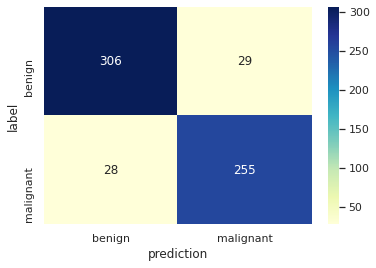

In [22]:
fig = plot_confusion_matrix_ensemble(train_fix_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-train-confusion-matrix.svg", bbox_inches = "tight")

In [23]:
pandas.DataFrame(calculate_confusion_matrix_stats(train_fix_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.907767,306,255,28,29,0.913433,0.901060,0.916168,0.897887,0.098940,0.086567,0.083832,0.907246,0.907225
1,0.907767,255,306,29,28,0.901060,0.913433,0.897887,0.916168,0.086567,0.098940,0.102113,0.907246,0.907225


## ROC Curve

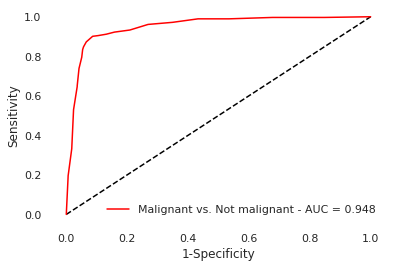

In [24]:
fig = plot_roc_curve(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

In [ ]:
fig = plot_precision_recall(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-precisionrecall.svg", bbox_inches = "tight")

# Validation

In [37]:
model = best_model
predictions = model.predict(validation_set)
probabilities = model.predict_proba(validation_set)
sb.glue("validation_labels", list(validation_labels))
sb.glue("validation_probabilities", list(probabilities[:,1]))
sb.glue("validation_predictions", list(predictions))

In [38]:
print("accuracy: {}".format(metrics.accuracy_score(validation_labels, predictions)))

accuracy: 0.7193877551020408


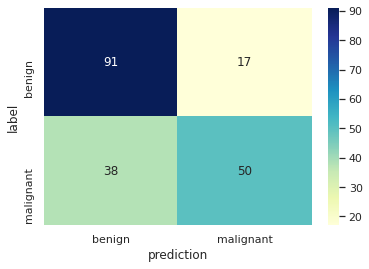

In [39]:
fig = plot_confusion_matrix_ensemble(validation_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-validation-confusion-matrix.svg", bbox_inches = "tight")

In [40]:
pandas.DataFrame(calculate_confusion_matrix_stats(validation_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.719388,91,50,38,17,0.842593,0.568182,0.705426,0.746269,0.431818,0.157407,0.294574,0.705387,0.691915
1,0.719388,50,91,17,38,0.568182,0.842593,0.746269,0.705426,0.157407,0.431818,0.253731,0.705387,0.691915


## ROC Curve

In [ ]:
fig = plot_roc_curve(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

In [ ]:
fig = plot_precision_recall(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-precisionrecall.svg", bbox_inches = "tight")

# Test

In [32]:
model = best_model
predictions = model.predict(test_set)
probabilities = model.predict_proba(test_set)
sb.glue("test_labels", list(test_labels))
sb.glue("test_probabilities", list(probabilities[:,1]))
sb.glue("test_predictions", list(predictions))

In [33]:
print("accuracy: {}".format(metrics.accuracy_score(test_labels, predictions)))

accuracy: 0.6989247311827957


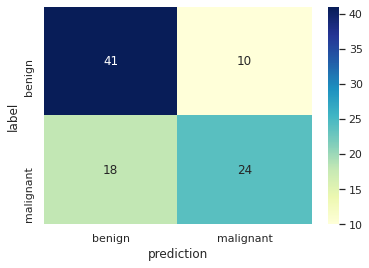

In [34]:
fig = plot_confusion_matrix_ensemble(test_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-test-confusion-matrix.svg", bbox_inches = "tight")

In [35]:
len(test_labels)

93

In [36]:
pandas.DataFrame(calculate_confusion_matrix_stats(test_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.698925,41,24,18,10,0.803922,0.571429,0.694915,0.705882,0.428571,0.196078,0.305085,0.687675,0.677779
1,0.698925,24,41,10,18,0.571429,0.803922,0.705882,0.694915,0.196078,0.428571,0.294118,0.687675,0.677779


## ROC Curve

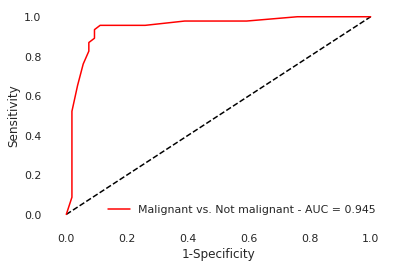

In [30]:
fig = plot_roc_curve(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

In [ ]:
fig = plot_precision_recall(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-precisionrecall.svg", bbox_inches = "tight")

# External

In [ ]:
model = best_model
predictions = model.predict(external_set)
probabilities = model.predict_proba(external_set)
sb.glue("external_labels", list(external_labels))
sb.glue("external_probabilities", list(probabilities[:,1]))
sb.glue("external_predictions", list(predictions))
print("accuracy: {}".format(metrics.accuracy_score(external_labels, predictions)))

In [ ]:
fig = plot_confusion_matrix_ensemble(external_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-test-confusion-matrix.svg", bbox_inches = "tight")

In [ ]:
pandas.DataFrame(calculate_confusion_matrix_stats(external_labels, probabilities[:,1]))

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.